<a href="https://colab.research.google.com/github/ritweekraj2802/Deepstego/blob/main/Deep_steg_finale_changes3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr 12 12:45:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DeepSteganography-master
%ls

/content/drive/MyDrive/DeepSteganography-master
Deep_steg_finale_changes3.ipynb  Images/


In [4]:
# Dataset zip file
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2023-04-12 12:47:32--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  65.4MB/s    in 4.1s    

2023-04-12 12:47:36 (58.0 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [6]:
# Unzipping the contents present in our database
!unzip /content/drive/MyDrive/DeepSteganography-master/tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

In [7]:
!pip install tensorflow==2.12.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [9]:
### Imports ###
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
#from keras.engine.topology import Container
#from keras.engine.network import Network
from keras.layers import *
from keras import backend
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K

import matplotlib.pyplot as plt

import numpy as np
import os
import random
import scipy.misc
from tqdm import *

%matplotlib inline

In [12]:
import keras.utils as image

In [13]:
### Constants ###
DATA_DIR = "/content/drive/MyDrive/DeepSteganography-master/tiny-imagenet-200"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")

IMG_SHAPE = (64, 64)

def load_dataset_small(num_images_per_class_train=10, num_images_test=500):
    """Loads training and test datasets, from Tiny ImageNet Visual Recogition Challenge.

    Arguments:
        num_images_per_class_train: number of images per class to load into training dataset.
        num_images_test: total number of images to load into training dataset.
    """

    X_train = []
    X_test = []
    
    # Create training set.
    for c in os.listdir("/content/drive/MyDrive/DeepSteganography-master/tiny-imagenet-200/train"):
        c_dir = os.path.join("/content/drive/MyDrive/DeepSteganography-master/tiny-imagenet-200/train", c, 'images')
        c_imgs = os.listdir(c_dir)
        random.shuffle(c_imgs)
        for img_name_i in c_imgs[0:num_images_per_class_train]:
            img_i = image.load_img(os.path.join(c_dir, img_name_i))
            x = image.img_to_array(img_i)
            X_train.append(x)
    random.shuffle(X_train)
    
    
    # Create test set.
    test_dir = os.path.join(TEST_DIR, 'images')
    test_imgs = os.listdir(test_dir)
    random.shuffle(test_imgs)
    for img_name_i in test_imgs[0:num_images_test]:
        print("2")
        img_i = image.load_img(os.path.join(test_dir, img_name_i))
        x = image.img_to_array(img_i)
        X_test.append(x)
    
    # Return train and test data as numpy arrays.
    #return np.array(X_train), np.array(X_test)
    return np.array(X_train)

In [14]:
# Load dataset.
#X_train_orig, X_test_orig = load_dataset_small()
X_train_orig = load_dataset_small()

# Normalize image vectors.
X_train = X_train_orig/255.
#X_test = X_test_orig/255.

# Print statistics.
print ("Number of training examples = " + str(X_train.shape[0]))
print ("Number of test examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape)) # Should be (train_size, 64, 64, 3).

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [15]:
# We split training set into two halfs.
# First half is used for training as secret images, second half for cover images.

# S1: secret image1
input_S1 = X_train[0:X_train.shape[0] // 4]
# S2: secret image2
input_S2 = X_train[X_train.shape[0] // 4 : 2*(X_train.shape[0] // 4)]
# S3: secret image3
input_S3 = X_train[2*(X_train.shape[0] // 4) : 3*(X_train.shape[0] // 4)]




# C: cover image
input_C = X_train[3*(X_train.shape[0] // 4):]

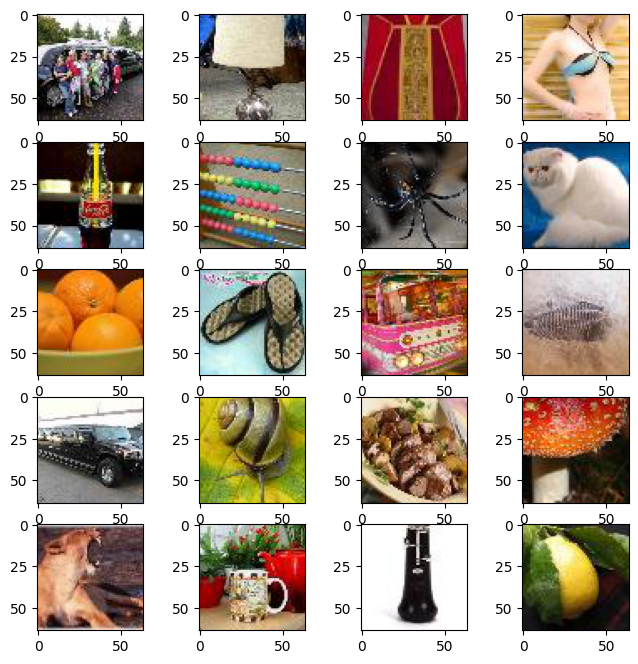

In [16]:
# Show sample images from the training dataset
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    # Randomly sample from training dataset
    img_idx = np.random.choice(X_train.shape[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[img_idx])
plt.show()

**Model**

The model is composed of three parts: The Preparation Network, Hiding Network (Encoder) and the Reveal Network. Its goal is to be able to encode information about the secret image S into the cover image C, generating C' that closely resembles C, while still being able to decode information from C' to generate the decoded secret image S', which should resemble S as closely as possible.

The Preparation Network has the responsibility of preparing data from the secret image to be concatenated with the cover image and fed to the Hiding Network. The Hiding Network than transforms that input into the encoded cover image C'. Finally, the Reveal Network decodes the secret image S' from C'. For stability, we add noise before the Reveal Network, as suggested by the paper. Although the author of the paper didn't originally specify the architecture of the three networks, we discovered aggregated layers showed good results. For both the Hiding and Reveal networks, we use 5 layers of 65 filters (50 3x3 filters, 10 4x4 filters and 5 5x5 filters). For the preparation network, we use only 2 layers with the same structure.

Note that the loss function for the Reveal Network is different from the loss function for the Preparation and Hiding Networks. In order to correctly implement the updates for the weights in the networks, we create stacked Keras models, one for the Preparation and Hiding Network (which share the same loss function) and one for the Reveal Network. To make sure weights are updated only once, we freeze the weights on the layers of the Reveal Network before adding it to the full model.

In [17]:
# Variable used to weight the losses of the secret and cover images (See paper for more details)
beta = 1.0
    
# Loss for reveal network
def rev_loss(s_true, s_pred):
    # Loss for reveal network is: beta * |S-S'|
    #return s_true-s_pred

    print(s_true.shape, s_pred.shape)
    return beta * K.sum(K.square(s_true - s_pred))

# Loss for the full model, used for preparation and hidding networks
def full_loss(y_true, y_pred):
    # Loss for the full model is: |C-C'| + beta * |S-S'|
    print(y_true.shape, y_pred.shape)
    s1_true, s2_true, s3_true, c_true = y_true[...,0:3], y_true[...,3:6], y_true[...,6:9], y_true[...,9:12]
    s1_pred, s2_pred, s3_pred, c_pred = y_pred[...,0:3], y_pred[...,3:6], y_pred[...,6:9], y_pred[...,9:12]

    #s_loss = rev_loss(s_true, s_pred)
    s1_loss = beta * K.sum(K.square(s1_true - s1_pred))
    s2_loss = beta * K.sum(K.square(s2_true - s2_pred))
    s3_loss = beta * K.sum(K.square(s3_true - s3_pred))
    c_loss = K.sum(K.square(c_true - c_pred))
    
    return s1_loss + c_loss + s2_loss + s3_loss


# Returns the encoder as a Keras model, composed by Preparation and Hiding Networks.
def make_encoder(input_size):
    input_S1 = Input(shape=(input_size))
    input_S2 = Input(shape=(input_size))
    input_S3 = Input(shape=(input_size))
    input_C= Input(shape=(input_size))

    # Preparation Network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3_1')(input_S1)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4_1')(input_S1)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5_1')(input_S1)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5_1')(x)
    x1 = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3_2')(input_S2)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4_2')(input_S2)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5_2')(input_S2)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5_2')(x)
    x2 = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3_3')(input_S3)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4_3')(input_S3)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5_3')(input_S3)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3_3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4_3')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5_3')(x)
    x3_1 = concatenate([x3, x4, x5])
    
    x = concatenate([input_C, x1, x2, x3_1])
    
    # Hiding network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid5_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    output_Cprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_C')(x)
    
    return Model(inputs=[input_S1, input_S2, input_S3, input_C],
                 outputs=output_Cprime,
                 name = 'Encoder')

# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder1(input_size, fixed=False):
    
    # Reveal network
    reveal_input = Input(shape=(input_size))
    
    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise1')(reveal_input)
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3_1')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4_1')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5_1')(input_with_noise)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3_1')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4_1')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5_1')(x)
    x = concatenate([x3, x4, x5])
    
    output_S1prime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S1')(x)
    
    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_S1prime)
    else:
        """return Container(inputs=reveal_input,
                         outputs=output_Sprime,
                         name = 'DecoderFixed')"""
        return Network(inputs=reveal_input,
                         outputs=output_S1prime)
        
# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder2(input_size, fixed=False):
    
    # Reveal network
    reveal_input = Input(shape=(input_size))
    
    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise2')(reveal_input)
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3_2')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4_2')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5_2')(input_with_noise)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3_2')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4_2')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5_2')(x)
    x = concatenate([x3, x4, x5])
    
    output_S2prime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S2')(x)
    
    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_S2prime)
    else:
        """return Container(inputs=reveal_input,
                         outputs=output_S2prime,
                         name = 'DecoderFixed')"""
        return Network(inputs=reveal_input,
                         outputs=output_S2prime)

# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder3(input_size, fixed=False):
    
    # Reveal network
    reveal_input = Input(shape=(input_size))
    
    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise2')(reveal_input)
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5')(input_with_noise)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5')(x)
    x = concatenate([x3, x4, x5])
    
    output_S3prime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S3')(x)
    
    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_S3prime)
    else:
        """return Container(inputs=reveal_input,
                         outputs=output_S2prime,
                         name = 'DecoderFixed')"""
        return Network(inputs=reveal_input,
                         outputs=output_S3prime)

# Full model.
def make_model(input_size):
    input_S1 = Input(shape=(input_size))
    input_S2 = Input(shape=(input_size))
    input_S3 = Input(shape=(input_size))
    input_C= Input(shape=(input_size))
    
    encoder = make_encoder(input_size)
    
    decoder1 = make_decoder1(input_size)
    decoder1.compile(optimizer='adam', loss=rev_loss)
    decoder1.trainable = False

    decoder2 = make_decoder2(input_size)
    decoder2.compile(optimizer='adam', loss=rev_loss)
    decoder2.trainable = False

    decoder3 = make_decoder3(input_size)
    decoder3.compile(optimizer='adam', loss=rev_loss)
    decoder3.trainable = False
    
    output_Cprime = encoder([input_S1, input_S2, input_S3, input_C])
    output_S1prime = decoder1(output_Cprime)
    output_S2prime = decoder2(output_Cprime)
    output_S3prime = decoder3(output_Cprime)

    autoencoder1 = Model(inputs=[input_S1, input_S2, input_S3, input_C],
                        outputs=concatenate([output_S1prime, output_S2prime, output_S3prime, output_Cprime]))
    autoencoder1.compile(optimizer='adam', loss=full_loss)
    
    # autoencoder2 = Model(inputs=[input_S1, input_S2, input_C],
    #                     outputs=concatenate([output_S2prime, output_Cprime]))
    # autoencoder2.compile(optimizer='adam', loss=full_loss)


    return encoder, decoder1, decoder2, decoder3, autoencoder1

In [18]:
encoder_model, reveal_model1, reveal_model2, reveal_model3, autoencoder_model = make_model(input_S1.shape[1:])

# **Training**


Although the author of the paper didn't explicitly described the learning rate schedule or the optimizer properties, we used our own schedule with ADAM optimizer. We train for 1000 epochs with a batch size of 32.

In [19]:
def lr_schedule(epoch_idx):
    if epoch_idx < 200:
        return 0.001
    elif epoch_idx < 400:
        return 0.0003
    elif epoch_idx < 600:
        return 0.0001
    else:
        return 0.00003

In [20]:
NB_EPOCHS = 2
BATCH_SIZE = 256

m = input_S1.shape[0]
loss_history = []
#loss_history2 = []
for epoch in range(NB_EPOCHS):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    #ae_loss2 = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        #ae_loss2.append(autoencoder_model2.train_on_batch(x=[batch_S1, batch_S2, batch_C],
        #                                           y=np.concatenate((batch_S2, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        #K.set_value(autoencoder_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch))
    #autoencoder_model2.save_weights('models/model'+str(epoch))
    
    loss_history.append(np.mean(ae_loss))
    #loss_history2.append(np.mean(ae_loss2))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 10s 52ms/step
(256, 64, 64, 12) (256, 64, 64, 12)
(256, 64, 64, 12) (256, 64, 64, 12)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)
(256, 64, 64, 3) (256, 64, 64, 3)


Epoch 1 | Batch:   0 of 500. Loss AE 3467295.75 | Loss Rev1  874135.38 | Loss Rev2  848671.69 | Loss Rev3  888096.06:  50%|█████     | 1/2 [01:06<01:06, 66.60s/it]

8/8 [==============================] - 2s 218ms/step
(None, 64, 64, 12) (None, 64, 64, 12)


(None, 64, 64, 3) (None, 64, 64, 3)


(None, 64, 64, 3) (None, 64, 64, 3)
(None, 64, 64, 3) (None, 64, 64, 3)


Epoch 1 | Batch: 256 of 500. Loss AE 2906350.75 | Loss Rev1  672481.00 | Loss Rev2  746384.66 | Loss Rev3  805535.53: 100%|██████████| 2/2 [01:38<00:00, 49.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 2 | Batch:   0 of 500. Loss AE 3027855.75 | Loss Rev1  825253.12 | Loss Rev2  674881.50 | Loss Rev3  861097.75:  50%|█████     | 1/2 [00:06<00:06,  6.81s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 2 | Batch: 256 of 500. Loss AE 3154015.62 | Loss Rev1  729545.19 | Loss Rev2 1035356.56 | Loss Rev3  812565.59: 100%|██████████| 2/2 [00:12<00:00,  6.34s/it]


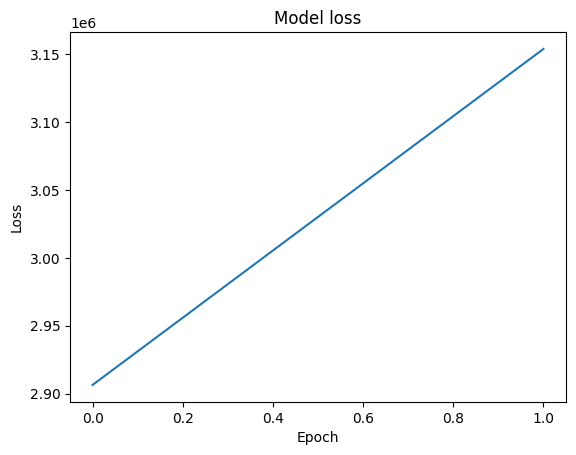

In [21]:
1# Plot loss through epochs
plt.plot(loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [22]:
for epoch in range(5):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch+6))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 66ms/step


Epoch 1 | Batch:   0 of 500. Loss AE 2829407.25 | Loss Rev1  676222.31 | Loss Rev2  641767.81 | Loss Rev3  803508.50:  50%|█████     | 1/2 [00:06<00:06,  6.01s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 1 | Batch: 256 of 500. Loss AE 2622824.38 | Loss Rev1  575090.72 | Loss Rev2  619407.34 | Loss Rev3  751697.16: 100%|██████████| 2/2 [00:11<00:00,  5.93s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 55ms/step


Epoch 2 | Batch:   0 of 500. Loss AE 3111483.25 | Loss Rev1 1555398.62 | Loss Rev2  534376.69 | Loss Rev3  469585.88:  50%|█████     | 1/2 [00:07<00:07,  7.09s/it]

8/8 [==============================] - 0s 55ms/step


Epoch 2 | Batch: 256 of 500. Loss AE 2532451.12 | Loss Rev1  953387.62 | Loss Rev2  558456.62 | Loss Rev3  440802.03: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 3 | Batch:   0 of 500. Loss AE 1914570.00 | Loss Rev1  438143.28 | Loss Rev2  534587.38 | Loss Rev3  296502.38:  50%|█████     | 1/2 [00:08<00:08,  8.48s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 3 | Batch: 256 of 500. Loss AE 2006470.62 | Loss Rev1  433420.09 | Loss Rev2  466752.89 | Loss Rev3  464627.25: 100%|██████████| 2/2 [00:14<00:00,  7.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 4 | Batch:   0 of 500. Loss AE 1857856.50 | Loss Rev1  482921.03 | Loss Rev2  372156.19 | Loss Rev3  250449.11:  50%|█████     | 1/2 [00:06<00:06,  6.76s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 4 | Batch: 256 of 500. Loss AE 1781100.50 | Loss Rev1  483467.36 | Loss Rev2  360307.47 | Loss Rev3  245861.02: 100%|██████████| 2/2 [00:12<00:00,  6.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 5 | Batch:   0 of 500. Loss AE 1818748.75 | Loss Rev1  412927.09 | Loss Rev2  368778.66 | Loss Rev3  292102.97:  50%|█████     | 1/2 [00:06<00:06,  6.42s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 5 | Batch: 256 of 500. Loss AE 1638890.00 | Loss Rev1  342434.48 | Loss Rev2  342776.61 | Loss Rev3  262805.65: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]


In [23]:
for epoch in range(50):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch+6))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 1s 68ms/step


Epoch 1 | Batch:   0 of 500. Loss AE 1540186.25 | Loss Rev1  344247.56 | Loss Rev2  292226.91 | Loss Rev3  236295.77:  50%|█████     | 1/2 [00:05<00:05,  5.89s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 1 | Batch: 256 of 500. Loss AE 1444547.75 | Loss Rev1  302619.69 | Loss Rev2  277261.23 | Loss Rev3  232286.93: 100%|██████████| 2/2 [00:12<00:00,  6.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 2 | Batch:   0 of 500. Loss AE 1425318.00 | Loss Rev1  258376.31 | Loss Rev2  305477.66 | Loss Rev3  234227.27:  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 2 | Batch: 256 of 500. Loss AE 1347856.38 | Loss Rev1  243648.68 | Loss Rev2  280372.84 | Loss Rev3  243748.52: 100%|██████████| 2/2 [00:15<00:00,  7.71s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 3 | Batch:   0 of 500. Loss AE 1287269.25 | Loss Rev1  248017.48 | Loss Rev2  250522.52 | Loss Rev3  285731.28:  50%|█████     | 1/2 [00:07<00:07,  7.09s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 3 | Batch: 256 of 500. Loss AE 1206679.88 | Loss Rev1  232798.03 | Loss Rev2  248165.20 | Loss Rev3  245101.02: 100%|██████████| 2/2 [00:12<00:00,  6.49s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 4 | Batch:   0 of 500. Loss AE 1168992.62 | Loss Rev1  222814.11 | Loss Rev2  265515.12 | Loss Rev3  220780.55:  50%|█████     | 1/2 [00:07<00:07,  7.20s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 4 | Batch: 256 of 500. Loss AE 1110096.44 | Loss Rev1  211544.84 | Loss Rev2  257732.73 | Loss Rev3  206088.31: 100%|██████████| 2/2 [00:12<00:00,  6.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 5 | Batch:   0 of 500. Loss AE 1069100.50 | Loss Rev1  261741.62 | Loss Rev2  252922.89 | Loss Rev3  203183.91:  50%|█████     | 1/2 [00:08<00:08,  8.20s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 5 | Batch: 256 of 500. Loss AE 1019528.25 | Loss Rev1  228644.88 | Loss Rev2  241285.85 | Loss Rev3  197124.88: 100%|██████████| 2/2 [00:13<00:00,  6.95s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 6 | Batch:   0 of 500. Loss AE 1016372.94 | Loss Rev1  209495.16 | Loss Rev2  256864.06 | Loss Rev3  199758.00:  50%|█████     | 1/2 [00:08<00:08,  8.40s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 6 | Batch: 256 of 500. Loss AE  959056.97 | Loss Rev1  201335.35 | Loss Rev2  237704.32 | Loss Rev3  197291.28: 100%|██████████| 2/2 [00:14<00:00,  7.05s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 7 | Batch:   0 of 500. Loss AE  956803.62 | Loss Rev1  204325.16 | Loss Rev2  242628.02 | Loss Rev3  202157.45:  50%|█████     | 1/2 [00:06<00:06,  6.44s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 7 | Batch: 256 of 500. Loss AE  916370.88 | Loss Rev1  191840.01 | Loss Rev2  234569.73 | Loss Rev3  200633.25: 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 8 | Batch:   0 of 500. Loss AE  926259.56 | Loss Rev1  202068.30 | Loss Rev2  232360.78 | Loss Rev3  222043.75:  50%|█████     | 1/2 [00:08<00:08,  8.29s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 8 | Batch: 256 of 500. Loss AE  880677.94 | Loss Rev1  187606.58 | Loss Rev2  224431.41 | Loss Rev3  208583.38: 100%|██████████| 2/2 [00:17<00:00,  8.60s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 9 | Batch:   0 of 500. Loss AE  862453.56 | Loss Rev1  183503.19 | Loss Rev2  217657.17 | Loss Rev3  204348.45:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 9 | Batch: 256 of 500. Loss AE  854074.59 | Loss Rev1  184988.17 | Loss Rev2  225370.16 | Loss Rev3  198697.09: 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 10 | Batch:   0 of 500. Loss AE  851668.88 | Loss Rev1  183773.61 | Loss Rev2  220210.88 | Loss Rev3  202755.83:  50%|█████     | 1/2 [00:06<00:06,  6.13s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 10 | Batch: 256 of 500. Loss AE  831752.25 | Loss Rev1  178766.95 | Loss Rev2  217519.30 | Loss Rev3  195074.46: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 11 | Batch:   0 of 500. Loss AE  832648.38 | Loss Rev1  170955.98 | Loss Rev2  231197.69 | Loss Rev3  203679.80:  50%|█████     | 1/2 [00:06<00:06,  6.75s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 11 | Batch: 256 of 500. Loss AE  806078.12 | Loss Rev1  172553.38 | Loss Rev2  223600.25 | Loss Rev3  193024.51: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 12 | Batch:   0 of 500. Loss AE  816787.00 | Loss Rev1  185245.11 | Loss Rev2  229569.66 | Loss Rev3  189458.14:  50%|█████     | 1/2 [00:06<00:06,  6.46s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 12 | Batch: 256 of 500. Loss AE  771256.12 | Loss Rev1  161587.81 | Loss Rev2  221130.69 | Loss Rev3  186322.77: 100%|██████████| 2/2 [00:12<00:00,  6.17s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 13 | Batch:   0 of 500. Loss AE  788044.19 | Loss Rev1  167122.22 | Loss Rev2  222425.78 | Loss Rev3  188754.05:  50%|█████     | 1/2 [00:06<00:06,  6.54s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 13 | Batch: 256 of 500. Loss AE  806721.56 | Loss Rev1  204682.59 | Loss Rev2  214038.44 | Loss Rev3  181490.22: 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 56ms/step


Epoch 14 | Batch:   0 of 500. Loss AE  804782.69 | Loss Rev1  174497.16 | Loss Rev2  221910.36 | Loss Rev3  200325.41:  50%|█████     | 1/2 [00:07<00:07,  7.30s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 14 | Batch: 256 of 500. Loss AE  901114.22 | Loss Rev1  287263.06 | Loss Rev2  212626.64 | Loss Rev3  192798.81: 100%|██████████| 2/2 [00:13<00:00,  6.65s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 15 | Batch:   0 of 500. Loss AE  977437.00 | Loss Rev1  287917.09 | Loss Rev2  227207.50 | Loss Rev3  243609.59:  50%|█████     | 1/2 [00:07<00:07,  7.28s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 15 | Batch: 256 of 500. Loss AE  992319.34 | Loss Rev1  345856.34 | Loss Rev2  219911.46 | Loss Rev3  210224.51: 100%|██████████| 2/2 [00:13<00:00,  6.61s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 16 | Batch:   0 of 500. Loss AE 1076789.00 | Loss Rev1  409039.38 | Loss Rev2  218739.12 | Loss Rev3  216878.05:  50%|█████     | 1/2 [00:08<00:08,  8.50s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 16 | Batch: 256 of 500. Loss AE 1018654.03 | Loss Rev1  380071.89 | Loss Rev2  214734.13 | Loss Rev3  205929.22: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 17 | Batch:   0 of 500. Loss AE  858216.25 | Loss Rev1  228601.42 | Loss Rev2  253197.20 | Loss Rev3  180090.69:  50%|█████     | 1/2 [00:08<00:08,  8.33s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 17 | Batch: 256 of 500. Loss AE  814182.91 | Loss Rev1  211963.85 | Loss Rev2  230147.20 | Loss Rev3  181432.52: 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 18 | Batch:   0 of 500. Loss AE  936569.50 | Loss Rev1  322262.75 | Loss Rev2  230185.41 | Loss Rev3  183292.58:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 18 | Batch: 256 of 500. Loss AE  874097.00 | Loss Rev1  251417.34 | Loss Rev2  245493.64 | Loss Rev3  183490.24: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 19 | Batch:   0 of 500. Loss AE  855830.75 | Loss Rev1  187176.11 | Loss Rev2  277439.75 | Loss Rev3  195183.94:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 19 | Batch: 256 of 500. Loss AE  805405.91 | Loss Rev1  182346.79 | Loss Rev2  248495.30 | Loss Rev3  185936.57: 100%|██████████| 2/2 [00:14<00:00,  7.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 20 | Batch:   0 of 500. Loss AE  812748.50 | Loss Rev1  185064.31 | Loss Rev2  227136.64 | Loss Rev3  206372.38:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 20 | Batch: 256 of 500. Loss AE  786498.19 | Loss Rev1  163841.09 | Loss Rev2  238890.25 | Loss Rev3  193594.82: 100%|██████████| 2/2 [00:11<00:00,  5.96s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 21 | Batch:   0 of 500. Loss AE  784272.00 | Loss Rev1  129779.97 | Loss Rev2  249069.11 | Loss Rev3  205432.98:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 56ms/step


Epoch 21 | Batch: 256 of 500. Loss AE  753735.88 | Loss Rev1  124985.86 | Loss Rev2  229050.29 | Loss Rev3  201132.15: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 22 | Batch:   0 of 500. Loss AE  752357.75 | Loss Rev1  111962.30 | Loss Rev2  243781.25 | Loss Rev3  191818.16:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 22 | Batch: 256 of 500. Loss AE  727251.12 | Loss Rev1  113126.14 | Loss Rev2  232814.38 | Loss Rev3  181331.50: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 23 | Batch:   0 of 500. Loss AE  763369.06 | Loss Rev1  113786.42 | Loss Rev2  222658.00 | Loss Rev3  219533.66:  50%|█████     | 1/2 [00:06<00:06,  6.40s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 23 | Batch: 256 of 500. Loss AE  729563.97 | Loss Rev1  117716.33 | Loss Rev2  216091.08 | Loss Rev3  193762.37: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 24 | Batch:   0 of 500. Loss AE  713001.06 | Loss Rev1  112576.31 | Loss Rev2  219144.28 | Loss Rev3  180997.14:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 24 | Batch: 256 of 500. Loss AE  701024.12 | Loss Rev1  111783.64 | Loss Rev2  211389.09 | Loss Rev3  184661.37: 100%|██████████| 2/2 [00:12<00:00,  6.42s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 57ms/step


Epoch 25 | Batch:   0 of 500. Loss AE  732075.50 | Loss Rev1  117956.37 | Loss Rev2  222242.59 | Loss Rev3  195094.22:  50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

8/8 [==============================] - 0s 57ms/step


Epoch 25 | Batch: 256 of 500. Loss AE  695470.69 | Loss Rev1  112858.15 | Loss Rev2  214960.16 | Loss Rev3  176485.41: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 26 | Batch:   0 of 500. Loss AE  700575.25 | Loss Rev1  112626.37 | Loss Rev2  225356.41 | Loss Rev3  170031.00:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 26 | Batch: 256 of 500. Loss AE  686251.78 | Loss Rev1  111299.05 | Loss Rev2  212809.05 | Loss Rev3  172184.84: 100%|██████████| 2/2 [00:12<00:00,  6.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 27 | Batch:   0 of 500. Loss AE  689050.88 | Loss Rev1  108998.27 | Loss Rev2  217334.98 | Loss Rev3  172347.70:  50%|█████     | 1/2 [00:06<00:06,  6.63s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 27 | Batch: 256 of 500. Loss AE  671953.19 | Loss Rev1  105204.91 | Loss Rev2  216215.10 | Loss Rev3  165332.77: 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 28 | Batch:   0 of 500. Loss AE  664038.88 | Loss Rev1   99913.41 | Loss Rev2  211417.19 | Loss Rev3  163912.06:  50%|█████     | 1/2 [00:08<00:08,  8.47s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 28 | Batch: 256 of 500. Loss AE  656411.50 | Loss Rev1  100843.02 | Loss Rev2  211779.52 | Loss Rev3  161416.32: 100%|██████████| 2/2 [00:14<00:00,  7.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 29 | Batch:   0 of 500. Loss AE  674129.75 | Loss Rev1  102627.92 | Loss Rev2  219694.23 | Loss Rev3  167830.56:  50%|█████     | 1/2 [00:06<00:06,  6.53s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 29 | Batch: 256 of 500. Loss AE  643225.09 | Loss Rev1  100068.57 | Loss Rev2  207729.83 | Loss Rev3  161824.60: 100%|██████████| 2/2 [00:12<00:00,  6.26s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 30 | Batch:   0 of 500. Loss AE  652503.69 | Loss Rev1  103424.78 | Loss Rev2  203020.56 | Loss Rev3  165939.44:  50%|█████     | 1/2 [00:06<00:06,  6.50s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 30 | Batch: 256 of 500. Loss AE  646873.25 | Loss Rev1  100258.54 | Loss Rev2  204548.73 | Loss Rev3  164962.99: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 31 | Batch:   0 of 500. Loss AE  669649.06 | Loss Rev1  109193.20 | Loss Rev2  204323.55 | Loss Rev3  171033.03:  50%|█████     | 1/2 [00:06<00:06,  6.38s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 31 | Batch: 256 of 500. Loss AE  646150.12 | Loss Rev1  107145.26 | Loss Rev2  198782.82 | Loss Rev3  166048.30: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 32 | Batch:   0 of 500. Loss AE  638414.81 | Loss Rev1  100094.75 | Loss Rev2  201336.36 | Loss Rev3  162890.52:  50%|█████     | 1/2 [00:06<00:06,  6.32s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 32 | Batch: 256 of 500. Loss AE  632009.94 | Loss Rev1  101584.40 | Loss Rev2  194144.99 | Loss Rev3  167566.34: 100%|██████████| 2/2 [00:13<00:00,  6.62s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 33 | Batch:   0 of 500. Loss AE  636347.88 | Loss Rev1  110561.92 | Loss Rev2  193480.47 | Loss Rev3  163890.70:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 33 | Batch: 256 of 500. Loss AE  602614.19 | Loss Rev1  102362.43 | Loss Rev2  178621.39 | Loss Rev3  158383.23: 100%|██████████| 2/2 [00:13<00:00,  6.56s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 34 | Batch:   0 of 500. Loss AE  636302.12 | Loss Rev1  132941.38 | Loss Rev2  170696.70 | Loss Rev3  165398.97:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 34 | Batch: 256 of 500. Loss AE  608961.38 | Loss Rev1  127522.20 | Loss Rev2  158859.55 | Loss Rev3  160858.85: 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 35 | Batch:   0 of 500. Loss AE  582541.12 | Loss Rev1  109756.19 | Loss Rev2  150159.83 | Loss Rev3  162850.34:  50%|█████     | 1/2 [00:06<00:06,  6.62s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 35 | Batch: 256 of 500. Loss AE  589073.84 | Loss Rev1  112900.24 | Loss Rev2  146390.69 | Loss Rev3  174173.98: 100%|██████████| 2/2 [00:12<00:00,  6.32s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 36 | Batch:   0 of 500. Loss AE  546008.38 | Loss Rev1  109251.59 | Loss Rev2  129715.18 | Loss Rev3  159512.45:  50%|█████     | 1/2 [00:07<00:07,  7.31s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 36 | Batch: 256 of 500. Loss AE  550046.81 | Loss Rev1  108721.68 | Loss Rev2  129488.15 | Loss Rev3  169105.06: 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 37 | Batch:   0 of 500. Loss AE  566878.38 | Loss Rev1  113115.94 | Loss Rev2  145144.33 | Loss Rev3  167559.94:  50%|█████     | 1/2 [00:08<00:08,  8.44s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 37 | Batch: 256 of 500. Loss AE  544690.81 | Loss Rev1  107678.07 | Loss Rev2  133677.61 | Loss Rev3  170895.80: 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 38 | Batch:   0 of 500. Loss AE  550843.56 | Loss Rev1  127928.17 | Loss Rev2  132767.95 | Loss Rev3  160376.33:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 38 | Batch: 256 of 500. Loss AE  532380.78 | Loss Rev1  120522.96 | Loss Rev2  131127.89 | Loss Rev3  151974.47: 100%|██████████| 2/2 [00:12<00:00,  6.32s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 39 | Batch:   0 of 500. Loss AE  636868.25 | Loss Rev1  218571.89 | Loss Rev2  121274.45 | Loss Rev3  163745.66:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 39 | Batch: 256 of 500. Loss AE  638519.81 | Loss Rev1  229603.96 | Loss Rev2  117137.26 | Loss Rev3  162080.60: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 40 | Batch:   0 of 500. Loss AE  693473.88 | Loss Rev1  283840.16 | Loss Rev2  114899.44 | Loss Rev3  155940.36:  50%|█████     | 1/2 [00:06<00:06,  6.42s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 40 | Batch: 256 of 500. Loss AE  627956.62 | Loss Rev1  216076.54 | Loss Rev2  109069.25 | Loss Rev3  172500.90: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 41 | Batch:   0 of 500. Loss AE  599202.50 | Loss Rev1  184526.59 | Loss Rev2  104483.66 | Loss Rev3  180534.02:  50%|█████     | 1/2 [00:06<00:06,  6.41s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 41 | Batch: 256 of 500. Loss AE  571886.12 | Loss Rev1  168985.07 | Loss Rev2  101585.54 | Loss Rev3  172220.78: 100%|██████████| 2/2 [00:12<00:00,  6.25s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 42 | Batch:   0 of 500. Loss AE  577697.50 | Loss Rev1  145511.70 | Loss Rev2  102725.71 | Loss Rev3  199860.28:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 42 | Batch: 256 of 500. Loss AE  555800.41 | Loss Rev1  148583.47 | Loss Rev2   99763.42 | Loss Rev3  178208.00: 100%|██████████| 2/2 [00:12<00:00,  6.12s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 43 | Batch:   0 of 500. Loss AE  579245.12 | Loss Rev1  127784.03 | Loss Rev2  105045.17 | Loss Rev3  201163.03:  50%|█████     | 1/2 [00:06<00:06,  6.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 43 | Batch: 256 of 500. Loss AE  558430.31 | Loss Rev1  116723.18 | Loss Rev2  122909.89 | Loss Rev3  180858.91: 100%|██████████| 2/2 [00:13<00:00,  6.54s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 44 | Batch:   0 of 500. Loss AE  661276.62 | Loss Rev1  124316.80 | Loss Rev2  195037.92 | Loss Rev3  198075.94:  50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 44 | Batch: 256 of 500. Loss AE  709670.31 | Loss Rev1  118937.24 | Loss Rev2  271699.27 | Loss Rev3  170141.33: 100%|██████████| 2/2 [00:12<00:00,  6.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 45 | Batch:   0 of 500. Loss AE  789789.19 | Loss Rev1  117490.18 | Loss Rev2  367307.00 | Loss Rev3  164093.33:  50%|█████     | 1/2 [00:06<00:06,  6.80s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 45 | Batch: 256 of 500. Loss AE  668291.09 | Loss Rev1  115528.80 | Loss Rev2  255540.98 | Loss Rev3  164396.33: 100%|██████████| 2/2 [00:15<00:00,  7.62s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 46 | Batch:   0 of 500. Loss AE  765098.75 | Loss Rev1  113432.82 | Loss Rev2  328311.50 | Loss Rev3  176766.81:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 46 | Batch: 256 of 500. Loss AE  676874.28 | Loss Rev1  113956.95 | Loss Rev2  243449.83 | Loss Rev3  174457.53: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 47 | Batch:   0 of 500. Loss AE  641890.56 | Loss Rev1  115686.54 | Loss Rev2  206734.75 | Loss Rev3  174181.06:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 47 | Batch: 256 of 500. Loss AE  624108.53 | Loss Rev1  112016.77 | Loss Rev2  202323.27 | Loss Rev3  169421.77: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 48 | Batch:   0 of 500. Loss AE  600224.25 | Loss Rev1  120144.80 | Loss Rev2  177849.06 | Loss Rev3  170844.58:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 48 | Batch: 256 of 500. Loss AE  566528.06 | Loss Rev1  117328.79 | Loss Rev2  149761.04 | Loss Rev3  167603.03: 100%|██████████| 2/2 [00:12<00:00,  6.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 49 | Batch:   0 of 500. Loss AE  554944.38 | Loss Rev1  114104.95 | Loss Rev2  135570.08 | Loss Rev3  159060.12:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 49 | Batch: 256 of 500. Loss AE  534893.78 | Loss Rev1  115760.99 | Loss Rev2  118168.14 | Loss Rev3  161590.47: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 50 | Batch:   0 of 500. Loss AE  575943.44 | Loss Rev1  129687.48 | Loss Rev2  111543.81 | Loss Rev3  192852.92:  50%|█████     | 1/2 [00:06<00:06,  6.44s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 50 | Batch: 256 of 500. Loss AE  536683.80 | Loss Rev1  121394.12 | Loss Rev2  104886.34 | Loss Rev3  171187.49: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]


In [24]:
for epoch in range(100):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev1 {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model3_'+str(epoch+6))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 1s 68ms/step


Epoch 1 | Batch:   0 of 500. Loss AE  574594.38 | Loss Rev1  128953.03 | Loss Rev2  111715.84 | Loss Rev3  174309.84:  50%|█████     | 1/2 [00:06<00:06,  6.72s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 1 | Batch: 256 of 500. Loss AE  535863.78 | Loss Rev1  124403.52 | Loss Rev2  103007.15 | Loss Rev3  163219.90: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 2 | Batch:   0 of 500. Loss AE  521398.50 | Loss Rev1  125313.66 | Loss Rev2  101635.48 | Loss Rev3  157439.06:  50%|█████     | 1/2 [00:07<00:07,  7.43s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 2 | Batch: 256 of 500. Loss AE  508689.34 | Loss Rev1  125704.88 | Loss Rev2  101209.02 | Loss Rev3  149956.56: 100%|██████████| 2/2 [00:17<00:00,  8.78s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 3 | Batch:   0 of 500. Loss AE  505996.69 | Loss Rev1  127603.28 | Loss Rev2  101168.18 | Loss Rev3  149895.19:  50%|█████     | 1/2 [00:08<00:08,  8.89s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 3 | Batch: 256 of 500. Loss AE  496841.92 | Loss Rev1  124213.07 | Loss Rev2   99450.79 | Loss Rev3  149787.47: 100%|██████████| 2/2 [00:17<00:00,  8.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 4 | Batch:   0 of 500. Loss AE  517167.81 | Loss Rev1  129767.17 | Loss Rev2  100172.80 | Loss Rev3  165619.44:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 4 | Batch: 256 of 500. Loss AE  499747.28 | Loss Rev1  124078.99 | Loss Rev2  101059.98 | Loss Rev3  156463.04: 100%|██████████| 2/2 [00:12<00:00,  6.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 5 | Batch:   0 of 500. Loss AE  493571.22 | Loss Rev1  124089.15 | Loss Rev2   96854.31 | Loss Rev3  154960.05:  50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 5 | Batch: 256 of 500. Loss AE  483829.73 | Loss Rev1  118043.66 | Loss Rev2   99537.36 | Loss Rev3  150912.88: 100%|██████████| 2/2 [00:14<00:00,  7.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 6 | Batch:   0 of 500. Loss AE  470815.34 | Loss Rev1  115246.77 | Loss Rev2   95935.02 | Loss Rev3  141446.45:  50%|█████     | 1/2 [00:06<00:06,  6.94s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 6 | Batch: 256 of 500. Loss AE  467379.09 | Loss Rev1  114606.07 | Loss Rev2   94982.86 | Loss Rev3  140703.30: 100%|██████████| 2/2 [00:13<00:00,  6.51s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 7 | Batch:   0 of 500. Loss AE  487585.00 | Loss Rev1  119074.60 | Loss Rev2   94254.40 | Loss Rev3  149002.09:  50%|█████     | 1/2 [00:08<00:08,  8.77s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 7 | Batch: 256 of 500. Loss AE  468105.25 | Loss Rev1  114978.63 | Loss Rev2   91687.67 | Loss Rev3  141271.94: 100%|██████████| 2/2 [00:14<00:00,  7.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 8 | Batch:   0 of 500. Loss AE  486109.75 | Loss Rev1  119412.90 | Loss Rev2   94155.25 | Loss Rev3  150296.88:  50%|█████     | 1/2 [00:08<00:08,  8.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 8 | Batch: 256 of 500. Loss AE  467480.72 | Loss Rev1  117413.89 | Loss Rev2   88915.63 | Loss Rev3  143704.18: 100%|██████████| 2/2 [00:14<00:00,  7.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 9 | Batch:   0 of 500. Loss AE  476059.44 | Loss Rev1  115541.95 | Loss Rev2   92274.44 | Loss Rev3  149931.78:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 9 | Batch: 256 of 500. Loss AE  455692.47 | Loss Rev1  110604.80 | Loss Rev2   88069.40 | Loss Rev3  143537.03: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 10 | Batch:   0 of 500. Loss AE  461927.25 | Loss Rev1  114169.33 | Loss Rev2   87077.26 | Loss Rev3  146004.55:  50%|█████     | 1/2 [00:06<00:06,  6.47s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 10 | Batch: 256 of 500. Loss AE  454757.44 | Loss Rev1  113186.72 | Loss Rev2   86869.47 | Loss Rev3  145782.12: 100%|██████████| 2/2 [00:12<00:00,  6.29s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 11 | Batch:   0 of 500. Loss AE  459527.47 | Loss Rev1  116033.78 | Loss Rev2   88677.35 | Loss Rev3  147630.00:  50%|█████     | 1/2 [00:08<00:08,  8.87s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 11 | Batch: 256 of 500. Loss AE  444048.25 | Loss Rev1  112888.14 | Loss Rev2   86083.62 | Loss Rev3  143161.80: 100%|██████████| 2/2 [00:15<00:00,  7.75s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 12 | Batch:   0 of 500. Loss AE  461443.78 | Loss Rev1  120366.47 | Loss Rev2   90122.59 | Loss Rev3  144844.44:  50%|█████     | 1/2 [00:06<00:06,  6.39s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 12 | Batch: 256 of 500. Loss AE  445060.45 | Loss Rev1  115898.73 | Loss Rev2   86149.05 | Loss Rev3  141992.15: 100%|██████████| 2/2 [00:13<00:00,  6.53s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 13 | Batch:   0 of 500. Loss AE  449772.12 | Loss Rev1  118529.73 | Loss Rev2   82472.29 | Loss Rev3  146938.16:  50%|█████     | 1/2 [00:06<00:06,  6.15s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 13 | Batch: 256 of 500. Loss AE  435836.03 | Loss Rev1  111748.00 | Loss Rev2   83547.59 | Loss Rev3  141111.62: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 14 | Batch:   0 of 500. Loss AE  439512.31 | Loss Rev1  104249.22 | Loss Rev2   87801.47 | Loss Rev3  145953.12:  50%|█████     | 1/2 [00:06<00:06,  6.22s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 14 | Batch: 256 of 500. Loss AE  434642.22 | Loss Rev1  108149.09 | Loss Rev2   82524.99 | Loss Rev3  144002.96: 100%|██████████| 2/2 [00:13<00:00,  6.64s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 15 | Batch:   0 of 500. Loss AE  438066.47 | Loss Rev1  107247.30 | Loss Rev2   83917.55 | Loss Rev3  143580.34:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 15 | Batch: 256 of 500. Loss AE  422993.67 | Loss Rev1  105099.95 | Loss Rev2   80245.96 | Loss Rev3  139423.61: 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 16 | Batch:   0 of 500. Loss AE  430414.56 | Loss Rev1  108036.75 | Loss Rev2   82054.35 | Loss Rev3  140638.89:  50%|█████     | 1/2 [00:06<00:06,  6.33s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 16 | Batch: 256 of 500. Loss AE  418353.88 | Loss Rev1  105541.95 | Loss Rev2   78601.99 | Loss Rev3  139837.69: 100%|██████████| 2/2 [00:15<00:00,  7.61s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 17 | Batch:   0 of 500. Loss AE  442289.41 | Loss Rev1  117858.58 | Loss Rev2   81288.59 | Loss Rev3  145556.56:  50%|█████     | 1/2 [00:06<00:06,  6.89s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 17 | Batch: 256 of 500. Loss AE  445166.28 | Loss Rev1  122285.32 | Loss Rev2   82478.46 | Loss Rev3  146398.76: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 18 | Batch:   0 of 500. Loss AE  541755.19 | Loss Rev1  185919.78 | Loss Rev2  118631.01 | Loss Rev3  145464.78:  50%|█████     | 1/2 [00:07<00:07,  7.31s/it]

8/8 [==============================] - 0s 61ms/step


Epoch 18 | Batch: 256 of 500. Loss AE  490874.53 | Loss Rev1  147116.19 | Loss Rev2  110343.45 | Loss Rev3  141294.43: 100%|██████████| 2/2 [00:13<00:00,  6.71s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 19 | Batch:   0 of 500. Loss AE  482231.19 | Loss Rev1  138387.20 | Loss Rev2   80118.27 | Loss Rev3  166776.09:  50%|█████     | 1/2 [00:07<00:07,  7.33s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 19 | Batch: 256 of 500. Loss AE  479699.56 | Loss Rev1  136871.16 | Loss Rev2   86683.83 | Loss Rev3  160998.42: 100%|██████████| 2/2 [00:13<00:00,  6.62s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 20 | Batch:   0 of 500. Loss AE  430403.75 | Loss Rev1  107239.45 | Loss Rev2   88824.45 | Loss Rev3  141229.88:  50%|█████     | 1/2 [00:08<00:08,  8.45s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 20 | Batch: 256 of 500. Loss AE  440747.20 | Loss Rev1  109526.84 | Loss Rev2   80379.95 | Loss Rev3  157182.80: 100%|██████████| 2/2 [00:14<00:00,  7.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 21 | Batch:   0 of 500. Loss AE  436167.50 | Loss Rev1  106346.80 | Loss Rev2   85530.01 | Loss Rev3  151581.83:  50%|█████     | 1/2 [00:08<00:08,  8.41s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 21 | Batch: 256 of 500. Loss AE  441653.77 | Loss Rev1  109396.35 | Loss Rev2   84248.86 | Loss Rev3  154231.45: 100%|██████████| 2/2 [00:14<00:00,  7.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 22 | Batch:   0 of 500. Loss AE  432667.97 | Loss Rev1  105218.41 | Loss Rev2   85966.36 | Loss Rev3  146946.38:  50%|█████     | 1/2 [00:06<00:06,  6.42s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 22 | Batch: 256 of 500. Loss AE  421491.09 | Loss Rev1  102886.48 | Loss Rev2   78907.34 | Loss Rev3  144913.78: 100%|██████████| 2/2 [00:12<00:00,  6.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 23 | Batch:   0 of 500. Loss AE  445484.38 | Loss Rev1  122147.42 | Loss Rev2   82503.80 | Loss Rev3  142827.94:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 23 | Batch: 256 of 500. Loss AE  422856.75 | Loss Rev1  114807.96 | Loss Rev2   80561.16 | Loss Rev3  133980.61: 100%|██████████| 2/2 [00:13<00:00,  6.75s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 24 | Batch:   0 of 500. Loss AE  424785.69 | Loss Rev1  106797.08 | Loss Rev2   79512.23 | Loss Rev3  142023.95:  50%|█████     | 1/2 [00:06<00:06,  6.80s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 24 | Batch: 256 of 500. Loss AE  409884.33 | Loss Rev1  104675.23 | Loss Rev2   77458.71 | Loss Rev3  133593.48: 100%|██████████| 2/2 [00:15<00:00,  7.54s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 25 | Batch:   0 of 500. Loss AE  431898.47 | Loss Rev1  123036.80 | Loss Rev2   80408.72 | Loss Rev3  130789.91:  50%|█████     | 1/2 [00:06<00:06,  6.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 25 | Batch: 256 of 500. Loss AE  413657.92 | Loss Rev1  110653.56 | Loss Rev2   77952.42 | Loss Rev3  131608.73: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 26 | Batch:   0 of 500. Loss AE  411991.50 | Loss Rev1  105111.95 | Loss Rev2   73452.62 | Loss Rev3  140960.41:  50%|█████     | 1/2 [00:06<00:06,  6.32s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 26 | Batch: 256 of 500. Loss AE  402226.75 | Loss Rev1  102959.17 | Loss Rev2   74275.92 | Loss Rev3  134907.70: 100%|██████████| 2/2 [00:14<00:00,  7.42s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 27 | Batch:   0 of 500. Loss AE  411392.06 | Loss Rev1  106311.26 | Loss Rev2   73665.41 | Loss Rev3  140796.27:  50%|█████     | 1/2 [00:07<00:07,  7.21s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 27 | Batch: 256 of 500. Loss AE  400828.59 | Loss Rev1  101022.34 | Loss Rev2   74487.67 | Loss Rev3  137466.25: 100%|██████████| 2/2 [00:13<00:00,  6.67s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 28 | Batch:   0 of 500. Loss AE  408530.12 | Loss Rev1  100371.22 | Loss Rev2   74336.79 | Loss Rev3  143310.20:  50%|█████     | 1/2 [00:07<00:07,  7.38s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 28 | Batch: 256 of 500. Loss AE  395551.77 | Loss Rev1  100140.31 | Loss Rev2   73094.24 | Loss Rev3  134923.44: 100%|██████████| 2/2 [00:14<00:00,  7.01s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 29 | Batch:   0 of 500. Loss AE  399407.47 | Loss Rev1  102919.83 | Loss Rev2   75021.63 | Loss Rev3  134400.64:  50%|█████     | 1/2 [00:06<00:06,  6.83s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 29 | Batch: 256 of 500. Loss AE  386970.52 | Loss Rev1   97260.33 | Loss Rev2   73484.27 | Loss Rev3  131694.55: 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 30 | Batch:   0 of 500. Loss AE  405265.69 | Loss Rev1  107940.97 | Loss Rev2   80826.76 | Loss Rev3  128572.38:  50%|█████     | 1/2 [00:08<00:08,  8.37s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 30 | Batch: 256 of 500. Loss AE  403292.45 | Loss Rev1  101317.76 | Loss Rev2   90219.01 | Loss Rev3  128341.34: 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 31 | Batch:   0 of 500. Loss AE  513073.06 | Loss Rev1   97071.27 | Loss Rev2  195335.56 | Loss Rev3  132962.59:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 31 | Batch: 256 of 500. Loss AE  455245.16 | Loss Rev1   97298.67 | Loss Rev2  145271.50 | Loss Rev3  129337.71: 100%|██████████| 2/2 [00:12<00:00,  6.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 32 | Batch:   0 of 500. Loss AE  395397.56 | Loss Rev1  101150.25 | Loss Rev2   75961.79 | Loss Rev3  135904.36:  50%|█████     | 1/2 [00:08<00:08,  8.33s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 32 | Batch: 256 of 500. Loss AE  391663.56 | Loss Rev1   98671.46 | Loss Rev2   82669.40 | Loss Rev3  130297.26: 100%|██████████| 2/2 [00:14<00:00,  7.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 33 | Batch:   0 of 500. Loss AE  399311.91 | Loss Rev1  107012.44 | Loss Rev2   74108.21 | Loss Rev3  137069.53:  50%|█████     | 1/2 [00:06<00:06,  6.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 33 | Batch: 256 of 500. Loss AE  387896.23 | Loss Rev1  104009.11 | Loss Rev2   74629.09 | Loss Rev3  129249.67: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 34 | Batch:   0 of 500. Loss AE  414609.62 | Loss Rev1  120080.38 | Loss Rev2   89038.69 | Loss Rev3  123437.63:  50%|█████     | 1/2 [00:06<00:06,  6.19s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 34 | Batch: 256 of 500. Loss AE  387020.25 | Loss Rev1  108084.34 | Loss Rev2   78421.80 | Loss Rev3  120079.29: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 35 | Batch:   0 of 500. Loss AE  402074.78 | Loss Rev1  121276.97 | Loss Rev2   73398.42 | Loss Rev3  123461.61:  50%|█████     | 1/2 [00:06<00:06,  6.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 35 | Batch: 256 of 500. Loss AE  393026.17 | Loss Rev1  118230.55 | Loss Rev2   76821.23 | Loss Rev3  116911.93: 100%|██████████| 2/2 [00:13<00:00,  6.67s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 36 | Batch:   0 of 500. Loss AE  382438.81 | Loss Rev1  111007.98 | Loss Rev2   72021.47 | Loss Rev3  118619.89:  50%|█████     | 1/2 [00:06<00:06,  6.07s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 36 | Batch: 256 of 500. Loss AE  386185.08 | Loss Rev1  108731.44 | Loss Rev2   76678.24 | Loss Rev3  120077.02: 100%|██████████| 2/2 [00:13<00:00,  6.60s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 37 | Batch:   0 of 500. Loss AE  407767.81 | Loss Rev1  105525.13 | Loss Rev2   89138.16 | Loss Rev3  130537.40:  50%|█████     | 1/2 [00:06<00:06,  6.10s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 37 | Batch: 256 of 500. Loss AE  395812.36 | Loss Rev1   99661.38 | Loss Rev2   79716.95 | Loss Rev3  136549.12: 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 38 | Batch:   0 of 500. Loss AE  419881.78 | Loss Rev1   93886.91 | Loss Rev2  102711.66 | Loss Rev3  144577.20:  50%|█████     | 1/2 [00:06<00:06,  6.60s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 38 | Batch: 256 of 500. Loss AE  399402.05 | Loss Rev1   94977.43 | Loss Rev2   92150.50 | Loss Rev3  134095.11: 100%|██████████| 2/2 [00:14<00:00,  7.41s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 39 | Batch:   0 of 500. Loss AE  402232.50 | Loss Rev1  102960.96 | Loss Rev2   88788.51 | Loss Rev3  129063.44:  50%|█████     | 1/2 [00:06<00:06,  6.62s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 39 | Batch: 256 of 500. Loss AE  384798.12 | Loss Rev1   96908.55 | Loss Rev2   86122.03 | Loss Rev3  122303.88: 100%|██████████| 2/2 [00:13<00:00,  6.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 40 | Batch:   0 of 500. Loss AE  385102.09 | Loss Rev1  104241.58 | Loss Rev2   74344.41 | Loss Rev3  129136.33:  50%|█████     | 1/2 [00:07<00:07,  7.69s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 40 | Batch: 256 of 500. Loss AE  370624.41 | Loss Rev1   98295.32 | Loss Rev2   74552.83 | Loss Rev3  120833.66: 100%|██████████| 2/2 [00:13<00:00,  6.86s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 41 | Batch:   0 of 500. Loss AE  388998.28 | Loss Rev1  106380.70 | Loss Rev2   71551.16 | Loss Rev3  129331.59:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 41 | Batch: 256 of 500. Loss AE  372072.83 | Loss Rev1  100988.64 | Loss Rev2   70103.21 | Loss Rev3  123072.46: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 42 | Batch:   0 of 500. Loss AE  382012.88 | Loss Rev1  107322.09 | Loss Rev2   69682.16 | Loss Rev3  125870.36:  50%|█████     | 1/2 [00:08<00:08,  8.52s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 42 | Batch: 256 of 500. Loss AE  366328.88 | Loss Rev1  100783.43 | Loss Rev2   68775.80 | Loss Rev3  119351.04: 100%|██████████| 2/2 [00:14<00:00,  7.19s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 43 | Batch:   0 of 500. Loss AE  380855.16 | Loss Rev1   97219.65 | Loss Rev2   70380.44 | Loss Rev3  130737.62:  50%|█████     | 1/2 [00:06<00:06,  6.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 43 | Batch: 256 of 500. Loss AE  364304.88 | Loss Rev1   95998.84 | Loss Rev2   67005.85 | Loss Rev3  122712.06: 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 44 | Batch:   0 of 500. Loss AE  377158.03 | Loss Rev1   95881.96 | Loss Rev2   73220.80 | Loss Rev3  129621.91:  50%|█████     | 1/2 [00:06<00:06,  6.23s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 44 | Batch: 256 of 500. Loss AE  354233.22 | Loss Rev1   92185.32 | Loss Rev2   68430.38 | Loss Rev3  116032.20: 100%|██████████| 2/2 [00:12<00:00,  6.15s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 45 | Batch:   0 of 500. Loss AE  384124.91 | Loss Rev1  100682.81 | Loss Rev2   70852.82 | Loss Rev3  129860.55:  50%|█████     | 1/2 [00:08<00:08,  8.92s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 45 | Batch: 256 of 500. Loss AE  370566.39 | Loss Rev1   91971.55 | Loss Rev2   68600.15 | Loss Rev3  131293.73: 100%|██████████| 2/2 [00:15<00:00,  7.97s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 46 | Batch:   0 of 500. Loss AE  392068.16 | Loss Rev1  101292.98 | Loss Rev2   68807.32 | Loss Rev3  145843.98:  50%|█████     | 1/2 [00:06<00:06,  6.09s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 46 | Batch: 256 of 500. Loss AE  365441.16 | Loss Rev1   92271.87 | Loss Rev2   69927.71 | Loss Rev3  127893.35: 100%|██████████| 2/2 [00:13<00:00,  6.67s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 47 | Batch:   0 of 500. Loss AE  403290.16 | Loss Rev1  103416.60 | Loss Rev2   69902.70 | Loss Rev3  149630.62:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 47 | Batch: 256 of 500. Loss AE  378773.42 | Loss Rev1  104255.81 | Loss Rev2   66031.59 | Loss Rev3  132025.09: 100%|██████████| 2/2 [00:14<00:00,  7.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 48 | Batch:   0 of 500. Loss AE  392750.03 | Loss Rev1   90057.44 | Loss Rev2   68536.97 | Loss Rev3  160590.31:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 48 | Batch: 256 of 500. Loss AE  373331.95 | Loss Rev1   92983.72 | Loss Rev2   66021.99 | Loss Rev3  141676.91: 100%|██████████| 2/2 [00:14<00:00,  7.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 49 | Batch:   0 of 500. Loss AE  417387.19 | Loss Rev1  106512.20 | Loss Rev2   67229.53 | Loss Rev3  164475.38:  50%|█████     | 1/2 [00:07<00:07,  7.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 49 | Batch: 256 of 500. Loss AE  395190.38 | Loss Rev1  113935.80 | Loss Rev2   68359.93 | Loss Rev3  136747.43: 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 50 | Batch:   0 of 500. Loss AE  381013.00 | Loss Rev1  108113.89 | Loss Rev2   73368.06 | Loss Rev3  121478.02:  50%|█████     | 1/2 [00:07<00:07,  7.41s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 50 | Batch: 256 of 500. Loss AE  376005.34 | Loss Rev1  117562.54 | Loss Rev2   70784.68 | Loss Rev3  110750.25: 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 51 | Batch:   0 of 500. Loss AE  380156.84 | Loss Rev1  110979.05 | Loss Rev2   67129.30 | Loss Rev3  116544.36:  50%|█████     | 1/2 [00:08<00:08,  8.32s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 51 | Batch: 256 of 500. Loss AE  358112.45 | Loss Rev1  101101.01 | Loss Rev2   68196.59 | Loss Rev3  106841.43: 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 52 | Batch:   0 of 500. Loss AE  371406.84 | Loss Rev1  108083.16 | Loss Rev2   78610.37 | Loss Rev3  101387.64:  50%|█████     | 1/2 [00:08<00:08,  8.46s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 52 | Batch: 256 of 500. Loss AE  373201.34 | Loss Rev1   97299.09 | Loss Rev2   87070.85 | Loss Rev3  107200.64: 100%|██████████| 2/2 [00:14<00:00,  7.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 53 | Batch:   0 of 500. Loss AE  402544.94 | Loss Rev1   97351.88 | Loss Rev2  103467.16 | Loss Rev3  119350.45:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 53 | Batch: 256 of 500. Loss AE  393750.81 | Loss Rev1   93704.99 | Loss Rev2  103667.54 | Loss Rev3  114530.59: 100%|██████████| 2/2 [00:12<00:00,  6.09s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 54 | Batch:   0 of 500. Loss AE  344909.75 | Loss Rev1   90255.37 | Loss Rev2   68998.39 | Loss Rev3  108577.48:  50%|█████     | 1/2 [00:06<00:06,  6.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 54 | Batch: 256 of 500. Loss AE  368191.50 | Loss Rev1   93149.25 | Loss Rev2   92404.04 | Loss Rev3  106333.53: 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 55 | Batch:   0 of 500. Loss AE  436136.88 | Loss Rev1   99662.31 | Loss Rev2  153738.30 | Loss Rev3  105136.09:  50%|█████     | 1/2 [00:06<00:06,  6.43s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 55 | Batch: 256 of 500. Loss AE  394004.88 | Loss Rev1   95846.56 | Loss Rev2  118600.52 | Loss Rev3  103765.23: 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 56 | Batch:   0 of 500. Loss AE  465363.44 | Loss Rev1  105275.31 | Loss Rev2  162347.03 | Loss Rev3  114454.43:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 56 | Batch: 256 of 500. Loss AE  418417.12 | Loss Rev1   97962.57 | Loss Rev2  129039.98 | Loss Rev3  110582.98: 100%|██████████| 2/2 [00:12<00:00,  6.38s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 57 | Batch:   0 of 500. Loss AE  424917.88 | Loss Rev1   97857.79 | Loss Rev2  133237.80 | Loss Rev3  111891.11:  50%|█████     | 1/2 [00:06<00:06,  6.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 57 | Batch: 256 of 500. Loss AE  387824.64 | Loss Rev1   96322.63 | Loss Rev2  101766.28 | Loss Rev3  109657.36: 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 58 | Batch:   0 of 500. Loss AE  421460.84 | Loss Rev1   91635.17 | Loss Rev2  129436.34 | Loss Rev3  115423.02:  50%|█████     | 1/2 [00:06<00:06,  6.83s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 58 | Batch: 256 of 500. Loss AE  397464.17 | Loss Rev1   91582.56 | Loss Rev2  106148.88 | Loss Rev3  117714.27: 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 59 | Batch:   0 of 500. Loss AE  412708.19 | Loss Rev1   92632.86 | Loss Rev2  122865.25 | Loss Rev3  112599.34:  50%|█████     | 1/2 [00:06<00:06,  6.84s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 59 | Batch: 256 of 500. Loss AE  376705.88 | Loss Rev1   91048.51 | Loss Rev2   92178.18 | Loss Rev3  110612.24: 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 60 | Batch:   0 of 500. Loss AE  399886.91 | Loss Rev1   94447.11 | Loss Rev2  112834.03 | Loss Rev3  102740.67:  50%|█████     | 1/2 [00:06<00:06,  6.32s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 60 | Batch: 256 of 500. Loss AE  376128.09 | Loss Rev1   93441.81 | Loss Rev2   91438.92 | Loss Rev3  106702.62: 100%|██████████| 2/2 [00:12<00:00,  6.10s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 61 | Batch:   0 of 500. Loss AE  400251.91 | Loss Rev1   96640.25 | Loss Rev2  104537.34 | Loss Rev3  120431.13:  50%|█████     | 1/2 [00:08<00:08,  8.26s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 61 | Batch: 256 of 500. Loss AE  369744.36 | Loss Rev1   92214.03 | Loss Rev2   88664.20 | Loss Rev3  110195.59: 100%|██████████| 2/2 [00:14<00:00,  7.14s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 62 | Batch:   0 of 500. Loss AE  383494.75 | Loss Rev1   88744.77 | Loss Rev2   87652.95 | Loss Rev3  121912.97:  50%|█████     | 1/2 [00:06<00:06,  6.21s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 62 | Batch: 256 of 500. Loss AE  359774.89 | Loss Rev1   85813.52 | Loss Rev2   79366.99 | Loss Rev3  113872.38: 100%|██████████| 2/2 [00:12<00:00,  6.06s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 63 | Batch:   0 of 500. Loss AE  369775.78 | Loss Rev1   88705.15 | Loss Rev2   76148.91 | Loss Rev3  123351.52:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 63 | Batch: 256 of 500. Loss AE  347687.58 | Loss Rev1   84455.43 | Loss Rev2   71918.27 | Loss Rev3  109111.66: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 64 | Batch:   0 of 500. Loss AE  365031.75 | Loss Rev1   89129.02 | Loss Rev2   70491.70 | Loss Rev3  122871.80:  50%|█████     | 1/2 [00:08<00:08,  8.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 64 | Batch: 256 of 500. Loss AE  350242.66 | Loss Rev1   86084.71 | Loss Rev2   67978.67 | Loss Rev3  114652.03: 100%|██████████| 2/2 [00:14<00:00,  7.48s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 65 | Batch:   0 of 500. Loss AE  367595.19 | Loss Rev1   91368.71 | Loss Rev2   72012.09 | Loss Rev3  124243.13:  50%|█████     | 1/2 [00:06<00:06,  6.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 65 | Batch: 256 of 500. Loss AE  343060.39 | Loss Rev1   86504.21 | Loss Rev2   67343.64 | Loss Rev3  111170.69: 100%|██████████| 2/2 [00:12<00:00,  6.45s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 66 | Batch:   0 of 500. Loss AE  366348.28 | Loss Rev1   98932.10 | Loss Rev2   68182.47 | Loss Rev3  116331.88:  50%|█████     | 1/2 [00:06<00:06,  6.25s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 66 | Batch: 256 of 500. Loss AE  342166.80 | Loss Rev1   89590.72 | Loss Rev2   66173.78 | Loss Rev3  108848.30: 100%|██████████| 2/2 [00:13<00:00,  6.66s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 67 | Batch:   0 of 500. Loss AE  352186.62 | Loss Rev1   85771.18 | Loss Rev2   67703.25 | Loss Rev3  122555.66:  50%|█████     | 1/2 [00:06<00:06,  6.79s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 67 | Batch: 256 of 500. Loss AE  338540.78 | Loss Rev1   84915.77 | Loss Rev2   66078.25 | Loss Rev3  113322.38: 100%|██████████| 2/2 [00:15<00:00,  7.58s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 68 | Batch:   0 of 500. Loss AE  350101.75 | Loss Rev1   87948.40 | Loss Rev2   65386.69 | Loss Rev3  115663.17:  50%|█████     | 1/2 [00:06<00:06,  6.12s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 68 | Batch: 256 of 500. Loss AE  332722.45 | Loss Rev1   84366.07 | Loss Rev2   63803.82 | Loss Rev3  107922.61: 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 69 | Batch:   0 of 500. Loss AE  334862.28 | Loss Rev1   86604.78 | Loss Rev2   64109.36 | Loss Rev3  109582.73:  50%|█████     | 1/2 [00:07<00:07,  7.31s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 69 | Batch: 256 of 500. Loss AE  327519.52 | Loss Rev1   82882.06 | Loss Rev2   66685.38 | Loss Rev3  104049.59: 100%|██████████| 2/2 [00:13<00:00,  6.76s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 70 | Batch:   0 of 500. Loss AE  327906.84 | Loss Rev1   86807.09 | Loss Rev2   67437.88 | Loss Rev3   96915.58:  50%|█████     | 1/2 [00:07<00:07,  7.70s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 70 | Batch: 256 of 500. Loss AE  322827.14 | Loss Rev1   86432.08 | Loss Rev2   64306.45 | Loss Rev3   96268.43: 100%|██████████| 2/2 [00:13<00:00,  6.80s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 71 | Batch:   0 of 500. Loss AE  330037.28 | Loss Rev1   88085.31 | Loss Rev2   66893.17 | Loss Rev3   98941.17:  50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 71 | Batch: 256 of 500. Loss AE  318615.56 | Loss Rev1   84783.54 | Loss Rev2   64278.45 | Loss Rev3   96815.76: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 72 | Batch:   0 of 500. Loss AE  333930.56 | Loss Rev1   88763.41 | Loss Rev2   64585.46 | Loss Rev3  104424.92:  50%|█████     | 1/2 [00:08<00:08,  8.53s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 72 | Batch: 256 of 500. Loss AE  321646.59 | Loss Rev1   89858.66 | Loss Rev2   62670.36 | Loss Rev3   95178.98: 100%|██████████| 2/2 [00:15<00:00,  7.59s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 73 | Batch:   0 of 500. Loss AE  306495.12 | Loss Rev1   78366.83 | Loss Rev2   60514.92 | Loss Rev3   96213.53:  50%|█████     | 1/2 [00:06<00:06,  6.53s/it]

8/8 [==============================] - 0s 58ms/step


Epoch 73 | Batch: 256 of 500. Loss AE  309031.19 | Loss Rev1   82506.02 | Loss Rev2   61753.88 | Loss Rev3   92643.23: 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 74 | Batch:   0 of 500. Loss AE  321876.28 | Loss Rev1   87206.33 | Loss Rev2   68305.30 | Loss Rev3   91470.61:  50%|█████     | 1/2 [00:06<00:06,  6.38s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 74 | Batch: 256 of 500. Loss AE  312064.20 | Loss Rev1   84270.68 | Loss Rev2   62222.21 | Loss Rev3   92912.02: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 75 | Batch:   0 of 500. Loss AE  316904.22 | Loss Rev1   79886.60 | Loss Rev2   66432.03 | Loss Rev3   96041.69:  50%|█████     | 1/2 [00:08<00:08,  8.43s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 75 | Batch: 256 of 500. Loss AE  306136.78 | Loss Rev1   78520.39 | Loss Rev2   62403.99 | Loss Rev3   93216.19: 100%|██████████| 2/2 [00:14<00:00,  7.22s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 76 | Batch:   0 of 500. Loss AE  313677.66 | Loss Rev1   81987.39 | Loss Rev2   63492.54 | Loss Rev3   93433.58:  50%|█████     | 1/2 [00:06<00:06,  6.44s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 76 | Batch: 256 of 500. Loss AE  304779.70 | Loss Rev1   78825.32 | Loss Rev2   62776.91 | Loss Rev3   91025.21: 100%|██████████| 2/2 [00:12<00:00,  6.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 77 | Batch:   0 of 500. Loss AE  311277.62 | Loss Rev1   87448.08 | Loss Rev2   62693.73 | Loss Rev3   87777.24:  50%|█████     | 1/2 [00:06<00:06,  6.54s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 77 | Batch: 256 of 500. Loss AE  301647.94 | Loss Rev1   80169.70 | Loss Rev2   60673.89 | Loss Rev3   89996.87: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 78 | Batch:   0 of 500. Loss AE  302169.31 | Loss Rev1   76622.44 | Loss Rev2   63251.88 | Loss Rev3   91192.55:  50%|█████     | 1/2 [00:06<00:06,  6.45s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 78 | Batch: 256 of 500. Loss AE  300152.50 | Loss Rev1   79009.37 | Loss Rev2   62354.30 | Loss Rev3   88803.88: 100%|██████████| 2/2 [00:12<00:00,  6.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 79 | Batch:   0 of 500. Loss AE  302367.41 | Loss Rev1   79964.23 | Loss Rev2   65680.77 | Loss Rev3   89571.98:  50%|█████     | 1/2 [00:08<00:08,  8.60s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 79 | Batch: 256 of 500. Loss AE  301137.05 | Loss Rev1   81063.07 | Loss Rev2   61826.46 | Loss Rev3   89724.97: 100%|██████████| 2/2 [00:15<00:00,  7.55s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 80 | Batch:   0 of 500. Loss AE  304093.78 | Loss Rev1   82656.63 | Loss Rev2   59266.51 | Loss Rev3   91812.50:  50%|█████     | 1/2 [00:06<00:06,  6.24s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 80 | Batch: 256 of 500. Loss AE  298666.27 | Loss Rev1   81646.84 | Loss Rev2   60093.70 | Loss Rev3   87960.04: 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 81 | Batch:   0 of 500. Loss AE  309757.25 | Loss Rev1   80431.05 | Loss Rev2   65496.90 | Loss Rev3   92841.47:  50%|█████     | 1/2 [00:06<00:06,  6.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 81 | Batch: 256 of 500. Loss AE  295036.88 | Loss Rev1   78048.64 | Loss Rev2   60426.41 | Loss Rev3   87678.93: 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 82 | Batch:   0 of 500. Loss AE  295970.56 | Loss Rev1   78581.66 | Loss Rev2   62260.46 | Loss Rev3   87490.80:  50%|█████     | 1/2 [00:06<00:06,  6.18s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 82 | Batch: 256 of 500. Loss AE  296567.02 | Loss Rev1   80662.88 | Loss Rev2   60792.96 | Loss Rev3   86849.79: 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 83 | Batch:   0 of 500. Loss AE  322038.78 | Loss Rev1   91200.68 | Loss Rev2   66111.80 | Loss Rev3   92261.02:  50%|█████     | 1/2 [00:06<00:06,  6.30s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 83 | Batch: 256 of 500. Loss AE  312784.33 | Loss Rev1   85138.60 | Loss Rev2   65720.27 | Loss Rev3   93874.70: 100%|██████████| 2/2 [00:14<00:00,  7.35s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 84 | Batch:   0 of 500. Loss AE  315519.88 | Loss Rev1   83180.56 | Loss Rev2   75155.19 | Loss Rev3   87628.62:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 84 | Batch: 256 of 500. Loss AE  306767.05 | Loss Rev1   81290.02 | Loss Rev2   72352.21 | Loss Rev3   85360.96: 100%|██████████| 2/2 [00:14<00:00,  7.30s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 85 | Batch:   0 of 500. Loss AE  301445.81 | Loss Rev1   77310.70 | Loss Rev2   68607.56 | Loss Rev3   86063.47:  50%|█████     | 1/2 [00:08<00:08,  8.88s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 85 | Batch: 256 of 500. Loss AE  291723.20 | Loss Rev1   78215.22 | Loss Rev2   61838.40 | Loss Rev3   84699.00: 100%|██████████| 2/2 [00:15<00:00,  7.75s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 86 | Batch:   0 of 500. Loss AE  305516.38 | Loss Rev1   84352.08 | Loss Rev2   62339.32 | Loss Rev3   88004.67:  50%|█████     | 1/2 [00:08<00:08,  8.33s/it]

8/8 [==============================] - 0s 60ms/step


Epoch 86 | Batch: 256 of 500. Loss AE  296410.47 | Loss Rev1   81521.87 | Loss Rev2   62257.53 | Loss Rev3   85129.55: 100%|██████████| 2/2 [00:14<00:00,  7.20s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 87 | Batch:   0 of 500. Loss AE  304314.50 | Loss Rev1   80686.65 | Loss Rev2   62804.55 | Loss Rev3   91674.88:  50%|█████     | 1/2 [00:06<00:06,  6.48s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 87 | Batch: 256 of 500. Loss AE  296347.58 | Loss Rev1   80062.23 | Loss Rev2   62492.99 | Loss Rev3   86196.74: 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 88 | Batch:   0 of 500. Loss AE  298333.84 | Loss Rev1   81596.91 | Loss Rev2   60994.17 | Loss Rev3   88269.90:  50%|█████     | 1/2 [00:06<00:06,  6.28s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 88 | Batch: 256 of 500. Loss AE  291727.58 | Loss Rev1   80063.84 | Loss Rev2   58921.96 | Loss Rev3   86035.52: 100%|██████████| 2/2 [00:12<00:00,  6.50s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 89 | Batch:   0 of 500. Loss AE  303940.69 | Loss Rev1   79346.72 | Loss Rev2   64319.74 | Loss Rev3   87610.06:  50%|█████     | 1/2 [00:06<00:06,  6.34s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 89 | Batch: 256 of 500. Loss AE  293925.92 | Loss Rev1   78225.84 | Loss Rev2   64168.52 | Loss Rev3   85754.64: 100%|██████████| 2/2 [00:12<00:00,  6.24s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 90 | Batch:   0 of 500. Loss AE  292776.28 | Loss Rev1   78939.56 | Loss Rev2   58098.00 | Loss Rev3   87905.89:  50%|█████     | 1/2 [00:08<00:08,  8.40s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 90 | Batch: 256 of 500. Loss AE  289114.52 | Loss Rev1   80636.65 | Loss Rev2   58713.75 | Loss Rev3   83271.98: 100%|██████████| 2/2 [00:15<00:00,  7.54s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 91 | Batch:   0 of 500. Loss AE  290111.00 | Loss Rev1   76225.83 | Loss Rev2   61588.75 | Loss Rev3   85481.70:  50%|█████     | 1/2 [00:08<00:08,  8.57s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 91 | Batch: 256 of 500. Loss AE  287263.62 | Loss Rev1   77293.20 | Loss Rev2   59929.68 | Loss Rev3   84242.23: 100%|██████████| 2/2 [00:16<00:00,  8.46s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 92 | Batch:   0 of 500. Loss AE  296458.12 | Loss Rev1   74929.91 | Loss Rev2   60421.48 | Loss Rev3   94223.68:  50%|█████     | 1/2 [00:06<00:06,  6.17s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 92 | Batch: 256 of 500. Loss AE  291629.33 | Loss Rev1   73365.92 | Loss Rev2   60466.27 | Loss Rev3   92720.07: 100%|██████████| 2/2 [00:15<00:00,  7.77s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 58ms/step


Epoch 93 | Batch:   0 of 500. Loss AE  286091.06 | Loss Rev1   77289.43 | Loss Rev2   58285.91 | Loss Rev3   82889.63:  50%|█████     | 1/2 [00:07<00:07,  7.21s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 93 | Batch: 256 of 500. Loss AE  280240.25 | Loss Rev1   73086.46 | Loss Rev2   58249.99 | Loss Rev3   83717.45: 100%|██████████| 2/2 [00:13<00:00,  6.87s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 60ms/step


Epoch 94 | Batch:   0 of 500. Loss AE  284228.62 | Loss Rev1   74849.83 | Loss Rev2   59063.64 | Loss Rev3   84836.14:  50%|█████     | 1/2 [00:08<00:08,  8.36s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 94 | Batch: 256 of 500. Loss AE  279444.11 | Loss Rev1   72675.68 | Loss Rev2   57635.31 | Loss Rev3   84449.47: 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 61ms/step


Epoch 95 | Batch:   0 of 500. Loss AE  289583.06 | Loss Rev1   76313.62 | Loss Rev2   62216.54 | Loss Rev3   83688.31:  50%|█████     | 1/2 [00:06<00:06,  6.83s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 95 | Batch: 256 of 500. Loss AE  281150.42 | Loss Rev1   74290.03 | Loss Rev2   60501.24 | Loss Rev3   81501.35: 100%|██████████| 2/2 [00:12<00:00,  6.42s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 96 | Batch:   0 of 500. Loss AE  317517.75 | Loss Rev1   98184.28 | Loss Rev2   66164.55 | Loss Rev3   87779.19:  50%|█████     | 1/2 [00:06<00:06,  6.29s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 96 | Batch: 256 of 500. Loss AE  331541.16 | Loss Rev1  115808.23 | Loss Rev2   66225.22 | Loss Rev3   83755.66: 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 97 | Batch:   0 of 500. Loss AE  512887.50 | Loss Rev1  240140.67 | Loss Rev2   67990.36 | Loss Rev3  134146.91:  50%|█████     | 1/2 [00:08<00:08,  8.42s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 97 | Batch: 256 of 500. Loss AE  501551.41 | Loss Rev1  190407.66 | Loss Rev2   61460.15 | Loss Rev3  179552.53: 100%|██████████| 2/2 [00:14<00:00,  7.47s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 98 | Batch:   0 of 500. Loss AE  636824.75 | Loss Rev1  296946.53 | Loss Rev2   61061.94 | Loss Rev3  182817.03:  50%|█████     | 1/2 [00:06<00:06,  6.99s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 98 | Batch: 256 of 500. Loss AE  543167.33 | Loss Rev1  213798.18 | Loss Rev2   63710.15 | Loss Rev3  179644.90: 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 99 | Batch:   0 of 500. Loss AE  425193.62 | Loss Rev1  159933.38 | Loss Rev2   80594.03 | Loss Rev3  114987.38:  50%|█████     | 1/2 [00:06<00:06,  6.43s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 99 | Batch: 256 of 500. Loss AE  407925.38 | Loss Rev1  135454.35 | Loss Rev2   78431.52 | Loss Rev3  122460.98: 100%|██████████| 2/2 [00:14<00:00,  7.43s/it]
  0%|          | 0/2 [00:00<?, ?it/s]

8/8 [==============================] - 0s 59ms/step


Epoch 100 | Batch:   0 of 500. Loss AE  451504.50 | Loss Rev1  121030.27 | Loss Rev2   61175.61 | Loss Rev3  187090.50:  50%|█████     | 1/2 [00:06<00:06,  6.35s/it]

8/8 [==============================] - 0s 59ms/step


Epoch 100 | Batch: 256 of 500. Loss AE  448121.53 | Loss Rev1  125913.32 | Loss Rev2   59990.22 | Loss Rev3  185912.73: 100%|██████████| 2/2 [00:15<00:00,  7.63s/it]


In [25]:
BATCH_SIZE = 32
for epoch in range(60):
    np.random.shuffle(input_S1)
    np.random.shuffle(input_S2)
    np.random.shuffle(input_S3)
    np.random.shuffle(input_C)
    
    t = tqdm(range(0, input_S1.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    rev_loss1 = []
    rev_loss2 = []
    rev_loss3 = []
    for idx in t:
        
        batch_S1 = input_S1[idx:min(idx + BATCH_SIZE, m)]
        batch_S2 = input_S2[idx:min(idx + BATCH_SIZE, m)]
        batch_S3 = input_S3[idx:min(idx + BATCH_SIZE, m)]
        batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
        
        C_prime = encoder_model.predict([batch_S1, batch_S2, batch_S3, batch_C])
        
        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S1, batch_S2, batch_S3, batch_C],
                                                   y=np.concatenate((batch_S1, batch_S2, batch_S3, batch_C),axis=3)))
        rev_loss1.append(reveal_model1.train_on_batch(x=C_prime,
                                              y=batch_S1))
        rev_loss2.append(reveal_model2.train_on_batch(x=C_prime,
                                              y=batch_S2))
        rev_loss3.append(reveal_model3.train_on_batch(x=C_prime,
                                              y=batch_S3))
        
        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model1.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model2.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model3.optimizer.lr, lr_schedule(epoch))
        
        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev {:10.2f} | Loss Rev2 {:10.2f} | Loss Rev3 {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss1), np.mean(rev_loss2), np.mean(rev_loss3)))
    
    autoencoder_model.save_weights('models/model_A21_'+str(epoch))
    
    loss_history.append(np.mean(ae_loss))

  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 1 | Batch:   0 of 500. Loss AE   54359.81 | Loss Rev   13276.89 | Loss Rev2    8474.00 | Loss Rev3   21462.42:   6%|▋         | 1/16 [00:03<00:49,  3.30s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch:  32 of 500. Loss AE   55218.32 | Loss Rev   11742.38 | Loss Rev2    7848.43 | Loss Rev3   24218.25:  12%|█▎        | 2/16 [00:04<00:25,  1.84s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 1 | Batch:  64 of 500. Loss AE   57082.22 | Loss Rev   12304.34 | Loss Rev2    7511.18 | Loss Rev3   24729.99:  19%|█▉        | 3/16 [00:04<00:17,  1.38s/it]

1/1 [==============================] - 0s 33ms/step


Epoch 1 | Batch:  96 of 500. Loss AE   59968.66 | Loss Rev   12507.61 | Loss Rev2    8171.29 | Loss Rev3   26615.67:  25%|██▌       | 4/16 [00:05<00:13,  1.16s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch: 128 of 500. Loss AE   60378.76 | Loss Rev   12535.18 | Loss Rev2    8301.38 | Loss Rev3   26834.08:  31%|███▏      | 5/16 [00:06<00:11,  1.04s/it]

1/1 [==============================] - 0s 33ms/step


Epoch 1 | Batch: 160 of 500. Loss AE   61865.81 | Loss Rev   12523.45 | Loss Rev2    8382.66 | Loss Rev3   28306.19:  38%|███▊      | 6/16 [00:07<00:10,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


Epoch 1 | Batch: 192 of 500. Loss AE   61165.65 | Loss Rev   11981.30 | Loss Rev2    8211.98 | Loss Rev3   28399.70:  44%|████▍     | 7/16 [00:08<00:09,  1.01s/it]

1/1 [==============================] - 0s 34ms/step


Epoch 1 | Batch: 224 of 500. Loss AE   60134.66 | Loss Rev   11770.37 | Loss Rev2    7982.17 | Loss Rev3   28102.73:  50%|█████     | 8/16 [00:09<00:08,  1.10s/it]

1/1 [==============================] - 0s 36ms/step


Epoch 1 | Batch: 256 of 500. Loss AE   59862.59 | Loss Rev   11883.23 | Loss Rev2    7993.01 | Loss Rev3   27848.55:  56%|█████▋    | 9/16 [00:10<00:07,  1.03s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch: 288 of 500. Loss AE   59168.55 | Loss Rev   11937.42 | Loss Rev2    7979.97 | Loss Rev3   27287.31:  62%|██████▎   | 10/16 [00:11<00:05,  1.03it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 1 | Batch: 320 of 500. Loss AE   58253.19 | Loss Rev   12001.44 | Loss Rev2    7968.06 | Loss Rev3   26531.10:  69%|██████▉   | 11/16 [00:12<00:04,  1.08it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch: 352 of 500. Loss AE   57789.45 | Loss Rev   11889.78 | Loss Rev2    7916.88 | Loss Rev3   26277.83:  75%|███████▌  | 12/16 [00:13<00:03,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 1 | Batch: 384 of 500. Loss AE   57078.03 | Loss Rev   11714.70 | Loss Rev2    7925.12 | Loss Rev3   25793.70:  81%|████████▏ | 13/16 [00:14<00:02,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 1 | Batch: 416 of 500. Loss AE   56540.85 | Loss Rev   11562.09 | Loss Rev2    8006.51 | Loss Rev3   25341.45:  88%|████████▊ | 14/16 [00:14<00:01,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 1 | Batch: 448 of 500. Loss AE   56104.00 | Loss Rev   11548.07 | Loss Rev2    7961.14 | Loss Rev3   24926.94:  94%|█████████▍| 15/16 [00:15<00:00,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 1 | Batch: 480 of 500. Loss AE   54483.60 | Loss Rev   11352.44 | Loss Rev2    7735.20 | Loss Rev3   23983.55: 100%|██████████| 16/16 [00:18<00:00,  1.13s/it]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 2 | Batch:   0 of 500. Loss AE   48316.71 | Loss Rev   11720.58 | Loss Rev2    8378.61 | Loss Rev3   17853.52:   6%|▋         | 1/16 [00:00<00:12,  1.21it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch:  32 of 500. Loss AE   46811.62 | Loss Rev   10308.49 | Loss Rev2    8173.50 | Loss Rev3   17748.16:  12%|█▎        | 2/16 [00:01<00:11,  1.21it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 2 | Batch:  64 of 500. Loss AE   46790.06 | Loss Rev   10306.92 | Loss Rev2    8349.25 | Loss Rev3   17694.80:  19%|█▉        | 3/16 [00:02<00:12,  1.02it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 2 | Batch:  96 of 500. Loss AE   46910.34 | Loss Rev   10326.54 | Loss Rev2    8237.53 | Loss Rev3   18025.27:  25%|██▌       | 4/16 [00:04<00:12,  1.06s/it]

1/1 [==============================] - 0s 92ms/step


Epoch 2 | Batch: 128 of 500. Loss AE   47644.99 | Loss Rev   10907.55 | Loss Rev2    8276.46 | Loss Rev3   17771.91:  31%|███▏      | 5/16 [00:05<00:13,  1.19s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 160 of 500. Loss AE   47573.82 | Loss Rev   10902.97 | Loss Rev2    8036.98 | Loss Rev3   17825.59:  38%|███▊      | 6/16 [00:06<00:10,  1.07s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 192 of 500. Loss AE   47489.27 | Loss Rev   11112.14 | Loss Rev2    7973.20 | Loss Rev3   17519.70:  44%|████▍     | 7/16 [00:07<00:08,  1.01it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 2 | Batch: 224 of 500. Loss AE   47034.59 | Loss Rev   11095.56 | Loss Rev2    7777.20 | Loss Rev3   17432.92:  50%|█████     | 8/16 [00:07<00:07,  1.06it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 256 of 500. Loss AE   46836.91 | Loss Rev   11321.64 | Loss Rev2    7789.83 | Loss Rev3   17118.97:  56%|█████▋    | 9/16 [00:08<00:06,  1.10it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 2 | Batch: 288 of 500. Loss AE   46489.65 | Loss Rev   11275.65 | Loss Rev2    7838.72 | Loss Rev3   16865.71:  62%|██████▎   | 10/16 [00:09<00:05,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 320 of 500. Loss AE   46495.47 | Loss Rev   11321.75 | Loss Rev2    7825.02 | Loss Rev3   16708.94:  69%|██████▉   | 11/16 [00:10<00:04,  1.15it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 352 of 500. Loss AE   46224.65 | Loss Rev   11423.99 | Loss Rev2    7744.36 | Loss Rev3   16527.02:  75%|███████▌  | 12/16 [00:11<00:03,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 384 of 500. Loss AE   46371.70 | Loss Rev   11688.73 | Loss Rev2    7647.87 | Loss Rev3   16561.35:  81%|████████▏ | 13/16 [00:12<00:02,  1.15it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 416 of 500. Loss AE   46193.00 | Loss Rev   11738.54 | Loss Rev2    7633.17 | Loss Rev3   16355.89:  88%|████████▊ | 14/16 [00:13<00:01,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 2 | Batch: 448 of 500. Loss AE   46198.40 | Loss Rev   11904.03 | Loss Rev2    7565.21 | Loss Rev3   16289.96:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 480 of 500. Loss AE   45091.74 | Loss Rev   11632.54 | Loss Rev2    7388.77 | Loss Rev3   15805.93: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch:   0 of 500. Loss AE   40594.73 | Loss Rev   11216.96 | Loss Rev2    6875.48 | Loss Rev3   13045.29:   6%|▋         | 1/16 [00:01<00:19,  1.28s/it]

1/1 [==============================] - 0s 39ms/step


Epoch 3 | Batch:  32 of 500. Loss AE   41596.04 | Loss Rev   12288.88 | Loss Rev2    7124.98 | Loss Rev3   12248.79:  12%|█▎        | 2/16 [00:02<00:17,  1.25s/it]

1/1 [==============================] - 0s 39ms/step


Epoch 3 | Batch:  64 of 500. Loss AE   42698.90 | Loss Rev   11913.79 | Loss Rev2    7052.91 | Loss Rev3   13523.41:  19%|█▉        | 3/16 [00:03<00:15,  1.19s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch:  96 of 500. Loss AE   42831.69 | Loss Rev   12150.47 | Loss Rev2    7240.19 | Loss Rev3   13521.86:  25%|██▌       | 4/16 [00:04<00:12,  1.07s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch: 128 of 500. Loss AE   42945.40 | Loss Rev   12259.52 | Loss Rev2    7153.59 | Loss Rev3   13644.39:  31%|███▏      | 5/16 [00:05<00:10,  1.01it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 160 of 500. Loss AE   42510.57 | Loss Rev   11995.54 | Loss Rev2    7209.86 | Loss Rev3   13435.69:  38%|███▊      | 6/16 [00:06<00:09,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch: 192 of 500. Loss AE   42812.77 | Loss Rev   12149.11 | Loss Rev2    7462.95 | Loss Rev3   13344.13:  44%|████▍     | 7/16 [00:07<00:08,  1.01it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 224 of 500. Loss AE   42689.49 | Loss Rev   12165.69 | Loss Rev2    7274.02 | Loss Rev3   13434.55:  50%|█████     | 8/16 [00:08<00:07,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 256 of 500. Loss AE   42694.73 | Loss Rev   12150.29 | Loss Rev2    7139.57 | Loss Rev3   13547.02:  56%|█████▋    | 9/16 [00:08<00:06,  1.10it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 288 of 500. Loss AE   42921.58 | Loss Rev   12240.29 | Loss Rev2    7224.45 | Loss Rev3   13583.24:  62%|██████▎   | 10/16 [00:09<00:05,  1.12it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 3 | Batch: 320 of 500. Loss AE   42944.95 | Loss Rev   12226.53 | Loss Rev2    7217.06 | Loss Rev3   13688.99:  69%|██████▉   | 11/16 [00:10<00:04,  1.15it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch: 352 of 500. Loss AE   43070.02 | Loss Rev   12221.41 | Loss Rev2    7286.48 | Loss Rev3   13633.47:  75%|███████▌  | 12/16 [00:11<00:03,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch: 384 of 500. Loss AE   42994.02 | Loss Rev   12117.20 | Loss Rev2    7317.39 | Loss Rev3   13656.36:  81%|████████▏ | 13/16 [00:12<00:02,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 416 of 500. Loss AE   43261.71 | Loss Rev   12258.64 | Loss Rev2    7389.54 | Loss Rev3   13677.48:  88%|████████▊ | 14/16 [00:13<00:01,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 448 of 500. Loss AE   43126.58 | Loss Rev   12189.40 | Loss Rev2    7356.67 | Loss Rev3   13620.63:  94%|█████████▍| 15/16 [00:14<00:00,  1.03it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 3 | Batch: 480 of 500. Loss AE   42066.39 | Loss Rev   11918.41 | Loss Rev2    7192.04 | Loss Rev3   13286.02: 100%|██████████| 16/16 [00:15<00:00,  1.06it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 4 | Batch:   0 of 500. Loss AE   43273.95 | Loss Rev   10895.90 | Loss Rev2    6589.08 | Loss Rev3   14323.87:   6%|▋         | 1/16 [00:00<00:13,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch:  32 of 500. Loss AE   43084.22 | Loss Rev   11213.63 | Loss Rev2    8176.70 | Loss Rev3   13292.06:  12%|█▎        | 2/16 [00:01<00:11,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 4 | Batch:  64 of 500. Loss AE   42259.21 | Loss Rev   11381.84 | Loss Rev2    7630.03 | Loss Rev3   12882.17:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch:  96 of 500. Loss AE   41351.01 | Loss Rev   11361.75 | Loss Rev2    7509.40 | Loss Rev3   12433.18:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 128 of 500. Loss AE   41328.01 | Loss Rev   11328.16 | Loss Rev2    7380.93 | Loss Rev3   12511.82:  31%|███▏      | 5/16 [00:04<00:09,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 160 of 500. Loss AE   41234.80 | Loss Rev   11233.49 | Loss Rev2    7085.46 | Loss Rev3   12794.81:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 4 | Batch: 192 of 500. Loss AE   41070.48 | Loss Rev   11228.22 | Loss Rev2    7089.80 | Loss Rev3   12962.75:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 224 of 500. Loss AE   41549.68 | Loss Rev   11256.19 | Loss Rev2    7290.57 | Loss Rev3   13160.94:  50%|█████     | 8/16 [00:06<00:06,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 256 of 500. Loss AE   41630.84 | Loss Rev   11264.06 | Loss Rev2    7336.79 | Loss Rev3   13326.96:  56%|█████▋    | 9/16 [00:07<00:05,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 288 of 500. Loss AE   41624.29 | Loss Rev   11260.53 | Loss Rev2    7410.56 | Loss Rev3   13391.71:  62%|██████▎   | 10/16 [00:08<00:04,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 320 of 500. Loss AE   41317.69 | Loss Rev   11186.11 | Loss Rev2    7338.37 | Loss Rev3   13270.73:  69%|██████▉   | 11/16 [00:09<00:04,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 352 of 500. Loss AE   41160.71 | Loss Rev   11201.34 | Loss Rev2    7336.53 | Loss Rev3   13170.72:  75%|███████▌  | 12/16 [00:10<00:03,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 384 of 500. Loss AE   41230.48 | Loss Rev   11145.45 | Loss Rev2    7365.99 | Loss Rev3   13277.57:  81%|████████▏ | 13/16 [00:11<00:02,  1.08it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 4 | Batch: 416 of 500. Loss AE   41206.81 | Loss Rev   11108.97 | Loss Rev2    7310.12 | Loss Rev3   13388.42:  88%|████████▊ | 14/16 [00:12<00:01,  1.03it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 4 | Batch: 448 of 500. Loss AE   41144.20 | Loss Rev   11141.68 | Loss Rev2    7230.08 | Loss Rev3   13294.08:  94%|█████████▍| 15/16 [00:13<00:00,  1.04it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 4 | Batch: 480 of 500. Loss AE   40240.03 | Loss Rev   10900.01 | Loss Rev2    7083.92 | Loss Rev3   12971.30: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 5 | Batch:   0 of 500. Loss AE   39134.50 | Loss Rev   10691.62 | Loss Rev2    6174.96 | Loss Rev3   13747.63:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch:  32 of 500. Loss AE   39947.55 | Loss Rev   10497.28 | Loss Rev2    7108.14 | Loss Rev3   13612.92:  12%|█▎        | 2/16 [00:01<00:11,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch:  64 of 500. Loss AE   39983.90 | Loss Rev   10719.49 | Loss Rev2    7215.31 | Loss Rev3   13411.79:  19%|█▉        | 3/16 [00:02<00:10,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch:  96 of 500. Loss AE   40378.79 | Loss Rev   11095.56 | Loss Rev2    6765.99 | Loss Rev3   13343.63:  25%|██▌       | 4/16 [00:03<00:09,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 128 of 500. Loss AE   40040.48 | Loss Rev   10897.71 | Loss Rev2    6579.18 | Loss Rev3   13243.56:  31%|███▏      | 5/16 [00:04<00:09,  1.22it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 5 | Batch: 160 of 500. Loss AE   40030.49 | Loss Rev   10839.07 | Loss Rev2    6726.14 | Loss Rev3   13176.71:  38%|███▊      | 6/16 [00:04<00:08,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 192 of 500. Loss AE   40364.11 | Loss Rev   10814.99 | Loss Rev2    6926.79 | Loss Rev3   13273.42:  44%|████▍     | 7/16 [00:05<00:07,  1.21it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 5 | Batch: 224 of 500. Loss AE   40370.71 | Loss Rev   10814.46 | Loss Rev2    7085.17 | Loss Rev3   13108.16:  50%|█████     | 8/16 [00:06<00:06,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 256 of 500. Loss AE   40285.90 | Loss Rev   10892.38 | Loss Rev2    7028.27 | Loss Rev3   13017.58:  56%|█████▋    | 9/16 [00:07<00:05,  1.21it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 288 of 500. Loss AE   40382.02 | Loss Rev   10913.02 | Loss Rev2    7094.92 | Loss Rev3   13086.26:  62%|██████▎   | 10/16 [00:08<00:04,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 320 of 500. Loss AE   40245.88 | Loss Rev   10808.97 | Loss Rev2    6989.19 | Loss Rev3   13182.92:  69%|██████▉   | 11/16 [00:09<00:04,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 352 of 500. Loss AE   40208.28 | Loss Rev   10808.26 | Loss Rev2    7067.52 | Loss Rev3   13169.28:  75%|███████▌  | 12/16 [00:10<00:03,  1.17it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 5 | Batch: 384 of 500. Loss AE   40270.10 | Loss Rev   10816.97 | Loss Rev2    7077.53 | Loss Rev3   13231.46:  81%|████████▏ | 13/16 [00:10<00:02,  1.12it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 5 | Batch: 416 of 500. Loss AE   40162.39 | Loss Rev   10729.38 | Loss Rev2    7095.09 | Loss Rev3   13165.02:  88%|████████▊ | 14/16 [00:12<00:01,  1.01it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 5 | Batch: 448 of 500. Loss AE   40035.93 | Loss Rev   10684.49 | Loss Rev2    7174.74 | Loss Rev3   13092.10:  94%|█████████▍| 15/16 [00:13<00:00,  1.05it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 480 of 500. Loss AE   39036.36 | Loss Rev   10396.89 | Loss Rev2    7040.21 | Loss Rev3   12772.03: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 6 | Batch:   0 of 500. Loss AE   39745.38 | Loss Rev   10045.94 | Loss Rev2    7371.74 | Loss Rev3   13770.49:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 6 | Batch:  32 of 500. Loss AE   39282.16 | Loss Rev   10039.70 | Loss Rev2    7767.97 | Loss Rev3   12736.50:  12%|█▎        | 2/16 [00:01<00:11,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 6 | Batch:  64 of 500. Loss AE   40272.53 | Loss Rev   10386.66 | Loss Rev2    7780.25 | Loss Rev3   13074.39:  19%|█▉        | 3/16 [00:02<00:10,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 6 | Batch:  96 of 500. Loss AE   40333.95 | Loss Rev   10414.56 | Loss Rev2    7955.20 | Loss Rev3   13099.89:  25%|██▌       | 4/16 [00:03<00:09,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 6 | Batch: 128 of 500. Loss AE   39605.57 | Loss Rev   10411.80 | Loss Rev2    7611.35 | Loss Rev3   12918.24:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 6 | Batch: 160 of 500. Loss AE   39420.87 | Loss Rev   10763.16 | Loss Rev2    7296.07 | Loss Rev3   12656.41:  38%|███▊      | 6/16 [00:04<00:08,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 6 | Batch: 192 of 500. Loss AE   39274.08 | Loss Rev   10631.92 | Loss Rev2    7481.56 | Loss Rev3   12523.22:  44%|████▍     | 7/16 [00:05<00:07,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 6 | Batch: 224 of 500. Loss AE   39084.99 | Loss Rev   10782.99 | Loss Rev2    7237.36 | Loss Rev3   12397.05:  50%|█████     | 8/16 [00:06<00:06,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 6 | Batch: 256 of 500. Loss AE   39420.40 | Loss Rev   10829.75 | Loss Rev2    7324.03 | Loss Rev3   12378.07:  56%|█████▋    | 9/16 [00:07<00:05,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 6 | Batch: 288 of 500. Loss AE   39490.96 | Loss Rev   10921.50 | Loss Rev2    7315.71 | Loss Rev3   12362.68:  62%|██████▎   | 10/16 [00:08<00:04,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 6 | Batch: 320 of 500. Loss AE   39535.92 | Loss Rev   10804.01 | Loss Rev2    7325.38 | Loss Rev3   12422.39:  69%|██████▉   | 11/16 [00:09<00:04,  1.07it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 6 | Batch: 352 of 500. Loss AE   39215.85 | Loss Rev   10699.77 | Loss Rev2    7257.33 | Loss Rev3   12322.60:  75%|███████▌  | 12/16 [00:10<00:04,  1.05s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 6 | Batch: 384 of 500. Loss AE   39207.17 | Loss Rev   10628.40 | Loss Rev2    7240.18 | Loss Rev3   12331.02:  81%|████████▏ | 13/16 [00:11<00:03,  1.06s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 6 | Batch: 416 of 500. Loss AE   39203.63 | Loss Rev   10662.46 | Loss Rev2    7270.60 | Loss Rev3   12280.82:  88%|████████▊ | 14/16 [00:12<00:01,  1.01it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 6 | Batch: 448 of 500. Loss AE   39067.65 | Loss Rev   10550.19 | Loss Rev2    7231.62 | Loss Rev3   12365.95:  94%|█████████▍| 15/16 [00:13<00:00,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 6 | Batch: 480 of 500. Loss AE   38034.57 | Loss Rev   10246.88 | Loss Rev2    6988.18 | Loss Rev3   12118.12: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 7 | Batch:   0 of 500. Loss AE   38442.80 | Loss Rev   10402.89 | Loss Rev2    7363.29 | Loss Rev3   11962.38:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 7 | Batch:  32 of 500. Loss AE   38872.87 | Loss Rev   10199.99 | Loss Rev2    7586.24 | Loss Rev3   12282.05:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 7 | Batch:  64 of 500. Loss AE   38034.21 | Loss Rev   10081.92 | Loss Rev2    7239.30 | Loss Rev3   11747.70:  19%|█▉        | 3/16 [00:02<00:10,  1.21it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 7 | Batch:  96 of 500. Loss AE   36899.08 | Loss Rev   10182.00 | Loss Rev2    6809.12 | Loss Rev3   11317.03:  25%|██▌       | 4/16 [00:03<00:10,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 7 | Batch: 128 of 500. Loss AE   37348.22 | Loss Rev   10226.94 | Loss Rev2    6756.20 | Loss Rev3   11636.37:  31%|███▏      | 5/16 [00:04<00:10,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 7 | Batch: 160 of 500. Loss AE   37433.78 | Loss Rev   10244.30 | Loss Rev2    6907.51 | Loss Rev3   11441.38:  38%|███▊      | 6/16 [00:05<00:08,  1.12it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 7 | Batch: 192 of 500. Loss AE   38473.63 | Loss Rev   10629.95 | Loss Rev2    7061.98 | Loss Rev3   11882.83:  44%|████▍     | 7/16 [00:06<00:07,  1.14it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 7 | Batch: 224 of 500. Loss AE   38415.01 | Loss Rev   10579.15 | Loss Rev2    7076.39 | Loss Rev3   11957.57:  50%|█████     | 8/16 [00:06<00:07,  1.14it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 7 | Batch: 256 of 500. Loss AE   38404.14 | Loss Rev   10437.37 | Loss Rev2    7313.70 | Loss Rev3   11787.66:  56%|█████▋    | 9/16 [00:08<00:07,  1.01s/it]

1/1 [==============================] - 0s 36ms/step


Epoch 7 | Batch: 288 of 500. Loss AE   38290.15 | Loss Rev   10400.37 | Loss Rev2    7210.05 | Loss Rev3   11849.09:  62%|██████▎   | 10/16 [00:09<00:06,  1.07s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 7 | Batch: 320 of 500. Loss AE   38311.91 | Loss Rev   10466.46 | Loss Rev2    7174.53 | Loss Rev3   11835.66:  69%|██████▉   | 11/16 [00:10<00:05,  1.01s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 7 | Batch: 352 of 500. Loss AE   38312.55 | Loss Rev   10416.25 | Loss Rev2    7152.09 | Loss Rev3   11945.22:  75%|███████▌  | 12/16 [00:11<00:03,  1.05it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 7 | Batch: 384 of 500. Loss AE   38352.14 | Loss Rev   10464.13 | Loss Rev2    7183.07 | Loss Rev3   11917.84:  81%|████████▏ | 13/16 [00:12<00:02,  1.09it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 7 | Batch: 416 of 500. Loss AE   38322.35 | Loss Rev   10395.66 | Loss Rev2    7195.66 | Loss Rev3   11949.80:  88%|████████▊ | 14/16 [00:12<00:01,  1.12it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 7 | Batch: 448 of 500. Loss AE   38106.71 | Loss Rev   10309.70 | Loss Rev2    7110.16 | Loss Rev3   11987.47:  94%|█████████▍| 15/16 [00:13<00:00,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 7 | Batch: 480 of 500. Loss AE   37157.75 | Loss Rev   10040.76 | Loss Rev2    6938.43 | Loss Rev3   11706.16: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 8 | Batch:   0 of 500. Loss AE   40471.53 | Loss Rev   11109.06 | Loss Rev2    7563.69 | Loss Rev3   12973.65:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 8 | Batch:  32 of 500. Loss AE   38705.23 | Loss Rev   10706.91 | Loss Rev2    7300.76 | Loss Rev3   12391.31:  12%|█▎        | 2/16 [00:01<00:11,  1.21it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 8 | Batch:  64 of 500. Loss AE   38619.52 | Loss Rev   10678.95 | Loss Rev2    7148.37 | Loss Rev3   12054.88:  19%|█▉        | 3/16 [00:02<00:10,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 8 | Batch:  96 of 500. Loss AE   38169.71 | Loss Rev   10526.65 | Loss Rev2    6786.93 | Loss Rev3   12077.94:  25%|██▌       | 4/16 [00:03<00:09,  1.21it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 8 | Batch: 128 of 500. Loss AE   38228.78 | Loss Rev   10454.77 | Loss Rev2    6961.13 | Loss Rev3   12083.63:  31%|███▏      | 5/16 [00:04<00:09,  1.21it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 8 | Batch: 160 of 500. Loss AE   37872.44 | Loss Rev   10267.80 | Loss Rev2    6840.77 | Loss Rev3   12148.30:  38%|███▊      | 6/16 [00:04<00:08,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 8 | Batch: 192 of 500. Loss AE   37688.94 | Loss Rev   10188.99 | Loss Rev2    6859.29 | Loss Rev3   12024.18:  44%|████▍     | 7/16 [00:06<00:08,  1.03it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 8 | Batch: 224 of 500. Loss AE   37851.28 | Loss Rev   10079.32 | Loss Rev2    6900.53 | Loss Rev3   11971.25:  50%|█████     | 8/16 [00:07<00:08,  1.00s/it]

1/1 [==============================] - 0s 67ms/step


Epoch 8 | Batch: 256 of 500. Loss AE   37966.16 | Loss Rev    9962.00 | Loss Rev2    7037.45 | Loss Rev3   12094.36:  56%|█████▋    | 9/16 [00:08<00:07,  1.05s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 8 | Batch: 288 of 500. Loss AE   38139.59 | Loss Rev   10220.34 | Loss Rev2    7152.82 | Loss Rev3   11983.20:  62%|██████▎   | 10/16 [00:09<00:05,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 8 | Batch: 320 of 500. Loss AE   37911.82 | Loss Rev   10154.86 | Loss Rev2    7226.52 | Loss Rev3   11806.26:  69%|██████▉   | 11/16 [00:10<00:04,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 8 | Batch: 352 of 500. Loss AE   37834.82 | Loss Rev   10111.01 | Loss Rev2    7202.30 | Loss Rev3   11794.53:  75%|███████▌  | 12/16 [00:10<00:03,  1.10it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 8 | Batch: 384 of 500. Loss AE   37954.91 | Loss Rev   10250.78 | Loss Rev2    7187.80 | Loss Rev3   11779.05:  81%|████████▏ | 13/16 [00:11<00:02,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 8 | Batch: 416 of 500. Loss AE   37810.22 | Loss Rev   10191.86 | Loss Rev2    7114.74 | Loss Rev3   11845.62:  88%|████████▊ | 14/16 [00:12<00:01,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 8 | Batch: 448 of 500. Loss AE   37740.94 | Loss Rev   10126.78 | Loss Rev2    7137.02 | Loss Rev3   11901.93:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 8 | Batch: 480 of 500. Loss AE   36682.15 | Loss Rev    9810.44 | Loss Rev2    6906.04 | Loss Rev3   11584.34: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 9 | Batch:   0 of 500. Loss AE   39704.01 | Loss Rev   10072.63 | Loss Rev2    7186.83 | Loss Rev3   12396.93:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 9 | Batch:  32 of 500. Loss AE   36543.55 | Loss Rev    9446.68 | Loss Rev2    6684.29 | Loss Rev3   11769.43:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 9 | Batch:  64 of 500. Loss AE   37370.73 | Loss Rev    9810.56 | Loss Rev2    7072.29 | Loss Rev3   11801.40:  19%|█▉        | 3/16 [00:02<00:10,  1.21it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 9 | Batch:  96 of 500. Loss AE   37283.77 | Loss Rev   10248.80 | Loss Rev2    6917.34 | Loss Rev3   11547.04:  25%|██▌       | 4/16 [00:03<00:10,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 9 | Batch: 128 of 500. Loss AE   37418.66 | Loss Rev    9966.77 | Loss Rev2    7018.29 | Loss Rev3   11747.15:  31%|███▏      | 5/16 [00:04<00:09,  1.13it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 9 | Batch: 160 of 500. Loss AE   37558.84 | Loss Rev   10047.50 | Loss Rev2    7092.51 | Loss Rev3   11740.29:  38%|███▊      | 6/16 [00:05<00:10,  1.02s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 9 | Batch: 192 of 500. Loss AE   37177.95 | Loss Rev   10021.92 | Loss Rev2    6953.32 | Loss Rev3   11762.88:  44%|████▍     | 7/16 [00:06<00:09,  1.09s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 9 | Batch: 224 of 500. Loss AE   36916.01 | Loss Rev    9991.94 | Loss Rev2    6761.58 | Loss Rev3   11679.37:  50%|█████     | 8/16 [00:07<00:08,  1.01s/it]

1/1 [==============================] - 0s 28ms/step


Epoch 9 | Batch: 256 of 500. Loss AE   36793.68 | Loss Rev    9961.91 | Loss Rev2    6691.62 | Loss Rev3   11551.71:  56%|█████▋    | 9/16 [00:08<00:06,  1.05it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 9 | Batch: 288 of 500. Loss AE   36499.78 | Loss Rev    9821.11 | Loss Rev2    6644.93 | Loss Rev3   11480.98:  62%|██████▎   | 10/16 [00:09<00:05,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 9 | Batch: 320 of 500. Loss AE   36514.25 | Loss Rev    9821.16 | Loss Rev2    6805.19 | Loss Rev3   11440.86:  69%|██████▉   | 11/16 [00:10<00:04,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 9 | Batch: 352 of 500. Loss AE   36433.03 | Loss Rev    9875.80 | Loss Rev2    6850.60 | Loss Rev3   11269.02:  75%|███████▌  | 12/16 [00:10<00:03,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 9 | Batch: 384 of 500. Loss AE   36506.31 | Loss Rev    9858.18 | Loss Rev2    6871.86 | Loss Rev3   11321.46:  81%|████████▏ | 13/16 [00:11<00:02,  1.16it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 9 | Batch: 416 of 500. Loss AE   36435.39 | Loss Rev    9916.52 | Loss Rev2    6860.20 | Loss Rev3   11240.50:  88%|████████▊ | 14/16 [00:12<00:01,  1.15it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 9 | Batch: 448 of 500. Loss AE   36606.29 | Loss Rev    9886.31 | Loss Rev2    6994.91 | Loss Rev3   11303.30:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 9 | Batch: 480 of 500. Loss AE   35881.08 | Loss Rev    9630.91 | Loss Rev2    6857.53 | Loss Rev3   11147.16: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 10 | Batch:   0 of 500. Loss AE   32903.72 | Loss Rev    8786.44 | Loss Rev2    7235.51 | Loss Rev3    9794.46:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 10 | Batch:  32 of 500. Loss AE   35735.02 | Loss Rev    9941.48 | Loss Rev2    7235.79 | Loss Rev3   10480.04:  12%|█▎        | 2/16 [00:01<00:11,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 10 | Batch:  64 of 500. Loss AE   35491.06 | Loss Rev    9579.07 | Loss Rev2    7103.95 | Loss Rev3   10441.29:  19%|█▉        | 3/16 [00:02<00:13,  1.00s/it]

1/1 [==============================] - 0s 34ms/step


Epoch 10 | Batch:  96 of 500. Loss AE   35583.00 | Loss Rev    9768.15 | Loss Rev2    6931.42 | Loss Rev3   10642.19:  25%|██▌       | 4/16 [00:03<00:12,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


Epoch 10 | Batch: 128 of 500. Loss AE   35978.20 | Loss Rev    9974.39 | Loss Rev2    6859.38 | Loss Rev3   11155.41:  31%|███▏      | 5/16 [00:04<00:11,  1.01s/it]

1/1 [==============================] - 0s 37ms/step


Epoch 10 | Batch: 160 of 500. Loss AE   36096.08 | Loss Rev    9872.17 | Loss Rev2    7072.81 | Loss Rev3   11136.60:  38%|███▊      | 6/16 [00:05<00:09,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 10 | Batch: 192 of 500. Loss AE   35929.17 | Loss Rev    9873.06 | Loss Rev2    6908.92 | Loss Rev3   11259.51:  44%|████▍     | 7/16 [00:06<00:08,  1.09it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 10 | Batch: 224 of 500. Loss AE   35715.40 | Loss Rev    9785.83 | Loss Rev2    6769.58 | Loss Rev3   11215.72:  50%|█████     | 8/16 [00:07<00:07,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 10 | Batch: 256 of 500. Loss AE   35596.44 | Loss Rev    9632.11 | Loss Rev2    6922.18 | Loss Rev3   11084.16:  56%|█████▋    | 9/16 [00:08<00:06,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 10 | Batch: 288 of 500. Loss AE   35729.22 | Loss Rev    9681.22 | Loss Rev2    6857.30 | Loss Rev3   11176.89:  62%|██████▎   | 10/16 [00:09<00:05,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 10 | Batch: 320 of 500. Loss AE   35600.73 | Loss Rev    9604.64 | Loss Rev2    6798.07 | Loss Rev3   11166.98:  69%|██████▉   | 11/16 [00:10<00:04,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 10 | Batch: 352 of 500. Loss AE   35848.81 | Loss Rev    9615.59 | Loss Rev2    6842.60 | Loss Rev3   11260.34:  75%|███████▌  | 12/16 [00:10<00:03,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 10 | Batch: 384 of 500. Loss AE   35973.23 | Loss Rev    9809.71 | Loss Rev2    6828.18 | Loss Rev3   11122.74:  81%|████████▏ | 13/16 [00:11<00:02,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 10 | Batch: 416 of 500. Loss AE   36064.29 | Loss Rev    9809.13 | Loss Rev2    6945.10 | Loss Rev3   11178.28:  88%|████████▊ | 14/16 [00:12<00:01,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 10 | Batch: 448 of 500. Loss AE   36012.99 | Loss Rev    9722.15 | Loss Rev2    6969.13 | Loss Rev3   11146.90:  94%|█████████▍| 15/16 [00:13<00:00,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 10 | Batch: 480 of 500. Loss AE   35212.68 | Loss Rev    9431.67 | Loss Rev2    6826.00 | Loss Rev3   10907.58: 100%|██████████| 16/16 [00:13<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 11 | Batch:   0 of 500. Loss AE   33071.16 | Loss Rev    9710.68 | Loss Rev2    5754.21 | Loss Rev3    9957.39:   6%|▋         | 1/16 [00:00<00:13,  1.12it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 11 | Batch:  32 of 500. Loss AE   34383.24 | Loss Rev    9521.97 | Loss Rev2    6743.11 | Loss Rev3    9894.69:  12%|█▎        | 2/16 [00:02<00:15,  1.13s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 11 | Batch:  64 of 500. Loss AE   35195.76 | Loss Rev   10587.35 | Loss Rev2    6652.73 | Loss Rev3    9858.25:  19%|█▉        | 3/16 [00:03<00:13,  1.04s/it]

1/1 [==============================] - 0s 41ms/step


Epoch 11 | Batch:  96 of 500. Loss AE   36085.73 | Loss Rev   10547.40 | Loss Rev2    6760.17 | Loss Rev3   10607.22:  25%|██▌       | 4/16 [00:04<00:12,  1.08s/it]

1/1 [==============================] - 0s 30ms/step


Epoch 11 | Batch: 128 of 500. Loss AE   35709.79 | Loss Rev   10192.21 | Loss Rev2    6757.31 | Loss Rev3   10660.63:  31%|███▏      | 5/16 [00:05<00:10,  1.01it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 11 | Batch: 160 of 500. Loss AE   35671.48 | Loss Rev   10232.79 | Loss Rev2    6635.73 | Loss Rev3   10601.89:  38%|███▊      | 6/16 [00:05<00:09,  1.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 11 | Batch: 192 of 500. Loss AE   35939.90 | Loss Rev   10055.36 | Loss Rev2    6951.02 | Loss Rev3   10768.83:  44%|████▍     | 7/16 [00:06<00:08,  1.11it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 11 | Batch: 224 of 500. Loss AE   35950.61 | Loss Rev    9885.78 | Loss Rev2    6949.20 | Loss Rev3   10846.53:  50%|█████     | 8/16 [00:07<00:07,  1.13it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 11 | Batch: 256 of 500. Loss AE   36132.34 | Loss Rev    9840.69 | Loss Rev2    7057.91 | Loss Rev3   10884.09:  56%|█████▋    | 9/16 [00:08<00:06,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 11 | Batch: 288 of 500. Loss AE   36150.43 | Loss Rev    9777.34 | Loss Rev2    7151.08 | Loss Rev3   10864.68:  62%|██████▎   | 10/16 [00:09<00:05,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 11 | Batch: 320 of 500. Loss AE   35812.39 | Loss Rev    9667.23 | Loss Rev2    7049.52 | Loss Rev3   10931.93:  69%|██████▉   | 11/16 [00:10<00:04,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 11 | Batch: 352 of 500. Loss AE   35741.02 | Loss Rev    9659.58 | Loss Rev2    6938.31 | Loss Rev3   10999.82:  75%|███████▌  | 12/16 [00:10<00:03,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 11 | Batch: 384 of 500. Loss AE   35683.54 | Loss Rev    9662.06 | Loss Rev2    6952.99 | Loss Rev3   10885.20:  81%|████████▏ | 13/16 [00:11<00:02,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 11 | Batch: 416 of 500. Loss AE   35691.81 | Loss Rev    9601.63 | Loss Rev2    7005.17 | Loss Rev3   10909.96:  88%|████████▊ | 14/16 [00:12<00:01,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 11 | Batch: 448 of 500. Loss AE   35450.65 | Loss Rev    9474.35 | Loss Rev2    6993.54 | Loss Rev3   10802.22:  94%|█████████▍| 15/16 [00:13<00:00,  1.19it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 11 | Batch: 480 of 500. Loss AE   34595.04 | Loss Rev    9241.66 | Loss Rev2    6777.17 | Loss Rev3   10589.31: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 12 | Batch:   0 of 500. Loss AE   36757.62 | Loss Rev   10642.74 | Loss Rev2    7080.67 | Loss Rev3   11325.29:   6%|▋         | 1/16 [00:01<00:19,  1.29s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 12 | Batch:  32 of 500. Loss AE   35698.38 | Loss Rev    9994.06 | Loss Rev2    7125.60 | Loss Rev3   10770.41:  12%|█▎        | 2/16 [00:02<00:15,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


Epoch 12 | Batch:  64 of 500. Loss AE   36083.21 | Loss Rev    9739.95 | Loss Rev2    7510.93 | Loss Rev3   10708.50:  19%|█▉        | 3/16 [00:03<00:12,  1.02it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 12 | Batch:  96 of 500. Loss AE   36290.65 | Loss Rev    9940.66 | Loss Rev2    7341.47 | Loss Rev3   10954.10:  25%|██▌       | 4/16 [00:03<00:11,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 12 | Batch: 128 of 500. Loss AE   35155.43 | Loss Rev    9721.13 | Loss Rev2    7017.91 | Loss Rev3   10691.39:  31%|███▏      | 5/16 [00:04<00:09,  1.12it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 12 | Batch: 160 of 500. Loss AE   34927.48 | Loss Rev    9512.19 | Loss Rev2    6884.36 | Loss Rev3   10579.47:  38%|███▊      | 6/16 [00:05<00:08,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 12 | Batch: 192 of 500. Loss AE   35152.36 | Loss Rev    9508.64 | Loss Rev2    7099.71 | Loss Rev3   10456.82:  44%|████▍     | 7/16 [00:06<00:07,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 12 | Batch: 224 of 500. Loss AE   35153.22 | Loss Rev    9584.10 | Loss Rev2    6934.36 | Loss Rev3   10551.69:  50%|█████     | 8/16 [00:07<00:06,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 12 | Batch: 256 of 500. Loss AE   35234.52 | Loss Rev    9534.44 | Loss Rev2    6999.01 | Loss Rev3   10601.86:  56%|█████▋    | 9/16 [00:08<00:05,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 12 | Batch: 288 of 500. Loss AE   35346.48 | Loss Rev    9593.18 | Loss Rev2    7085.89 | Loss Rev3   10620.09:  62%|██████▎   | 10/16 [00:08<00:05,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 12 | Batch: 320 of 500. Loss AE   35479.72 | Loss Rev    9682.04 | Loss Rev2    7014.44 | Loss Rev3   10646.98:  69%|██████▉   | 11/16 [00:09<00:04,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 12 | Batch: 352 of 500. Loss AE   35069.39 | Loss Rev    9510.51 | Loss Rev2    6877.80 | Loss Rev3   10602.61:  75%|███████▌  | 12/16 [00:10<00:03,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 12 | Batch: 384 of 500. Loss AE   35169.96 | Loss Rev    9627.93 | Loss Rev2    6956.96 | Loss Rev3   10548.24:  81%|████████▏ | 13/16 [00:11<00:02,  1.18it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 12 | Batch: 416 of 500. Loss AE   34934.77 | Loss Rev    9564.85 | Loss Rev2    6907.96 | Loss Rev3   10471.72:  88%|████████▊ | 14/16 [00:12<00:01,  1.19it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 12 | Batch: 448 of 500. Loss AE   34777.98 | Loss Rev    9435.31 | Loss Rev2    6900.71 | Loss Rev3   10499.99:  94%|█████████▍| 15/16 [00:13<00:00,  1.03it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 12 | Batch: 480 of 500. Loss AE   33944.90 | Loss Rev    9189.77 | Loss Rev2    6699.16 | Loss Rev3   10277.78: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 13 | Batch:   0 of 500. Loss AE   34388.66 | Loss Rev    9091.90 | Loss Rev2    6676.35 | Loss Rev3   10931.26:   6%|▋         | 1/16 [00:01<00:16,  1.11s/it]

1/1 [==============================] - 0s 28ms/step


Epoch 13 | Batch:  32 of 500. Loss AE   33666.23 | Loss Rev    8855.09 | Loss Rev2    6131.56 | Loss Rev3   10899.96:  12%|█▎        | 2/16 [00:01<00:13,  1.05it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 13 | Batch:  64 of 500. Loss AE   33819.74 | Loss Rev    9084.50 | Loss Rev2    6475.78 | Loss Rev3   10379.94:  19%|█▉        | 3/16 [00:02<00:11,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 13 | Batch:  96 of 500. Loss AE   33700.39 | Loss Rev    8966.21 | Loss Rev2    6597.32 | Loss Rev3   10256.57:  25%|██▌       | 4/16 [00:03<00:10,  1.14it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 13 | Batch: 128 of 500. Loss AE   34625.10 | Loss Rev    9648.35 | Loss Rev2    6703.13 | Loss Rev3   10426.81:  31%|███▏      | 5/16 [00:04<00:09,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 13 | Batch: 160 of 500. Loss AE   34182.99 | Loss Rev    9331.16 | Loss Rev2    6555.16 | Loss Rev3   10266.35:  38%|███▊      | 6/16 [00:05<00:08,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 13 | Batch: 192 of 500. Loss AE   34001.06 | Loss Rev    9305.05 | Loss Rev2    6408.16 | Loss Rev3   10400.87:  44%|████▍     | 7/16 [00:06<00:07,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 13 | Batch: 224 of 500. Loss AE   33912.81 | Loss Rev    9291.18 | Loss Rev2    6546.45 | Loss Rev3   10258.63:  50%|█████     | 8/16 [00:06<00:06,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 13 | Batch: 256 of 500. Loss AE   33977.61 | Loss Rev    9290.88 | Loss Rev2    6630.15 | Loss Rev3   10205.73:  56%|█████▋    | 9/16 [00:07<00:05,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 13 | Batch: 288 of 500. Loss AE   34042.80 | Loss Rev    9224.14 | Loss Rev2    6875.88 | Loss Rev3   10147.20:  62%|██████▎   | 10/16 [00:08<00:05,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 13 | Batch: 320 of 500. Loss AE   34201.02 | Loss Rev    9290.75 | Loss Rev2    6841.77 | Loss Rev3   10193.54:  69%|██████▉   | 11/16 [00:09<00:04,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 13 | Batch: 352 of 500. Loss AE   34120.53 | Loss Rev    9274.91 | Loss Rev2    6770.07 | Loss Rev3   10080.84:  75%|███████▌  | 12/16 [00:10<00:03,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 13 | Batch: 384 of 500. Loss AE   34152.98 | Loss Rev    9266.92 | Loss Rev2    6738.61 | Loss Rev3   10182.21:  81%|████████▏ | 13/16 [00:11<00:02,  1.12it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 13 | Batch: 416 of 500. Loss AE   34078.03 | Loss Rev    9267.97 | Loss Rev2    6734.10 | Loss Rev3   10204.05:  88%|████████▊ | 14/16 [00:12<00:01,  1.10it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 13 | Batch: 448 of 500. Loss AE   34237.74 | Loss Rev    9233.61 | Loss Rev2    6798.26 | Loss Rev3   10319.40:  94%|█████████▍| 15/16 [00:13<00:00,  1.06it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 13 | Batch: 480 of 500. Loss AE   33555.46 | Loss Rev    9103.42 | Loss Rev2    6658.43 | Loss Rev3   10100.76: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 14 | Batch:   0 of 500. Loss AE   37350.13 | Loss Rev    9402.41 | Loss Rev2    8677.93 | Loss Rev3   10037.72:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 14 | Batch:  32 of 500. Loss AE   36455.16 | Loss Rev    9601.05 | Loss Rev2    8584.43 | Loss Rev3    9982.17:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 14 | Batch:  64 of 500. Loss AE   36289.73 | Loss Rev    9422.23 | Loss Rev2    7989.89 | Loss Rev3   10739.58:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 14 | Batch:  96 of 500. Loss AE   35771.62 | Loss Rev    9402.15 | Loss Rev2    7603.84 | Loss Rev3   10922.03:  25%|██▌       | 4/16 [00:03<00:09,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 14 | Batch: 128 of 500. Loss AE   34903.59 | Loss Rev    9224.36 | Loss Rev2    7185.49 | Loss Rev3   10676.53:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 14 | Batch: 160 of 500. Loss AE   34486.49 | Loss Rev    9260.87 | Loss Rev2    7067.14 | Loss Rev3   10220.09:  38%|███▊      | 6/16 [00:04<00:08,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 14 | Batch: 192 of 500. Loss AE   34152.26 | Loss Rev    9343.33 | Loss Rev2    6967.73 | Loss Rev3   10091.90:  44%|████▍     | 7/16 [00:05<00:07,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 14 | Batch: 224 of 500. Loss AE   34303.24 | Loss Rev    9375.61 | Loss Rev2    6872.18 | Loss Rev3   10368.10:  50%|█████     | 8/16 [00:06<00:06,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 14 | Batch: 256 of 500. Loss AE   34019.27 | Loss Rev    9274.04 | Loss Rev2    6776.32 | Loss Rev3   10397.44:  56%|█████▋    | 9/16 [00:07<00:05,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 14 | Batch: 288 of 500. Loss AE   34023.22 | Loss Rev    9248.55 | Loss Rev2    6714.89 | Loss Rev3   10362.19:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 14 | Batch: 320 of 500. Loss AE   34030.49 | Loss Rev    9292.56 | Loss Rev2    6575.32 | Loss Rev3   10413.71:  69%|██████▉   | 11/16 [00:09<00:04,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 14 | Batch: 352 of 500. Loss AE   33869.29 | Loss Rev    9171.20 | Loss Rev2    6581.72 | Loss Rev3   10312.83:  75%|███████▌  | 12/16 [00:10<00:03,  1.08it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 14 | Batch: 384 of 500. Loss AE   33797.63 | Loss Rev    9151.72 | Loss Rev2    6596.29 | Loss Rev3   10253.59:  81%|████████▏ | 13/16 [00:11<00:03,  1.02s/it]

1/1 [==============================] - 0s 37ms/step


Epoch 14 | Batch: 416 of 500. Loss AE   33904.35 | Loss Rev    9158.47 | Loss Rev2    6667.87 | Loss Rev3   10282.10:  88%|████████▊ | 14/16 [00:12<00:01,  1.01it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 14 | Batch: 448 of 500. Loss AE   33903.08 | Loss Rev    9100.09 | Loss Rev2    6737.10 | Loss Rev3   10233.76:  94%|█████████▍| 15/16 [00:13<00:00,  1.06it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 14 | Batch: 480 of 500. Loss AE   33083.82 | Loss Rev    8868.03 | Loss Rev2    6586.68 | Loss Rev3   10001.68: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 15 | Batch:   0 of 500. Loss AE   35557.39 | Loss Rev    9228.91 | Loss Rev2    8924.83 | Loss Rev3   11022.47:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 15 | Batch:  32 of 500. Loss AE   32695.70 | Loss Rev    8203.84 | Loss Rev2    7624.07 | Loss Rev3   10372.08:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 15 | Batch:  64 of 500. Loss AE   33231.08 | Loss Rev    8471.79 | Loss Rev2    7962.11 | Loss Rev3   10121.82:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 15 | Batch:  96 of 500. Loss AE   33647.48 | Loss Rev    9173.48 | Loss Rev2    7419.70 | Loss Rev3   10216.70:  25%|██▌       | 4/16 [00:03<00:10,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 15 | Batch: 128 of 500. Loss AE   33735.25 | Loss Rev    9021.75 | Loss Rev2    7236.25 | Loss Rev3   10339.61:  31%|███▏      | 5/16 [00:04<00:09,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 15 | Batch: 160 of 500. Loss AE   33670.94 | Loss Rev    8816.33 | Loss Rev2    7064.18 | Loss Rev3   10398.53:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 15 | Batch: 192 of 500. Loss AE   33331.15 | Loss Rev    8624.07 | Loss Rev2    6939.13 | Loss Rev3   10262.38:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 15 | Batch: 224 of 500. Loss AE   33252.99 | Loss Rev    8579.30 | Loss Rev2    7069.47 | Loss Rev3   10219.75:  50%|█████     | 8/16 [00:06<00:06,  1.20it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 15 | Batch: 256 of 500. Loss AE   33427.56 | Loss Rev    8597.96 | Loss Rev2    6956.89 | Loss Rev3   10332.47:  56%|█████▋    | 9/16 [00:07<00:05,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 15 | Batch: 288 of 500. Loss AE   33734.44 | Loss Rev    8795.18 | Loss Rev2    6943.83 | Loss Rev3   10472.96:  62%|██████▎   | 10/16 [00:08<00:05,  1.13it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 15 | Batch: 320 of 500. Loss AE   33766.83 | Loss Rev    8914.55 | Loss Rev2    6837.30 | Loss Rev3   10486.14:  69%|██████▉   | 11/16 [00:09<00:04,  1.03it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 15 | Batch: 352 of 500. Loss AE   33645.95 | Loss Rev    8860.03 | Loss Rev2    6811.11 | Loss Rev3   10460.63:  75%|███████▌  | 12/16 [00:10<00:03,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 15 | Batch: 384 of 500. Loss AE   33474.23 | Loss Rev    8844.88 | Loss Rev2    6774.44 | Loss Rev3   10309.81:  81%|████████▏ | 13/16 [00:11<00:02,  1.02it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 15 | Batch: 416 of 500. Loss AE   33474.78 | Loss Rev    8894.54 | Loss Rev2    6729.86 | Loss Rev3   10277.60:  88%|████████▊ | 14/16 [00:12<00:01,  1.07it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 15 | Batch: 448 of 500. Loss AE   33429.51 | Loss Rev    8898.21 | Loss Rev2    6682.32 | Loss Rev3   10217.66:  94%|█████████▍| 15/16 [00:13<00:00,  1.10it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 15 | Batch: 480 of 500. Loss AE   32594.88 | Loss Rev    8703.08 | Loss Rev2    6539.23 | Loss Rev3    9896.93: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 16 | Batch:   0 of 500. Loss AE   33596.06 | Loss Rev    7405.33 | Loss Rev2    6376.54 | Loss Rev3   11722.50:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 16 | Batch:  32 of 500. Loss AE   33737.40 | Loss Rev    8358.36 | Loss Rev2    6406.05 | Loss Rev3   10547.63:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 16 | Batch:  64 of 500. Loss AE   33712.64 | Loss Rev    8694.72 | Loss Rev2    6337.86 | Loss Rev3   10660.48:  19%|█▉        | 3/16 [00:02<00:11,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 16 | Batch:  96 of 500. Loss AE   33539.44 | Loss Rev    8802.03 | Loss Rev2    6355.75 | Loss Rev3   10342.52:  25%|██▌       | 4/16 [00:03<00:10,  1.17it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 16 | Batch: 128 of 500. Loss AE   33456.46 | Loss Rev    8947.46 | Loss Rev2    6479.12 | Loss Rev3   10150.14:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 16 | Batch: 160 of 500. Loss AE   33246.36 | Loss Rev    8799.22 | Loss Rev2    6508.86 | Loss Rev3   10270.75:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 16 | Batch: 192 of 500. Loss AE   33595.99 | Loss Rev    8748.66 | Loss Rev2    6594.83 | Loss Rev3   10323.02:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 16 | Batch: 224 of 500. Loss AE   33413.16 | Loss Rev    8891.68 | Loss Rev2    6608.41 | Loss Rev3   10005.33:  50%|█████     | 8/16 [00:06<00:06,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 16 | Batch: 256 of 500. Loss AE   33150.28 | Loss Rev    8954.12 | Loss Rev2    6533.96 | Loss Rev3    9826.19:  56%|█████▋    | 9/16 [00:07<00:06,  1.07it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 16 | Batch: 288 of 500. Loss AE   32925.49 | Loss Rev    8970.45 | Loss Rev2    6660.70 | Loss Rev3    9611.43:  62%|██████▎   | 10/16 [00:09<00:06,  1.01s/it]

1/1 [==============================] - 0s 36ms/step


Epoch 16 | Batch: 320 of 500. Loss AE   32745.15 | Loss Rev    8953.69 | Loss Rev2    6643.65 | Loss Rev3    9564.39:  69%|██████▉   | 11/16 [00:10<00:05,  1.03s/it]

1/1 [==============================] - 0s 33ms/step


Epoch 16 | Batch: 352 of 500. Loss AE   32789.18 | Loss Rev    8967.88 | Loss Rev2    6683.16 | Loss Rev3    9536.57:  75%|███████▌  | 12/16 [00:10<00:03,  1.03it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 16 | Batch: 384 of 500. Loss AE   32986.20 | Loss Rev    9114.94 | Loss Rev2    6647.41 | Loss Rev3    9535.44:  81%|████████▏ | 13/16 [00:11<00:02,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 16 | Batch: 416 of 500. Loss AE   32938.98 | Loss Rev    9009.65 | Loss Rev2    6599.33 | Loss Rev3    9666.55:  88%|████████▊ | 14/16 [00:12<00:01,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 16 | Batch: 448 of 500. Loss AE   33019.08 | Loss Rev    9022.43 | Loss Rev2    6561.00 | Loss Rev3    9812.06:  94%|█████████▍| 15/16 [00:13<00:00,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 16 | Batch: 480 of 500. Loss AE   32313.58 | Loss Rev    8749.67 | Loss Rev2    6441.25 | Loss Rev3    9601.57: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 17 | Batch:   0 of 500. Loss AE   31426.09 | Loss Rev    8231.23 | Loss Rev2    5024.72 | Loss Rev3    9781.73:   6%|▋         | 1/16 [00:00<00:12,  1.22it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 17 | Batch:  32 of 500. Loss AE   31376.89 | Loss Rev    8900.15 | Loss Rev2    5418.82 | Loss Rev3    9832.40:  12%|█▎        | 2/16 [00:01<00:11,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 17 | Batch:  64 of 500. Loss AE   31676.27 | Loss Rev    8848.23 | Loss Rev2    5989.07 | Loss Rev3    9616.12:  19%|█▉        | 3/16 [00:02<00:10,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 17 | Batch:  96 of 500. Loss AE   33082.76 | Loss Rev    9404.67 | Loss Rev2    6387.21 | Loss Rev3   10065.31:  25%|██▌       | 4/16 [00:03<00:10,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 17 | Batch: 128 of 500. Loss AE   32508.83 | Loss Rev    9388.50 | Loss Rev2    6175.31 | Loss Rev3    9722.20:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 17 | Batch: 160 of 500. Loss AE   32562.84 | Loss Rev    9399.51 | Loss Rev2    6466.92 | Loss Rev3    9491.56:  38%|███▊      | 6/16 [00:04<00:08,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 17 | Batch: 192 of 500. Loss AE   32601.49 | Loss Rev    9347.30 | Loss Rev2    6448.67 | Loss Rev3    9497.50:  44%|████▍     | 7/16 [00:05<00:07,  1.14it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 17 | Batch: 224 of 500. Loss AE   32960.87 | Loss Rev    9298.92 | Loss Rev2    6612.63 | Loss Rev3    9410.78:  50%|█████     | 8/16 [00:07<00:07,  1.02it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 17 | Batch: 256 of 500. Loss AE   32885.93 | Loss Rev    9224.97 | Loss Rev2    6555.39 | Loss Rev3    9510.08:  56%|█████▋    | 9/16 [00:08<00:07,  1.00s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 17 | Batch: 288 of 500. Loss AE   32868.75 | Loss Rev    9145.28 | Loss Rev2    6557.51 | Loss Rev3    9572.21:  62%|██████▎   | 10/16 [00:09<00:05,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 17 | Batch: 320 of 500. Loss AE   32995.92 | Loss Rev    9140.52 | Loss Rev2    6557.98 | Loss Rev3    9740.48:  69%|██████▉   | 11/16 [00:09<00:04,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 17 | Batch: 352 of 500. Loss AE   32953.20 | Loss Rev    9120.34 | Loss Rev2    6451.16 | Loss Rev3    9765.00:  75%|███████▌  | 12/16 [00:10<00:03,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 17 | Batch: 384 of 500. Loss AE   32858.55 | Loss Rev    8993.21 | Loss Rev2    6469.93 | Loss Rev3    9704.15:  81%|████████▏ | 13/16 [00:11<00:02,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 17 | Batch: 416 of 500. Loss AE   32889.39 | Loss Rev    8961.83 | Loss Rev2    6513.49 | Loss Rev3    9742.86:  88%|████████▊ | 14/16 [00:12<00:01,  1.15it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 17 | Batch: 448 of 500. Loss AE   32656.91 | Loss Rev    8844.51 | Loss Rev2    6487.71 | Loss Rev3    9734.60:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 17 | Batch: 480 of 500. Loss AE   31953.52 | Loss Rev    8688.98 | Loss Rev2    6351.50 | Loss Rev3    9472.30: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 18 | Batch:   0 of 500. Loss AE   28061.68 | Loss Rev    6812.34 | Loss Rev2    4951.51 | Loss Rev3    8935.45:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 18 | Batch:  32 of 500. Loss AE   30064.16 | Loss Rev    7485.33 | Loss Rev2    5234.15 | Loss Rev3    9986.25:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 18 | Batch:  64 of 500. Loss AE   30577.76 | Loss Rev    7496.02 | Loss Rev2    5357.74 | Loss Rev3   10114.56:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 18 | Batch:  96 of 500. Loss AE   32210.35 | Loss Rev    7732.72 | Loss Rev2    5978.22 | Loss Rev3   10661.13:  25%|██▌       | 4/16 [00:03<00:09,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 18 | Batch: 128 of 500. Loss AE   32333.05 | Loss Rev    8203.76 | Loss Rev2    6139.53 | Loss Rev3   10176.34:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 18 | Batch: 160 of 500. Loss AE   32080.79 | Loss Rev    8207.24 | Loss Rev2    6214.32 | Loss Rev3    9868.20:  38%|███▊      | 6/16 [00:05<00:09,  1.06it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 18 | Batch: 192 of 500. Loss AE   32000.26 | Loss Rev    8189.96 | Loss Rev2    6180.39 | Loss Rev3    9858.38:  44%|████▍     | 7/16 [00:06<00:08,  1.03it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 18 | Batch: 224 of 500. Loss AE   32066.92 | Loss Rev    8235.81 | Loss Rev2    6290.68 | Loss Rev3    9770.96:  50%|█████     | 8/16 [00:07<00:07,  1.02it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 18 | Batch: 256 of 500. Loss AE   32020.05 | Loss Rev    8311.72 | Loss Rev2    6272.97 | Loss Rev3    9781.62:  56%|█████▋    | 9/16 [00:08<00:06,  1.06it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 18 | Batch: 288 of 500. Loss AE   32311.21 | Loss Rev    8449.93 | Loss Rev2    6366.65 | Loss Rev3    9857.10:  62%|██████▎   | 10/16 [00:09<00:05,  1.10it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 18 | Batch: 320 of 500. Loss AE   32361.18 | Loss Rev    8390.66 | Loss Rev2    6317.06 | Loss Rev3    9904.97:  69%|██████▉   | 11/16 [00:09<00:04,  1.13it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 18 | Batch: 352 of 500. Loss AE   32722.95 | Loss Rev    8749.81 | Loss Rev2    6418.80 | Loss Rev3    9860.75:  75%|███████▌  | 12/16 [00:10<00:03,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 18 | Batch: 384 of 500. Loss AE   32447.37 | Loss Rev    8657.77 | Loss Rev2    6418.58 | Loss Rev3    9725.70:  81%|████████▏ | 13/16 [00:11<00:02,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 18 | Batch: 416 of 500. Loss AE   32313.59 | Loss Rev    8685.67 | Loss Rev2    6342.74 | Loss Rev3    9707.10:  88%|████████▊ | 14/16 [00:12<00:01,  1.11it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 18 | Batch: 448 of 500. Loss AE   32462.17 | Loss Rev    8733.60 | Loss Rev2    6474.31 | Loss Rev3    9734.50:  94%|█████████▍| 15/16 [00:13<00:00,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 18 | Batch: 480 of 500. Loss AE   31630.23 | Loss Rev    8498.91 | Loss Rev2    6366.96 | Loss Rev3    9461.37: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 19 | Batch:   0 of 500. Loss AE   29706.63 | Loss Rev    7593.23 | Loss Rev2    6776.49 | Loss Rev3    8831.99:   6%|▋         | 1/16 [00:00<00:12,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 19 | Batch:  32 of 500. Loss AE   33081.65 | Loss Rev    8383.86 | Loss Rev2    7224.41 | Loss Rev3   10107.26:  12%|█▎        | 2/16 [00:01<00:11,  1.21it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 19 | Batch:  64 of 500. Loss AE   33382.12 | Loss Rev    8627.80 | Loss Rev2    6838.62 | Loss Rev3   10045.55:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 19 | Batch:  96 of 500. Loss AE   33363.08 | Loss Rev    9115.62 | Loss Rev2    6794.37 | Loss Rev3    9894.67:  25%|██▌       | 4/16 [00:03<00:10,  1.13it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 19 | Batch: 128 of 500. Loss AE   33327.67 | Loss Rev    8877.32 | Loss Rev2    6850.62 | Loss Rev3    9922.79:  31%|███▏      | 5/16 [00:04<00:10,  1.08it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 19 | Batch: 160 of 500. Loss AE   33113.63 | Loss Rev    8686.13 | Loss Rev2    6648.19 | Loss Rev3    9968.02:  38%|███▊      | 6/16 [00:05<00:10,  1.04s/it]

1/1 [==============================] - 0s 41ms/step


Epoch 19 | Batch: 192 of 500. Loss AE   32820.90 | Loss Rev    8500.86 | Loss Rev2    6698.88 | Loss Rev3    9895.90:  44%|████▍     | 7/16 [00:06<00:09,  1.07s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 19 | Batch: 224 of 500. Loss AE   32422.21 | Loss Rev    8421.57 | Loss Rev2    6587.42 | Loss Rev3    9794.03:  50%|█████     | 8/16 [00:07<00:07,  1.01it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 19 | Batch: 256 of 500. Loss AE   32243.42 | Loss Rev    8535.91 | Loss Rev2    6535.34 | Loss Rev3    9657.78:  56%|█████▋    | 9/16 [00:08<00:06,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 19 | Batch: 288 of 500. Loss AE   32118.16 | Loss Rev    8557.73 | Loss Rev2    6485.22 | Loss Rev3    9601.15:  62%|██████▎   | 10/16 [00:09<00:05,  1.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 19 | Batch: 320 of 500. Loss AE   31898.78 | Loss Rev    8528.65 | Loss Rev2    6357.88 | Loss Rev3    9588.92:  69%|██████▉   | 11/16 [00:10<00:04,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 19 | Batch: 352 of 500. Loss AE   31879.97 | Loss Rev    8552.97 | Loss Rev2    6451.96 | Loss Rev3    9452.44:  75%|███████▌  | 12/16 [00:11<00:03,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 19 | Batch: 384 of 500. Loss AE   31765.32 | Loss Rev    8478.20 | Loss Rev2    6436.45 | Loss Rev3    9441.91:  81%|████████▏ | 13/16 [00:11<00:02,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 19 | Batch: 416 of 500. Loss AE   31776.27 | Loss Rev    8537.24 | Loss Rev2    6470.18 | Loss Rev3    9389.39:  88%|████████▊ | 14/16 [00:13<00:01,  1.06it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 19 | Batch: 448 of 500. Loss AE   31789.10 | Loss Rev    8490.60 | Loss Rev2    6454.01 | Loss Rev3    9448.52:  94%|█████████▍| 15/16 [00:13<00:00,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 19 | Batch: 480 of 500. Loss AE   30968.62 | Loss Rev    8225.84 | Loss Rev2    6270.02 | Loss Rev3    9226.00: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 20 | Batch:   0 of 500. Loss AE   32079.00 | Loss Rev    9844.66 | Loss Rev2    6326.81 | Loss Rev3    9006.10:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 20 | Batch:  32 of 500. Loss AE   32329.13 | Loss Rev    9753.54 | Loss Rev2    5981.88 | Loss Rev3    9352.96:  12%|█▎        | 2/16 [00:02<00:14,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


Epoch 20 | Batch:  64 of 500. Loss AE   32267.71 | Loss Rev    9459.22 | Loss Rev2    5660.26 | Loss Rev3    9872.47:  19%|█▉        | 3/16 [00:03<00:13,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


Epoch 20 | Batch:  96 of 500. Loss AE   32262.49 | Loss Rev    9149.04 | Loss Rev2    5765.62 | Loss Rev3   10109.24:  25%|██▌       | 4/16 [00:04<00:13,  1.11s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 20 | Batch: 128 of 500. Loss AE   32354.07 | Loss Rev    9252.82 | Loss Rev2    6122.73 | Loss Rev3    9756.95:  31%|███▏      | 5/16 [00:05<00:11,  1.03s/it]

1/1 [==============================] - 0s 29ms/step


Epoch 20 | Batch: 160 of 500. Loss AE   32601.45 | Loss Rev    9085.61 | Loss Rev2    6544.16 | Loss Rev3    9749.83:  38%|███▊      | 6/16 [00:05<00:09,  1.04it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 20 | Batch: 192 of 500. Loss AE   32358.00 | Loss Rev    8954.99 | Loss Rev2    6498.33 | Loss Rev3    9640.66:  44%|████▍     | 7/16 [00:06<00:08,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 20 | Batch: 224 of 500. Loss AE   32267.75 | Loss Rev    9019.73 | Loss Rev2    6358.06 | Loss Rev3    9511.89:  50%|█████     | 8/16 [00:07<00:07,  1.12it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 20 | Batch: 256 of 500. Loss AE   32372.09 | Loss Rev    9086.35 | Loss Rev2    6410.95 | Loss Rev3    9481.70:  56%|█████▋    | 9/16 [00:08<00:06,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 20 | Batch: 288 of 500. Loss AE   32260.42 | Loss Rev    8881.26 | Loss Rev2    6413.83 | Loss Rev3    9583.90:  62%|██████▎   | 10/16 [00:09<00:05,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 20 | Batch: 320 of 500. Loss AE   32201.62 | Loss Rev    8993.66 | Loss Rev2    6376.32 | Loss Rev3    9464.74:  69%|██████▉   | 11/16 [00:10<00:04,  1.17it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 20 | Batch: 352 of 500. Loss AE   32402.35 | Loss Rev    9001.82 | Loss Rev2    6483.89 | Loss Rev3    9596.94:  75%|███████▌  | 12/16 [00:10<00:03,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 20 | Batch: 384 of 500. Loss AE   32238.60 | Loss Rev    8872.79 | Loss Rev2    6517.71 | Loss Rev3    9522.13:  81%|████████▏ | 13/16 [00:11<00:02,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 20 | Batch: 416 of 500. Loss AE   32217.64 | Loss Rev    8828.55 | Loss Rev2    6458.65 | Loss Rev3    9588.20:  88%|████████▊ | 14/16 [00:12<00:01,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 20 | Batch: 448 of 500. Loss AE   32154.54 | Loss Rev    8804.99 | Loss Rev2    6442.98 | Loss Rev3    9536.93:  94%|█████████▍| 15/16 [00:13<00:00,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 20 | Batch: 480 of 500. Loss AE   31346.89 | Loss Rev    8614.79 | Loss Rev2    6256.63 | Loss Rev3    9279.17: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 21 | Batch:   0 of 500. Loss AE   31690.32 | Loss Rev    9088.90 | Loss Rev2    6617.06 | Loss Rev3    8086.22:   6%|▋         | 1/16 [00:01<00:15,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


Epoch 21 | Batch:  32 of 500. Loss AE   30957.85 | Loss Rev    9144.48 | Loss Rev2    6144.25 | Loss Rev3    8384.79:  12%|█▎        | 2/16 [00:02<00:16,  1.17s/it]

1/1 [==============================] - 0s 46ms/step


Epoch 21 | Batch:  64 of 500. Loss AE   30350.71 | Loss Rev    8520.54 | Loss Rev2    5746.29 | Loss Rev3    8704.64:  19%|█▉        | 3/16 [00:03<00:13,  1.06s/it]

1/1 [==============================] - 0s 34ms/step


Epoch 21 | Batch:  96 of 500. Loss AE   31939.77 | Loss Rev    8775.88 | Loss Rev2    6432.06 | Loss Rev3    9113.68:  25%|██▌       | 4/16 [00:04<00:11,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 21 | Batch: 128 of 500. Loss AE   31869.97 | Loss Rev    8482.42 | Loss Rev2    6413.27 | Loss Rev3    9241.79:  31%|███▏      | 5/16 [00:04<00:10,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 21 | Batch: 160 of 500. Loss AE   32040.08 | Loss Rev    8663.89 | Loss Rev2    6450.79 | Loss Rev3    9281.40:  38%|███▊      | 6/16 [00:05<00:08,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 21 | Batch: 192 of 500. Loss AE   32127.69 | Loss Rev    8681.60 | Loss Rev2    6528.31 | Loss Rev3    9274.84:  44%|████▍     | 7/16 [00:06<00:07,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 21 | Batch: 224 of 500. Loss AE   32078.21 | Loss Rev    8633.70 | Loss Rev2    6460.01 | Loss Rev3    9390.02:  50%|█████     | 8/16 [00:07<00:06,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 21 | Batch: 256 of 500. Loss AE   32001.78 | Loss Rev    8556.19 | Loss Rev2    6486.66 | Loss Rev3    9297.94:  56%|█████▋    | 9/16 [00:08<00:05,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 21 | Batch: 288 of 500. Loss AE   32070.14 | Loss Rev    8537.36 | Loss Rev2    6531.46 | Loss Rev3    9280.55:  62%|██████▎   | 10/16 [00:09<00:05,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 21 | Batch: 320 of 500. Loss AE   31894.12 | Loss Rev    8492.97 | Loss Rev2    6426.33 | Loss Rev3    9361.27:  69%|██████▉   | 11/16 [00:09<00:04,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 21 | Batch: 352 of 500. Loss AE   31742.72 | Loss Rev    8398.95 | Loss Rev2    6395.70 | Loss Rev3    9365.40:  75%|███████▌  | 12/16 [00:10<00:03,  1.19it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 21 | Batch: 384 of 500. Loss AE   31729.73 | Loss Rev    8405.19 | Loss Rev2    6352.74 | Loss Rev3    9401.89:  81%|████████▏ | 13/16 [00:11<00:02,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 21 | Batch: 416 of 500. Loss AE   31560.77 | Loss Rev    8387.11 | Loss Rev2    6286.46 | Loss Rev3    9387.80:  88%|████████▊ | 14/16 [00:12<00:01,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 21 | Batch: 448 of 500. Loss AE   31470.64 | Loss Rev    8444.41 | Loss Rev2    6295.30 | Loss Rev3    9285.02:  94%|█████████▍| 15/16 [00:13<00:00,  1.15it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 21 | Batch: 480 of 500. Loss AE   30682.76 | Loss Rev    8210.29 | Loss Rev2    6118.94 | Loss Rev3    9123.95: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 22 | Batch:   0 of 500. Loss AE   29921.53 | Loss Rev    9064.20 | Loss Rev2    6635.38 | Loss Rev3    7582.32:   6%|▋         | 1/16 [00:00<00:14,  1.06it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 22 | Batch:  32 of 500. Loss AE   31683.92 | Loss Rev    8610.52 | Loss Rev2    6550.68 | Loss Rev3    9139.61:  12%|█▎        | 2/16 [00:01<00:13,  1.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 22 | Batch:  64 of 500. Loss AE   31496.31 | Loss Rev    8667.23 | Loss Rev2    6757.66 | Loss Rev3    8579.87:  19%|█▉        | 3/16 [00:02<00:11,  1.12it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 22 | Batch:  96 of 500. Loss AE   30692.87 | Loss Rev    8272.53 | Loss Rev2    6634.77 | Loss Rev3    8591.84:  25%|██▌       | 4/16 [00:03<00:10,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 22 | Batch: 128 of 500. Loss AE   30441.37 | Loss Rev    8146.89 | Loss Rev2    6644.35 | Loss Rev3    8681.58:  31%|███▏      | 5/16 [00:04<00:09,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 22 | Batch: 160 of 500. Loss AE   30535.54 | Loss Rev    8114.70 | Loss Rev2    6563.58 | Loss Rev3    8737.85:  38%|███▊      | 6/16 [00:05<00:08,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 22 | Batch: 192 of 500. Loss AE   30961.48 | Loss Rev    8110.39 | Loss Rev2    6510.33 | Loss Rev3    9211.50:  44%|████▍     | 7/16 [00:06<00:07,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 22 | Batch: 224 of 500. Loss AE   30755.38 | Loss Rev    8115.71 | Loss Rev2    6456.87 | Loss Rev3    9138.15:  50%|█████     | 8/16 [00:06<00:06,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 22 | Batch: 256 of 500. Loss AE   30681.35 | Loss Rev    7981.88 | Loss Rev2    6482.85 | Loss Rev3    9144.45:  56%|█████▋    | 9/16 [00:07<00:05,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 22 | Batch: 288 of 500. Loss AE   30795.27 | Loss Rev    8075.28 | Loss Rev2    6515.73 | Loss Rev3    9122.73:  62%|██████▎   | 10/16 [00:08<00:05,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 22 | Batch: 320 of 500. Loss AE   30990.89 | Loss Rev    8057.21 | Loss Rev2    6555.42 | Loss Rev3    9201.48:  69%|██████▉   | 11/16 [00:09<00:04,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 22 | Batch: 352 of 500. Loss AE   31263.51 | Loss Rev    8025.22 | Loss Rev2    6603.05 | Loss Rev3    9310.98:  75%|███████▌  | 12/16 [00:10<00:03,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 22 | Batch: 384 of 500. Loss AE   31370.52 | Loss Rev    8096.95 | Loss Rev2    6508.83 | Loss Rev3    9439.95:  81%|████████▏ | 13/16 [00:11<00:02,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 22 | Batch: 416 of 500. Loss AE   31355.27 | Loss Rev    8167.84 | Loss Rev2    6433.31 | Loss Rev3    9387.88:  88%|████████▊ | 14/16 [00:12<00:01,  1.17it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 22 | Batch: 448 of 500. Loss AE   31451.05 | Loss Rev    8297.03 | Loss Rev2    6464.89 | Loss Rev3    9350.44:  94%|█████████▍| 15/16 [00:12<00:00,  1.13it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 22 | Batch: 480 of 500. Loss AE   30585.48 | Loss Rev    8133.82 | Loss Rev2    6252.58 | Loss Rev3    9083.20: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


Epoch 23 | Batch:   0 of 500. Loss AE   32747.55 | Loss Rev    8619.40 | Loss Rev2    5836.03 | Loss Rev3    9964.68:   6%|▋         | 1/16 [00:01<00:19,  1.31s/it]

1/1 [==============================] - 0s 28ms/step


Epoch 23 | Batch:  32 of 500. Loss AE   32354.91 | Loss Rev    9000.99 | Loss Rev2    5777.52 | Loss Rev3    9977.05:  12%|█▎        | 2/16 [00:02<00:14,  1.04s/it]

1/1 [==============================] - 0s 30ms/step


Epoch 23 | Batch:  64 of 500. Loss AE   32224.92 | Loss Rev    8622.74 | Loss Rev2    6247.81 | Loss Rev3    9940.56:  19%|█▉        | 3/16 [00:03<00:12,  1.02it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 23 | Batch:  96 of 500. Loss AE   31638.86 | Loss Rev    8520.00 | Loss Rev2    6068.63 | Loss Rev3    9621.27:  25%|██▌       | 4/16 [00:03<00:11,  1.08it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 23 | Batch: 128 of 500. Loss AE   31506.17 | Loss Rev    8709.43 | Loss Rev2    6179.18 | Loss Rev3    9323.44:  31%|███▏      | 5/16 [00:04<00:09,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 23 | Batch: 160 of 500. Loss AE   31717.94 | Loss Rev    8679.08 | Loss Rev2    6195.84 | Loss Rev3    9363.71:  38%|███▊      | 6/16 [00:05<00:08,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 23 | Batch: 192 of 500. Loss AE   31751.64 | Loss Rev    8563.49 | Loss Rev2    6195.73 | Loss Rev3    9513.44:  44%|████▍     | 7/16 [00:06<00:07,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 23 | Batch: 224 of 500. Loss AE   31599.12 | Loss Rev    8520.90 | Loss Rev2    6336.40 | Loss Rev3    9401.79:  50%|█████     | 8/16 [00:07<00:06,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 23 | Batch: 256 of 500. Loss AE   31594.84 | Loss Rev    8670.15 | Loss Rev2    6154.98 | Loss Rev3    9555.75:  56%|█████▋    | 9/16 [00:08<00:05,  1.17it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 23 | Batch: 288 of 500. Loss AE   31529.35 | Loss Rev    8602.31 | Loss Rev2    6184.37 | Loss Rev3    9552.82:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 23 | Batch: 320 of 500. Loss AE   31479.52 | Loss Rev    8443.15 | Loss Rev2    6363.08 | Loss Rev3    9507.82:  69%|██████▉   | 11/16 [00:09<00:04,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 23 | Batch: 352 of 500. Loss AE   31383.84 | Loss Rev    8420.33 | Loss Rev2    6313.26 | Loss Rev3    9394.91:  75%|███████▌  | 12/16 [00:10<00:03,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 23 | Batch: 384 of 500. Loss AE   31328.90 | Loss Rev    8420.99 | Loss Rev2    6245.73 | Loss Rev3    9518.57:  81%|████████▏ | 13/16 [00:11<00:02,  1.02it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 23 | Batch: 416 of 500. Loss AE   31397.29 | Loss Rev    8288.61 | Loss Rev2    6367.03 | Loss Rev3    9474.12:  88%|████████▊ | 14/16 [00:13<00:02,  1.07s/it]

1/1 [==============================] - 0s 58ms/step


Epoch 23 | Batch: 448 of 500. Loss AE   31209.50 | Loss Rev    8251.93 | Loss Rev2    6324.41 | Loss Rev3    9336.74:  94%|█████████▍| 15/16 [00:14<00:01,  1.09s/it]

1/1 [==============================] - 0s 29ms/step


Epoch 23 | Batch: 480 of 500. Loss AE   30413.59 | Loss Rev    8046.86 | Loss Rev2    6166.10 | Loss Rev3    9069.39: 100%|██████████| 16/16 [00:15<00:00,  1.06it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 24 | Batch:   0 of 500. Loss AE   33307.44 | Loss Rev    8624.40 | Loss Rev2    7280.36 | Loss Rev3   10249.30:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 24 | Batch:  32 of 500. Loss AE   31913.40 | Loss Rev    8389.66 | Loss Rev2    6500.74 | Loss Rev3    9814.24:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 24 | Batch:  64 of 500. Loss AE   31929.22 | Loss Rev    8460.56 | Loss Rev2    6485.46 | Loss Rev3    9647.72:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 24 | Batch:  96 of 500. Loss AE   31711.80 | Loss Rev    8769.37 | Loss Rev2    6372.14 | Loss Rev3    9377.01:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 24 | Batch: 128 of 500. Loss AE   30961.91 | Loss Rev    8416.46 | Loss Rev2    6093.41 | Loss Rev3    9225.73:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 24 | Batch: 160 of 500. Loss AE   30670.35 | Loss Rev    8150.02 | Loss Rev2    6287.63 | Loss Rev3    9085.75:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 24 | Batch: 192 of 500. Loss AE   30205.84 | Loss Rev    7921.58 | Loss Rev2    6176.69 | Loss Rev3    8996.69:  44%|████▍     | 7/16 [00:05<00:07,  1.17it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 24 | Batch: 224 of 500. Loss AE   30577.32 | Loss Rev    8118.21 | Loss Rev2    6284.84 | Loss Rev3    9044.46:  50%|█████     | 8/16 [00:06<00:06,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 24 | Batch: 256 of 500. Loss AE   30466.06 | Loss Rev    8045.66 | Loss Rev2    6209.23 | Loss Rev3    9107.62:  56%|█████▋    | 9/16 [00:07<00:05,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 24 | Batch: 288 of 500. Loss AE   30894.82 | Loss Rev    8089.26 | Loss Rev2    6345.55 | Loss Rev3    9099.76:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 24 | Batch: 320 of 500. Loss AE   30896.77 | Loss Rev    8098.59 | Loss Rev2    6457.91 | Loss Rev3    9007.35:  69%|██████▉   | 11/16 [00:09<00:04,  1.03it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 24 | Batch: 352 of 500. Loss AE   30968.69 | Loss Rev    8075.44 | Loss Rev2    6467.76 | Loss Rev3    9080.12:  75%|███████▌  | 12/16 [00:10<00:04,  1.05s/it]

1/1 [==============================] - 0s 37ms/step


Epoch 24 | Batch: 384 of 500. Loss AE   30830.04 | Loss Rev    8074.85 | Loss Rev2    6383.84 | Loss Rev3    9032.84:  81%|████████▏ | 13/16 [00:11<00:02,  1.01it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 24 | Batch: 416 of 500. Loss AE   30798.36 | Loss Rev    8139.43 | Loss Rev2    6330.93 | Loss Rev3    9070.63:  88%|████████▊ | 14/16 [00:12<00:01,  1.05it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 24 | Batch: 448 of 500. Loss AE   30821.42 | Loss Rev    8102.51 | Loss Rev2    6437.64 | Loss Rev3    9015.33:  94%|█████████▍| 15/16 [00:13<00:00,  1.10it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 24 | Batch: 480 of 500. Loss AE   30031.62 | Loss Rev    7885.89 | Loss Rev2    6334.55 | Loss Rev3    8735.54: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 25 | Batch:   0 of 500. Loss AE   32985.51 | Loss Rev    8455.00 | Loss Rev2    5302.23 | Loss Rev3   10158.62:   6%|▋         | 1/16 [00:00<00:12,  1.21it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 25 | Batch:  32 of 500. Loss AE   32171.40 | Loss Rev    8793.25 | Loss Rev2    5629.54 | Loss Rev3    9226.15:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 25 | Batch:  64 of 500. Loss AE   30977.64 | Loss Rev    8160.79 | Loss Rev2    5895.13 | Loss Rev3    9103.65:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 25 | Batch:  96 of 500. Loss AE   31077.52 | Loss Rev    8094.55 | Loss Rev2    5866.94 | Loss Rev3    9275.39:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 25 | Batch: 128 of 500. Loss AE   30432.10 | Loss Rev    7947.65 | Loss Rev2    5652.61 | Loss Rev3    9184.07:  31%|███▏      | 5/16 [00:04<00:09,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 25 | Batch: 160 of 500. Loss AE   30715.63 | Loss Rev    7983.01 | Loss Rev2    5942.81 | Loss Rev3    9199.43:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 25 | Batch: 192 of 500. Loss AE   30811.93 | Loss Rev    8041.49 | Loss Rev2    6026.67 | Loss Rev3    9241.30:  44%|████▍     | 7/16 [00:05<00:07,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 25 | Batch: 224 of 500. Loss AE   30805.14 | Loss Rev    8046.55 | Loss Rev2    6131.22 | Loss Rev3    9226.52:  50%|█████     | 8/16 [00:06<00:06,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 25 | Batch: 256 of 500. Loss AE   30742.70 | Loss Rev    8001.46 | Loss Rev2    6340.10 | Loss Rev3    9089.42:  56%|█████▋    | 9/16 [00:07<00:06,  1.12it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 25 | Batch: 288 of 500. Loss AE   30695.76 | Loss Rev    8056.60 | Loss Rev2    6280.63 | Loss Rev3    9097.92:  62%|██████▎   | 10/16 [00:08<00:05,  1.02it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 25 | Batch: 320 of 500. Loss AE   30791.96 | Loss Rev    8217.78 | Loss Rev2    6290.91 | Loss Rev3    9008.24:  69%|██████▉   | 11/16 [00:09<00:04,  1.01it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 25 | Batch: 352 of 500. Loss AE   30737.95 | Loss Rev    8216.67 | Loss Rev2    6225.48 | Loss Rev3    9065.60:  75%|███████▌  | 12/16 [00:10<00:03,  1.04it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 25 | Batch: 384 of 500. Loss AE   30688.25 | Loss Rev    8212.16 | Loss Rev2    6224.01 | Loss Rev3    9051.86:  81%|████████▏ | 13/16 [00:11<00:02,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 25 | Batch: 416 of 500. Loss AE   30767.01 | Loss Rev    8256.20 | Loss Rev2    6205.35 | Loss Rev3    9063.06:  88%|████████▊ | 14/16 [00:12<00:01,  1.11it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 25 | Batch: 448 of 500. Loss AE   30605.09 | Loss Rev    8190.87 | Loss Rev2    6129.84 | Loss Rev3    9048.80:  94%|█████████▍| 15/16 [00:13<00:00,  1.14it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 25 | Batch: 480 of 500. Loss AE   29833.77 | Loss Rev    7952.40 | Loss Rev2    6001.69 | Loss Rev3    8866.07: 100%|██████████| 16/16 [00:13<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 26 | Batch:   0 of 500. Loss AE   28820.03 | Loss Rev    8094.95 | Loss Rev2    5595.51 | Loss Rev3    8976.89:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 26 | Batch:  32 of 500. Loss AE   28976.72 | Loss Rev    8021.32 | Loss Rev2    5140.64 | Loss Rev3    9472.92:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 26 | Batch:  64 of 500. Loss AE   30465.75 | Loss Rev    8413.86 | Loss Rev2    5623.52 | Loss Rev3    9403.73:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 26 | Batch:  96 of 500. Loss AE   30420.73 | Loss Rev    8170.77 | Loss Rev2    5620.65 | Loss Rev3    9569.07:  25%|██▌       | 4/16 [00:03<00:09,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 26 | Batch: 128 of 500. Loss AE   30839.00 | Loss Rev    8430.50 | Loss Rev2    5806.47 | Loss Rev3    9343.70:  31%|███▏      | 5/16 [00:04<00:09,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 26 | Batch: 160 of 500. Loss AE   31006.53 | Loss Rev    8293.80 | Loss Rev2    5770.22 | Loss Rev3    9461.86:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 26 | Batch: 192 of 500. Loss AE   30373.58 | Loss Rev    8073.35 | Loss Rev2    5682.20 | Loss Rev3    9295.53:  44%|████▍     | 7/16 [00:05<00:07,  1.14it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 26 | Batch: 224 of 500. Loss AE   30177.10 | Loss Rev    8114.86 | Loss Rev2    5667.15 | Loss Rev3    9181.51:  50%|█████     | 8/16 [00:06<00:07,  1.09it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 26 | Batch: 256 of 500. Loss AE   30047.61 | Loss Rev    8047.64 | Loss Rev2    5637.72 | Loss Rev3    9173.58:  56%|█████▋    | 9/16 [00:08<00:06,  1.04it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 26 | Batch: 288 of 500. Loss AE   30161.31 | Loss Rev    8140.71 | Loss Rev2    5659.66 | Loss Rev3    9207.83:  62%|██████▎   | 10/16 [00:09<00:06,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 26 | Batch: 320 of 500. Loss AE   30180.69 | Loss Rev    8078.82 | Loss Rev2    5776.25 | Loss Rev3    9140.05:  69%|██████▉   | 11/16 [00:10<00:04,  1.04it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 26 | Batch: 352 of 500. Loss AE   30263.27 | Loss Rev    8137.45 | Loss Rev2    5773.51 | Loss Rev3    9222.97:  75%|███████▌  | 12/16 [00:10<00:03,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 26 | Batch: 384 of 500. Loss AE   30364.48 | Loss Rev    8059.42 | Loss Rev2    5827.64 | Loss Rev3    9341.34:  81%|████████▏ | 13/16 [00:11<00:02,  1.11it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 26 | Batch: 416 of 500. Loss AE   30209.68 | Loss Rev    7958.40 | Loss Rev2    5894.83 | Loss Rev3    9237.93:  88%|████████▊ | 14/16 [00:12<00:01,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 26 | Batch: 448 of 500. Loss AE   30151.98 | Loss Rev    8010.47 | Loss Rev2    5919.52 | Loss Rev3    9122.06:  94%|█████████▍| 15/16 [00:13<00:00,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 26 | Batch: 480 of 500. Loss AE   29598.27 | Loss Rev    7904.37 | Loss Rev2    5889.74 | Loss Rev3    8906.79: 100%|██████████| 16/16 [00:13<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 27 | Batch:   0 of 500. Loss AE   28753.14 | Loss Rev    7696.24 | Loss Rev2    6054.08 | Loss Rev3    7583.21:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 27 | Batch:  32 of 500. Loss AE   28617.68 | Loss Rev    8914.61 | Loss Rev2    5816.80 | Loss Rev3    7080.29:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 27 | Batch:  64 of 500. Loss AE   29975.16 | Loss Rev    8518.58 | Loss Rev2    6883.98 | Loss Rev3    7493.47:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 27 | Batch:  96 of 500. Loss AE   30572.63 | Loss Rev    8359.73 | Loss Rev2    6980.85 | Loss Rev3    7949.37:  25%|██▌       | 4/16 [00:03<00:09,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 27 | Batch: 128 of 500. Loss AE   30544.50 | Loss Rev    8306.59 | Loss Rev2    7014.44 | Loss Rev3    8078.13:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 27 | Batch: 160 of 500. Loss AE   31104.93 | Loss Rev    8659.83 | Loss Rev2    6853.57 | Loss Rev3    8314.62:  38%|███▊      | 6/16 [00:05<00:09,  1.02it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 27 | Batch: 192 of 500. Loss AE   31296.07 | Loss Rev    8845.29 | Loss Rev2    6693.80 | Loss Rev3    8598.96:  44%|████▍     | 7/16 [00:06<00:09,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


Epoch 27 | Batch: 224 of 500. Loss AE   31517.16 | Loss Rev    8889.33 | Loss Rev2    6550.80 | Loss Rev3    8816.24:  50%|█████     | 8/16 [00:07<00:08,  1.04s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 27 | Batch: 256 of 500. Loss AE   31444.62 | Loss Rev    8698.12 | Loss Rev2    6591.27 | Loss Rev3    8841.88:  56%|█████▋    | 9/16 [00:08<00:06,  1.02it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 27 | Batch: 288 of 500. Loss AE   31166.70 | Loss Rev    8602.60 | Loss Rev2    6456.36 | Loss Rev3    8913.52:  62%|██████▎   | 10/16 [00:09<00:05,  1.07it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 27 | Batch: 320 of 500. Loss AE   31006.85 | Loss Rev    8596.45 | Loss Rev2    6311.57 | Loss Rev3    8936.96:  69%|██████▉   | 11/16 [00:10<00:04,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 27 | Batch: 352 of 500. Loss AE   30798.87 | Loss Rev    8498.04 | Loss Rev2    6291.06 | Loss Rev3    8904.91:  75%|███████▌  | 12/16 [00:11<00:03,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 27 | Batch: 384 of 500. Loss AE   30566.68 | Loss Rev    8449.92 | Loss Rev2    6256.70 | Loss Rev3    8773.26:  81%|████████▏ | 13/16 [00:11<00:02,  1.15it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 27 | Batch: 416 of 500. Loss AE   30518.07 | Loss Rev    8365.46 | Loss Rev2    6137.24 | Loss Rev3    8849.44:  88%|████████▊ | 14/16 [00:12<00:01,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 27 | Batch: 448 of 500. Loss AE   30309.93 | Loss Rev    8314.85 | Loss Rev2    6058.54 | Loss Rev3    8846.50:  94%|█████████▍| 15/16 [00:13<00:00,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 27 | Batch: 480 of 500. Loss AE   29497.10 | Loss Rev    8082.89 | Loss Rev2    5906.95 | Loss Rev3    8585.13: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 28 | Batch:   0 of 500. Loss AE   32731.34 | Loss Rev    7949.16 | Loss Rev2    7324.30 | Loss Rev3    9898.02:   6%|▋         | 1/16 [00:00<00:12,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 28 | Batch:  32 of 500. Loss AE   31366.03 | Loss Rev    7635.47 | Loss Rev2    6787.37 | Loss Rev3    9710.31:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 28 | Batch:  64 of 500. Loss AE   30010.05 | Loss Rev    7232.99 | Loss Rev2    6614.31 | Loss Rev3    9108.82:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 28 | Batch:  96 of 500. Loss AE   30036.88 | Loss Rev    7593.03 | Loss Rev2    6553.97 | Loss Rev3    8708.96:  25%|██▌       | 4/16 [00:03<00:12,  1.00s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 28 | Batch: 128 of 500. Loss AE   30084.25 | Loss Rev    8103.01 | Loss Rev2    6258.43 | Loss Rev3    8592.16:  31%|███▏      | 5/16 [00:04<00:11,  1.00s/it]

1/1 [==============================] - 0s 40ms/step


Epoch 28 | Batch: 160 of 500. Loss AE   29993.93 | Loss Rev    8203.57 | Loss Rev2    6159.65 | Loss Rev3    8643.11:  38%|███▊      | 6/16 [00:05<00:10,  1.06s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 28 | Batch: 192 of 500. Loss AE   30126.17 | Loss Rev    8354.02 | Loss Rev2    6189.22 | Loss Rev3    8555.85:  44%|████▍     | 7/16 [00:06<00:08,  1.01it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 28 | Batch: 224 of 500. Loss AE   30302.90 | Loss Rev    8277.09 | Loss Rev2    6208.86 | Loss Rev3    8699.76:  50%|█████     | 8/16 [00:07<00:07,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 28 | Batch: 256 of 500. Loss AE   30338.98 | Loss Rev    8295.12 | Loss Rev2    6162.50 | Loss Rev3    8761.61:  56%|█████▋    | 9/16 [00:08<00:06,  1.10it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 28 | Batch: 288 of 500. Loss AE   30484.40 | Loss Rev    8197.17 | Loss Rev2    6145.77 | Loss Rev3    8993.43:  62%|██████▎   | 10/16 [00:09<00:05,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 28 | Batch: 320 of 500. Loss AE   30299.53 | Loss Rev    8089.63 | Loss Rev2    6125.68 | Loss Rev3    8967.10:  69%|██████▉   | 11/16 [00:10<00:04,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 28 | Batch: 352 of 500. Loss AE   30206.93 | Loss Rev    8092.06 | Loss Rev2    5991.75 | Loss Rev3    8943.95:  75%|███████▌  | 12/16 [00:11<00:03,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 28 | Batch: 384 of 500. Loss AE   30118.34 | Loss Rev    8040.89 | Loss Rev2    6007.83 | Loss Rev3    8965.89:  81%|████████▏ | 13/16 [00:11<00:02,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 28 | Batch: 416 of 500. Loss AE   29984.88 | Loss Rev    8031.81 | Loss Rev2    5986.04 | Loss Rev3    8867.34:  88%|████████▊ | 14/16 [00:12<00:01,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 28 | Batch: 448 of 500. Loss AE   29969.10 | Loss Rev    8022.02 | Loss Rev2    6013.72 | Loss Rev3    8838.70:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 28 | Batch: 480 of 500. Loss AE   29256.52 | Loss Rev    7813.62 | Loss Rev2    5878.94 | Loss Rev3    8629.61: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 29 | Batch:   0 of 500. Loss AE   30516.23 | Loss Rev    7599.28 | Loss Rev2    6519.34 | Loss Rev3    9433.01:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 29 | Batch:  32 of 500. Loss AE   29378.85 | Loss Rev    7021.58 | Loss Rev2    5992.82 | Loss Rev3    9467.49:  12%|█▎        | 2/16 [00:02<00:14,  1.05s/it]

1/1 [==============================] - 0s 48ms/step


Epoch 29 | Batch:  64 of 500. Loss AE   29593.05 | Loss Rev    7788.26 | Loss Rev2    5830.76 | Loss Rev3    8805.32:  19%|█▉        | 3/16 [00:03<00:13,  1.03s/it]

1/1 [==============================] - 0s 39ms/step


Epoch 29 | Batch:  96 of 500. Loss AE   30008.13 | Loss Rev    7620.25 | Loss Rev2    6068.77 | Loss Rev3    8885.65:  25%|██▌       | 4/16 [00:04<00:13,  1.13s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 29 | Batch: 128 of 500. Loss AE   30260.11 | Loss Rev    7813.88 | Loss Rev2    6024.24 | Loss Rev3    9126.98:  31%|███▏      | 5/16 [00:05<00:11,  1.02s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 29 | Batch: 160 of 500. Loss AE   30546.79 | Loss Rev    8215.72 | Loss Rev2    6069.62 | Loss Rev3    9161.66:  38%|███▊      | 6/16 [00:06<00:10,  1.05s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 29 | Batch: 192 of 500. Loss AE   30719.71 | Loss Rev    8179.85 | Loss Rev2    6167.13 | Loss Rev3    9035.87:  44%|████▍     | 7/16 [00:07<00:08,  1.02it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 29 | Batch: 224 of 500. Loss AE   30696.07 | Loss Rev    8073.80 | Loss Rev2    6347.42 | Loss Rev3    8921.83:  50%|█████     | 8/16 [00:07<00:07,  1.07it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 29 | Batch: 256 of 500. Loss AE   30452.85 | Loss Rev    8096.81 | Loss Rev2    6300.32 | Loss Rev3    8813.88:  56%|█████▋    | 9/16 [00:08<00:06,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 29 | Batch: 288 of 500. Loss AE   30333.87 | Loss Rev    8040.55 | Loss Rev2    6181.59 | Loss Rev3    8938.05:  62%|██████▎   | 10/16 [00:09<00:05,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 29 | Batch: 320 of 500. Loss AE   30300.95 | Loss Rev    8073.29 | Loss Rev2    6134.11 | Loss Rev3    8985.97:  69%|██████▉   | 11/16 [00:10<00:04,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 29 | Batch: 352 of 500. Loss AE   30255.15 | Loss Rev    8084.72 | Loss Rev2    6198.68 | Loss Rev3    8934.24:  75%|███████▌  | 12/16 [00:11<00:03,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 29 | Batch: 384 of 500. Loss AE   30252.25 | Loss Rev    8071.17 | Loss Rev2    6117.42 | Loss Rev3    9047.85:  81%|████████▏ | 13/16 [00:12<00:02,  1.16it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 29 | Batch: 416 of 500. Loss AE   29875.52 | Loss Rev    7969.97 | Loss Rev2    6006.07 | Loss Rev3    8929.22:  88%|████████▊ | 14/16 [00:13<00:01,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 29 | Batch: 448 of 500. Loss AE   29855.81 | Loss Rev    7967.93 | Loss Rev2    5962.99 | Loss Rev3    8926.05:  94%|█████████▍| 15/16 [00:14<00:00,  1.09it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 29 | Batch: 480 of 500. Loss AE   28994.39 | Loss Rev    7703.91 | Loss Rev2    5818.37 | Loss Rev3    8666.39: 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 30 | Batch:   0 of 500. Loss AE   29959.87 | Loss Rev    9233.66 | Loss Rev2    6430.42 | Loss Rev3    7537.03:   6%|▋         | 1/16 [00:01<00:19,  1.31s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 30 | Batch:  32 of 500. Loss AE   30198.44 | Loss Rev    8426.65 | Loss Rev2    6076.49 | Loss Rev3    8774.64:  12%|█▎        | 2/16 [00:02<00:15,  1.12s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 30 | Batch:  64 of 500. Loss AE   29753.24 | Loss Rev    8157.26 | Loss Rev2    5932.24 | Loss Rev3    8670.52:  19%|█▉        | 3/16 [00:03<00:12,  1.01it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 30 | Batch:  96 of 500. Loss AE   30370.30 | Loss Rev    8112.56 | Loss Rev2    6543.16 | Loss Rev3    8508.27:  25%|██▌       | 4/16 [00:03<00:11,  1.08it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 30 | Batch: 128 of 500. Loss AE   29960.98 | Loss Rev    8076.00 | Loss Rev2    6351.61 | Loss Rev3    8450.98:  31%|███▏      | 5/16 [00:04<00:09,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 30 | Batch: 160 of 500. Loss AE   29474.59 | Loss Rev    7892.57 | Loss Rev2    6105.98 | Loss Rev3    8595.78:  38%|███▊      | 6/16 [00:05<00:08,  1.14it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 30 | Batch: 192 of 500. Loss AE   29594.71 | Loss Rev    7879.26 | Loss Rev2    6035.58 | Loss Rev3    8694.81:  44%|████▍     | 7/16 [00:06<00:07,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 30 | Batch: 224 of 500. Loss AE   29959.27 | Loss Rev    8161.10 | Loss Rev2    6155.89 | Loss Rev3    8771.34:  50%|█████     | 8/16 [00:07<00:06,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 30 | Batch: 256 of 500. Loss AE   29858.12 | Loss Rev    8172.54 | Loss Rev2    6014.94 | Loss Rev3    8756.16:  56%|█████▋    | 9/16 [00:08<00:05,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 30 | Batch: 288 of 500. Loss AE   30019.51 | Loss Rev    8194.83 | Loss Rev2    6050.36 | Loss Rev3    8813.53:  62%|██████▎   | 10/16 [00:09<00:05,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 30 | Batch: 320 of 500. Loss AE   29953.41 | Loss Rev    8058.28 | Loss Rev2    6062.60 | Loss Rev3    8821.83:  69%|██████▉   | 11/16 [00:09<00:04,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 30 | Batch: 352 of 500. Loss AE   30037.62 | Loss Rev    8064.93 | Loss Rev2    6117.65 | Loss Rev3    8745.37:  75%|███████▌  | 12/16 [00:10<00:03,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 30 | Batch: 384 of 500. Loss AE   29950.28 | Loss Rev    7925.89 | Loss Rev2    6136.17 | Loss Rev3    8774.22:  81%|████████▏ | 13/16 [00:11<00:02,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 30 | Batch: 416 of 500. Loss AE   29744.29 | Loss Rev    7842.43 | Loss Rev2    6069.29 | Loss Rev3    8748.39:  88%|████████▊ | 14/16 [00:12<00:01,  1.17it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 30 | Batch: 448 of 500. Loss AE   29328.81 | Loss Rev    7794.64 | Loss Rev2    5947.54 | Loss Rev3    8602.03:  94%|█████████▍| 15/16 [00:13<00:00,  1.04it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 30 | Batch: 480 of 500. Loss AE   28634.61 | Loss Rev    7634.72 | Loss Rev2    5743.81 | Loss Rev3    8466.20: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 31 | Batch:   0 of 500. Loss AE   30676.05 | Loss Rev    7067.01 | Loss Rev2    7492.23 | Loss Rev3    8813.41:   6%|▋         | 1/16 [00:00<00:13,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 31 | Batch:  32 of 500. Loss AE   29472.70 | Loss Rev    7122.82 | Loss Rev2    7249.34 | Loss Rev3    8174.11:  12%|█▎        | 2/16 [00:01<00:12,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 31 | Batch:  64 of 500. Loss AE   28906.96 | Loss Rev    7340.90 | Loss Rev2    6535.63 | Loss Rev3    7928.37:  19%|█▉        | 3/16 [00:02<00:10,  1.18it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 31 | Batch:  96 of 500. Loss AE   28886.01 | Loss Rev    7551.65 | Loss Rev2    6256.19 | Loss Rev3    7905.54:  25%|██▌       | 4/16 [00:03<00:10,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 31 | Batch: 128 of 500. Loss AE   28959.07 | Loss Rev    7950.13 | Loss Rev2    6121.68 | Loss Rev3    7961.37:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 31 | Batch: 160 of 500. Loss AE   29115.97 | Loss Rev    8073.55 | Loss Rev2    6029.44 | Loss Rev3    8125.65:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 31 | Batch: 192 of 500. Loss AE   29132.71 | Loss Rev    7989.23 | Loss Rev2    5964.94 | Loss Rev3    8310.84:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 31 | Batch: 224 of 500. Loss AE   28850.38 | Loss Rev    7742.52 | Loss Rev2    6044.28 | Loss Rev3    8312.48:  50%|█████     | 8/16 [00:06<00:06,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 31 | Batch: 256 of 500. Loss AE   28695.20 | Loss Rev    7696.05 | Loss Rev2    5929.05 | Loss Rev3    8302.88:  56%|█████▋    | 9/16 [00:07<00:05,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 31 | Batch: 288 of 500. Loss AE   28430.61 | Loss Rev    7576.00 | Loss Rev2    5914.40 | Loss Rev3    8286.35:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 31 | Batch: 320 of 500. Loss AE   28408.86 | Loss Rev    7516.48 | Loss Rev2    5989.58 | Loss Rev3    8333.96:  69%|██████▉   | 11/16 [00:09<00:04,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 31 | Batch: 352 of 500. Loss AE   28364.70 | Loss Rev    7562.22 | Loss Rev2    5954.78 | Loss Rev3    8205.85:  75%|███████▌  | 12/16 [00:10<00:03,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 31 | Batch: 384 of 500. Loss AE   28475.59 | Loss Rev    7506.16 | Loss Rev2    5872.95 | Loss Rev3    8231.28:  81%|████████▏ | 13/16 [00:11<00:02,  1.12it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 31 | Batch: 416 of 500. Loss AE   28765.46 | Loss Rev    7524.26 | Loss Rev2    5929.20 | Loss Rev3    8436.98:  88%|████████▊ | 14/16 [00:12<00:01,  1.10it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 31 | Batch: 448 of 500. Loss AE   28958.22 | Loss Rev    7645.68 | Loss Rev2    5899.50 | Loss Rev3    8527.56:  94%|█████████▍| 15/16 [00:13<00:01,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


Epoch 31 | Batch: 480 of 500. Loss AE   28332.53 | Loss Rev    7553.31 | Loss Rev2    5762.00 | Loss Rev3    8304.98: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 32 | Batch:   0 of 500. Loss AE   28992.36 | Loss Rev    7818.84 | Loss Rev2    6465.57 | Loss Rev3    7592.52:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 32 | Batch:  32 of 500. Loss AE   30666.32 | Loss Rev    8512.47 | Loss Rev2    6793.93 | Loss Rev3    8399.97:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 32 | Batch:  64 of 500. Loss AE   30214.06 | Loss Rev    8655.05 | Loss Rev2    6268.72 | Loss Rev3    8373.22:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 32 | Batch:  96 of 500. Loss AE   30047.48 | Loss Rev    8598.39 | Loss Rev2    6183.21 | Loss Rev3    8359.88:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 32 | Batch: 128 of 500. Loss AE   29678.50 | Loss Rev    8265.58 | Loss Rev2    6222.55 | Loss Rev3    8227.66:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 32 | Batch: 160 of 500. Loss AE   29560.50 | Loss Rev    8148.14 | Loss Rev2    6360.15 | Loss Rev3    8371.72:  38%|███▊      | 6/16 [00:05<00:08,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 32 | Batch: 192 of 500. Loss AE   30085.28 | Loss Rev    8517.37 | Loss Rev2    6310.07 | Loss Rev3    8537.63:  44%|████▍     | 7/16 [00:05<00:07,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 32 | Batch: 224 of 500. Loss AE   30176.39 | Loss Rev    8542.34 | Loss Rev2    6247.00 | Loss Rev3    8605.40:  50%|█████     | 8/16 [00:06<00:06,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 32 | Batch: 256 of 500. Loss AE   30500.70 | Loss Rev    8538.22 | Loss Rev2    6401.22 | Loss Rev3    8784.47:  56%|█████▋    | 9/16 [00:07<00:05,  1.18it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 32 | Batch: 288 of 500. Loss AE   30192.30 | Loss Rev    8360.86 | Loss Rev2    6319.75 | Loss Rev3    8763.89:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 32 | Batch: 320 of 500. Loss AE   30217.87 | Loss Rev    8434.54 | Loss Rev2    6266.08 | Loss Rev3    8712.76:  69%|██████▉   | 11/16 [00:09<00:04,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 32 | Batch: 352 of 500. Loss AE   30256.49 | Loss Rev    8428.47 | Loss Rev2    6143.91 | Loss Rev3    8797.51:  75%|███████▌  | 12/16 [00:10<00:03,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 32 | Batch: 384 of 500. Loss AE   30271.15 | Loss Rev    8393.22 | Loss Rev2    6175.47 | Loss Rev3    8739.93:  81%|████████▏ | 13/16 [00:11<00:03,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


Epoch 32 | Batch: 416 of 500. Loss AE   30372.25 | Loss Rev    8337.11 | Loss Rev2    6221.01 | Loss Rev3    8943.78:  88%|████████▊ | 14/16 [00:12<00:02,  1.05s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 32 | Batch: 448 of 500. Loss AE   30378.42 | Loss Rev    8308.73 | Loss Rev2    6236.69 | Loss Rev3    8910.62:  94%|█████████▍| 15/16 [00:13<00:00,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 32 | Batch: 480 of 500. Loss AE   29665.50 | Loss Rev    8012.74 | Loss Rev2    6090.15 | Loss Rev3    8819.85: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 33 | Batch:   0 of 500. Loss AE   27765.77 | Loss Rev    7222.54 | Loss Rev2    5696.92 | Loss Rev3    8364.63:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 33 | Batch:  32 of 500. Loss AE   28941.37 | Loss Rev    7453.91 | Loss Rev2    5654.76 | Loss Rev3    9447.55:  12%|█▎        | 2/16 [00:01<00:11,  1.18it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 33 | Batch:  64 of 500. Loss AE   28959.38 | Loss Rev    7546.66 | Loss Rev2    5731.80 | Loss Rev3    9299.07:  19%|█▉        | 3/16 [00:02<00:11,  1.18it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 33 | Batch:  96 of 500. Loss AE   29419.28 | Loss Rev    7322.65 | Loss Rev2    5897.55 | Loss Rev3    9689.60:  25%|██▌       | 4/16 [00:03<00:10,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 33 | Batch: 128 of 500. Loss AE   29432.95 | Loss Rev    7574.55 | Loss Rev2    5739.36 | Loss Rev3    9480.00:  31%|███▏      | 5/16 [00:04<00:09,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 33 | Batch: 160 of 500. Loss AE   29273.97 | Loss Rev    7593.84 | Loss Rev2    5820.56 | Loss Rev3    9233.80:  38%|███▊      | 6/16 [00:05<00:08,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 33 | Batch: 192 of 500. Loss AE   29145.03 | Loss Rev    7712.67 | Loss Rev2    5780.97 | Loss Rev3    9132.93:  44%|████▍     | 7/16 [00:05<00:07,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 33 | Batch: 224 of 500. Loss AE   29346.54 | Loss Rev    7618.86 | Loss Rev2    5815.94 | Loss Rev3    9181.21:  50%|█████     | 8/16 [00:06<00:06,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 33 | Batch: 256 of 500. Loss AE   29046.37 | Loss Rev    7541.56 | Loss Rev2    5694.88 | Loss Rev3    9019.68:  56%|█████▋    | 9/16 [00:07<00:06,  1.14it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 33 | Batch: 288 of 500. Loss AE   29090.58 | Loss Rev    7507.79 | Loss Rev2    5778.43 | Loss Rev3    8923.85:  62%|██████▎   | 10/16 [00:08<00:05,  1.04it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 33 | Batch: 320 of 500. Loss AE   29248.36 | Loss Rev    7567.73 | Loss Rev2    5839.29 | Loss Rev3    8896.18:  69%|██████▉   | 11/16 [00:10<00:05,  1.05s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 33 | Batch: 352 of 500. Loss AE   29297.70 | Loss Rev    7647.10 | Loss Rev2    5858.05 | Loss Rev3    8835.30:  75%|███████▌  | 12/16 [00:11<00:03,  1.01it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 33 | Batch: 384 of 500. Loss AE   29105.00 | Loss Rev    7622.57 | Loss Rev2    5789.96 | Loss Rev3    8678.37:  81%|████████▏ | 13/16 [00:11<00:02,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 33 | Batch: 416 of 500. Loss AE   29176.71 | Loss Rev    7719.11 | Loss Rev2    5778.37 | Loss Rev3    8664.50:  88%|████████▊ | 14/16 [00:12<00:01,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 33 | Batch: 448 of 500. Loss AE   29265.82 | Loss Rev    7720.67 | Loss Rev2    5844.34 | Loss Rev3    8682.74:  94%|█████████▍| 15/16 [00:13<00:00,  1.12it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 33 | Batch: 480 of 500. Loss AE   28597.60 | Loss Rev    7525.56 | Loss Rev2    5694.62 | Loss Rev3    8532.38: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 34 | Batch:   0 of 500. Loss AE   29414.38 | Loss Rev    7745.15 | Loss Rev2    5205.54 | Loss Rev3   10005.00:   6%|▋         | 1/16 [00:00<00:12,  1.21it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 34 | Batch:  32 of 500. Loss AE   29843.72 | Loss Rev    7826.01 | Loss Rev2    5961.37 | Loss Rev3    9069.64:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 34 | Batch:  64 of 500. Loss AE   30175.31 | Loss Rev    8439.12 | Loss Rev2    5688.68 | Loss Rev3    9266.37:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 34 | Batch:  96 of 500. Loss AE   29313.61 | Loss Rev    8178.88 | Loss Rev2    5551.77 | Loss Rev3    8891.44:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 34 | Batch: 128 of 500. Loss AE   29436.01 | Loss Rev    8226.40 | Loss Rev2    5550.81 | Loss Rev3    8951.99:  31%|███▏      | 5/16 [00:04<00:09,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 34 | Batch: 160 of 500. Loss AE   29462.15 | Loss Rev    8201.28 | Loss Rev2    5487.24 | Loss Rev3    9064.82:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 34 | Batch: 192 of 500. Loss AE   29278.11 | Loss Rev    8148.52 | Loss Rev2    5395.99 | Loss Rev3    9000.01:  44%|████▍     | 7/16 [00:05<00:07,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 34 | Batch: 224 of 500. Loss AE   29109.88 | Loss Rev    7978.92 | Loss Rev2    5434.29 | Loss Rev3    8912.70:  50%|█████     | 8/16 [00:07<00:07,  1.02it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 34 | Batch: 256 of 500. Loss AE   28854.71 | Loss Rev    7844.16 | Loss Rev2    5528.74 | Loss Rev3    8710.47:  56%|█████▋    | 9/16 [00:08<00:07,  1.06s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 34 | Batch: 288 of 500. Loss AE   28679.01 | Loss Rev    7773.59 | Loss Rev2    5595.39 | Loss Rev3    8582.87:  62%|██████▎   | 10/16 [00:09<00:06,  1.08s/it]

1/1 [==============================] - 0s 28ms/step


Epoch 34 | Batch: 320 of 500. Loss AE   28712.87 | Loss Rev    7872.27 | Loss Rev2    5598.65 | Loss Rev3    8464.74:  69%|██████▉   | 11/16 [00:10<00:05,  1.01s/it]

1/1 [==============================] - 0s 33ms/step


Epoch 34 | Batch: 352 of 500. Loss AE   28704.83 | Loss Rev    7813.43 | Loss Rev2    5621.70 | Loss Rev3    8451.97:  75%|███████▌  | 12/16 [00:11<00:03,  1.05it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 34 | Batch: 384 of 500. Loss AE   28691.36 | Loss Rev    7761.49 | Loss Rev2    5738.29 | Loss Rev3    8356.32:  81%|████████▏ | 13/16 [00:12<00:02,  1.09it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 34 | Batch: 416 of 500. Loss AE   28759.50 | Loss Rev    7673.91 | Loss Rev2    5890.16 | Loss Rev3    8334.41:  88%|████████▊ | 14/16 [00:12<00:01,  1.12it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 34 | Batch: 448 of 500. Loss AE   28844.78 | Loss Rev    7648.94 | Loss Rev2    5858.29 | Loss Rev3    8430.59:  94%|█████████▍| 15/16 [00:13<00:00,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 34 | Batch: 480 of 500. Loss AE   27962.35 | Loss Rev    7418.78 | Loss Rev2    5658.40 | Loss Rev3    8192.05: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 35 | Batch:   0 of 500. Loss AE   28318.55 | Loss Rev    6368.92 | Loss Rev2    7175.86 | Loss Rev3    7969.83:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 35 | Batch:  32 of 500. Loss AE   28465.48 | Loss Rev    7292.21 | Loss Rev2    5896.95 | Loss Rev3    8000.70:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 35 | Batch:  64 of 500. Loss AE   28961.52 | Loss Rev    7839.87 | Loss Rev2    5712.06 | Loss Rev3    8262.04:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 35 | Batch:  96 of 500. Loss AE   28909.97 | Loss Rev    7682.04 | Loss Rev2    5714.26 | Loss Rev3    8468.92:  25%|██▌       | 4/16 [00:03<00:10,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 35 | Batch: 128 of 500. Loss AE   28350.89 | Loss Rev    7570.98 | Loss Rev2    5603.78 | Loss Rev3    8248.42:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 35 | Batch: 160 of 500. Loss AE   28044.16 | Loss Rev    7427.42 | Loss Rev2    5591.36 | Loss Rev3    8203.73:  38%|███▊      | 6/16 [00:05<00:09,  1.03it/s]

1/1 [==============================] - 0s 58ms/step


Epoch 35 | Batch: 192 of 500. Loss AE   28143.79 | Loss Rev    7253.57 | Loss Rev2    5812.75 | Loss Rev3    8164.51:  44%|████▍     | 7/16 [00:06<00:09,  1.05s/it]

1/1 [==============================] - 0s 71ms/step


Epoch 35 | Batch: 224 of 500. Loss AE   28233.61 | Loss Rev    7457.37 | Loss Rev2    5829.21 | Loss Rev3    8221.81:  50%|█████     | 8/16 [00:07<00:08,  1.11s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 35 | Batch: 256 of 500. Loss AE   28081.83 | Loss Rev    7348.53 | Loss Rev2    5760.09 | Loss Rev3    8227.99:  56%|█████▋    | 9/16 [00:08<00:07,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 35 | Batch: 288 of 500. Loss AE   27987.52 | Loss Rev    7309.05 | Loss Rev2    5674.77 | Loss Rev3    8146.88:  62%|██████▎   | 10/16 [00:09<00:05,  1.04it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 35 | Batch: 320 of 500. Loss AE   28181.84 | Loss Rev    7302.70 | Loss Rev2    5685.33 | Loss Rev3    8302.25:  69%|██████▉   | 11/16 [00:10<00:04,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 35 | Batch: 352 of 500. Loss AE   28404.36 | Loss Rev    7449.48 | Loss Rev2    5679.89 | Loss Rev3    8334.71:  75%|███████▌  | 12/16 [00:11<00:03,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 35 | Batch: 384 of 500. Loss AE   28559.29 | Loss Rev    7549.48 | Loss Rev2    5752.92 | Loss Rev3    8361.03:  81%|████████▏ | 13/16 [00:12<00:02,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 35 | Batch: 416 of 500. Loss AE   28733.66 | Loss Rev    7802.06 | Loss Rev2    5785.12 | Loss Rev3    8276.16:  88%|████████▊ | 14/16 [00:12<00:01,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 35 | Batch: 448 of 500. Loss AE   28803.21 | Loss Rev    7916.14 | Loss Rev2    5807.68 | Loss Rev3    8250.17:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 35 | Batch: 480 of 500. Loss AE   28111.47 | Loss Rev    7784.46 | Loss Rev2    5713.82 | Loss Rev3    7972.18: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 36 | Batch:   0 of 500. Loss AE   31707.78 | Loss Rev    8900.13 | Loss Rev2    6743.71 | Loss Rev3    7920.13:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 36 | Batch:  32 of 500. Loss AE   30383.84 | Loss Rev    8360.26 | Loss Rev2    6804.30 | Loss Rev3    7853.66:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 36 | Batch:  64 of 500. Loss AE   29927.54 | Loss Rev    8486.80 | Loss Rev2    6422.22 | Loss Rev3    7867.73:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 36 | Batch:  96 of 500. Loss AE   29996.33 | Loss Rev    8260.95 | Loss Rev2    6280.33 | Loss Rev3    8059.31:  25%|██▌       | 4/16 [00:03<00:11,  1.01it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 36 | Batch: 128 of 500. Loss AE   29711.38 | Loss Rev    8238.08 | Loss Rev2    6193.47 | Loss Rev3    8138.00:  31%|███▏      | 5/16 [00:04<00:11,  1.07s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 36 | Batch: 160 of 500. Loss AE   29413.13 | Loss Rev    8073.36 | Loss Rev2    6287.82 | Loss Rev3    8032.58:  38%|███▊      | 6/16 [00:06<00:11,  1.13s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 36 | Batch: 192 of 500. Loss AE   29073.11 | Loss Rev    7841.09 | Loss Rev2    6177.84 | Loss Rev3    8233.94:  44%|████▍     | 7/16 [00:07<00:09,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 36 | Batch: 224 of 500. Loss AE   29515.46 | Loss Rev    8000.27 | Loss Rev2    6299.33 | Loss Rev3    8408.68:  50%|█████     | 8/16 [00:07<00:07,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 36 | Batch: 256 of 500. Loss AE   29522.53 | Loss Rev    7923.21 | Loss Rev2    6275.50 | Loss Rev3    8366.79:  56%|█████▋    | 9/16 [00:08<00:06,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 36 | Batch: 288 of 500. Loss AE   29560.86 | Loss Rev    7843.11 | Loss Rev2    6275.54 | Loss Rev3    8462.47:  62%|██████▎   | 10/16 [00:09<00:05,  1.11it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 36 | Batch: 320 of 500. Loss AE   29463.92 | Loss Rev    7748.68 | Loss Rev2    6199.46 | Loss Rev3    8517.75:  69%|██████▉   | 11/16 [00:10<00:04,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 36 | Batch: 352 of 500. Loss AE   29180.18 | Loss Rev    7673.95 | Loss Rev2    6090.02 | Loss Rev3    8458.07:  75%|███████▌  | 12/16 [00:11<00:03,  1.15it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 36 | Batch: 384 of 500. Loss AE   28865.39 | Loss Rev    7544.88 | Loss Rev2    6103.39 | Loss Rev3    8341.60:  81%|████████▏ | 13/16 [00:12<00:02,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 36 | Batch: 416 of 500. Loss AE   28950.68 | Loss Rev    7646.79 | Loss Rev2    6010.36 | Loss Rev3    8435.90:  88%|████████▊ | 14/16 [00:12<00:01,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 36 | Batch: 448 of 500. Loss AE   28815.48 | Loss Rev    7599.92 | Loss Rev2    5979.67 | Loss Rev3    8416.76:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 36 | Batch: 480 of 500. Loss AE   28206.66 | Loss Rev    7399.64 | Loss Rev2    5864.33 | Loss Rev3    8254.56: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 37 | Batch:   0 of 500. Loss AE   29318.85 | Loss Rev    8005.18 | Loss Rev2    6154.81 | Loss Rev3    7600.44:   6%|▋         | 1/16 [00:00<00:12,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 37 | Batch:  32 of 500. Loss AE   28955.12 | Loss Rev    7714.27 | Loss Rev2    6520.10 | Loss Rev3    7610.88:  12%|█▎        | 2/16 [00:01<00:12,  1.09it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 37 | Batch:  64 of 500. Loss AE   28796.28 | Loss Rev    7608.78 | Loss Rev2    6194.54 | Loss Rev3    8036.79:  19%|█▉        | 3/16 [00:03<00:14,  1.09s/it]

1/1 [==============================] - 0s 34ms/step


Epoch 37 | Batch:  96 of 500. Loss AE   29086.97 | Loss Rev    7765.91 | Loss Rev2    6107.04 | Loss Rev3    8178.22:  25%|██▌       | 4/16 [00:04<00:12,  1.01s/it]

1/1 [==============================] - 0s 50ms/step


Epoch 37 | Batch: 128 of 500. Loss AE   28681.38 | Loss Rev    7516.24 | Loss Rev2    5944.19 | Loss Rev3    8276.97:  31%|███▏      | 5/16 [00:04<00:10,  1.02it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 37 | Batch: 160 of 500. Loss AE   28333.27 | Loss Rev    7619.35 | Loss Rev2    5708.34 | Loss Rev3    8207.59:  38%|███▊      | 6/16 [00:05<00:09,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 37 | Batch: 192 of 500. Loss AE   28161.57 | Loss Rev    7493.61 | Loss Rev2    5680.95 | Loss Rev3    8347.57:  44%|████▍     | 7/16 [00:06<00:08,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 37 | Batch: 224 of 500. Loss AE   28082.05 | Loss Rev    7409.98 | Loss Rev2    5773.89 | Loss Rev3    8307.17:  50%|█████     | 8/16 [00:07<00:07,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 37 | Batch: 256 of 500. Loss AE   28262.43 | Loss Rev    7587.85 | Loss Rev2    5785.31 | Loss Rev3    8275.93:  56%|█████▋    | 9/16 [00:08<00:06,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 37 | Batch: 288 of 500. Loss AE   28141.89 | Loss Rev    7547.32 | Loss Rev2    5676.81 | Loss Rev3    8225.80:  62%|██████▎   | 10/16 [00:09<00:05,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 37 | Batch: 320 of 500. Loss AE   28157.94 | Loss Rev    7635.81 | Loss Rev2    5703.43 | Loss Rev3    8160.88:  69%|██████▉   | 11/16 [00:10<00:04,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 37 | Batch: 352 of 500. Loss AE   28248.50 | Loss Rev    7613.02 | Loss Rev2    5786.84 | Loss Rev3    8214.05:  75%|███████▌  | 12/16 [00:11<00:03,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 37 | Batch: 384 of 500. Loss AE   28263.08 | Loss Rev    7495.59 | Loss Rev2    5782.31 | Loss Rev3    8328.82:  81%|████████▏ | 13/16 [00:11<00:02,  1.11it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 37 | Batch: 416 of 500. Loss AE   28302.39 | Loss Rev    7487.99 | Loss Rev2    5798.45 | Loss Rev3    8339.81:  88%|████████▊ | 14/16 [00:12<00:01,  1.13it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 37 | Batch: 448 of 500. Loss AE   28334.55 | Loss Rev    7535.89 | Loss Rev2    5775.58 | Loss Rev3    8306.37:  94%|█████████▍| 15/16 [00:13<00:00,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 37 | Batch: 480 of 500. Loss AE   27614.23 | Loss Rev    7326.72 | Loss Rev2    5596.30 | Loss Rev3    8076.62: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 38 | Batch:   0 of 500. Loss AE   29323.10 | Loss Rev    7216.95 | Loss Rev2    5506.11 | Loss Rev3   10532.85:   6%|▋         | 1/16 [00:01<00:19,  1.30s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 38 | Batch:  32 of 500. Loss AE   29951.92 | Loss Rev    9263.81 | Loss Rev2    5795.98 | Loss Rev3    9195.71:  12%|█▎        | 2/16 [00:02<00:18,  1.29s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 38 | Batch:  64 of 500. Loss AE   29592.90 | Loss Rev    8564.22 | Loss Rev2    5575.84 | Loss Rev3    8688.14:  19%|█▉        | 3/16 [00:03<00:14,  1.11s/it]

1/1 [==============================] - 0s 28ms/step


Epoch 38 | Batch:  96 of 500. Loss AE   28966.20 | Loss Rev    8277.54 | Loss Rev2    5734.10 | Loss Rev3    8231.57:  25%|██▌       | 4/16 [00:04<00:12,  1.00s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 38 | Batch: 128 of 500. Loss AE   29326.76 | Loss Rev    8576.19 | Loss Rev2    5720.99 | Loss Rev3    8354.64:  31%|███▏      | 5/16 [00:05<00:10,  1.06it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 38 | Batch: 160 of 500. Loss AE   29103.99 | Loss Rev    8314.32 | Loss Rev2    5620.54 | Loss Rev3    8372.70:  38%|███▊      | 6/16 [00:05<00:09,  1.10it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 38 | Batch: 192 of 500. Loss AE   29124.95 | Loss Rev    8241.87 | Loss Rev2    5867.49 | Loss Rev3    8220.57:  44%|████▍     | 7/16 [00:06<00:07,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 38 | Batch: 224 of 500. Loss AE   28977.53 | Loss Rev    8158.10 | Loss Rev2    5765.46 | Loss Rev3    8213.19:  50%|█████     | 8/16 [00:07<00:06,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 38 | Batch: 256 of 500. Loss AE   28727.42 | Loss Rev    8003.06 | Loss Rev2    5774.83 | Loss Rev3    8233.83:  56%|█████▋    | 9/16 [00:08<00:06,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 38 | Batch: 288 of 500. Loss AE   28543.49 | Loss Rev    7991.71 | Loss Rev2    5762.47 | Loss Rev3    8123.29:  62%|██████▎   | 10/16 [00:09<00:05,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 38 | Batch: 320 of 500. Loss AE   28546.38 | Loss Rev    7895.58 | Loss Rev2    5791.13 | Loss Rev3    8156.71:  69%|██████▉   | 11/16 [00:10<00:04,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 38 | Batch: 352 of 500. Loss AE   28513.17 | Loss Rev    7893.74 | Loss Rev2    5789.21 | Loss Rev3    8117.82:  75%|███████▌  | 12/16 [00:11<00:03,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 38 | Batch: 384 of 500. Loss AE   28438.67 | Loss Rev    7866.69 | Loss Rev2    5811.38 | Loss Rev3    8087.12:  81%|████████▏ | 13/16 [00:11<00:02,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 38 | Batch: 416 of 500. Loss AE   28196.04 | Loss Rev    7804.96 | Loss Rev2    5792.93 | Loss Rev3    7932.68:  88%|████████▊ | 14/16 [00:12<00:01,  1.17it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 38 | Batch: 448 of 500. Loss AE   28743.38 | Loss Rev    7970.24 | Loss Rev2    5840.49 | Loss Rev3    8200.37:  94%|█████████▍| 15/16 [00:14<00:00,  1.03it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 38 | Batch: 480 of 500. Loss AE   28094.31 | Loss Rev    7804.23 | Loss Rev2    5686.46 | Loss Rev3    7996.74: 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 39 | Batch:   0 of 500. Loss AE   33252.79 | Loss Rev    7568.76 | Loss Rev2    8461.64 | Loss Rev3   10770.44:   6%|▋         | 1/16 [00:01<00:17,  1.13s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 39 | Batch:  32 of 500. Loss AE   31216.51 | Loss Rev    7615.16 | Loss Rev2    6954.81 | Loss Rev3    9675.89:  12%|█▎        | 2/16 [00:01<00:13,  1.05it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 39 | Batch:  64 of 500. Loss AE   30419.34 | Loss Rev    7455.59 | Loss Rev2    6893.08 | Loss Rev3    9202.93:  19%|█▉        | 3/16 [00:02<00:11,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 39 | Batch:  96 of 500. Loss AE   30219.47 | Loss Rev    7623.50 | Loss Rev2    6759.38 | Loss Rev3    8873.75:  25%|██▌       | 4/16 [00:03<00:10,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 39 | Batch: 128 of 500. Loss AE   29268.71 | Loss Rev    7458.56 | Loss Rev2    6539.93 | Loss Rev3    8410.33:  31%|███▏      | 5/16 [00:04<00:09,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 39 | Batch: 160 of 500. Loss AE   29061.07 | Loss Rev    7318.52 | Loss Rev2    6331.02 | Loss Rev3    8482.94:  38%|███▊      | 6/16 [00:05<00:08,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 39 | Batch: 192 of 500. Loss AE   28784.03 | Loss Rev    7414.54 | Loss Rev2    6241.98 | Loss Rev3    8336.32:  44%|████▍     | 7/16 [00:06<00:07,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 39 | Batch: 224 of 500. Loss AE   28363.39 | Loss Rev    7323.22 | Loss Rev2    6145.44 | Loss Rev3    8297.86:  50%|█████     | 8/16 [00:07<00:06,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 39 | Batch: 256 of 500. Loss AE   28057.23 | Loss Rev    7292.17 | Loss Rev2    5952.95 | Loss Rev3    8174.22:  56%|█████▋    | 9/16 [00:08<00:06,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 39 | Batch: 288 of 500. Loss AE   27939.19 | Loss Rev    7229.30 | Loss Rev2    5907.82 | Loss Rev3    8168.25:  62%|██████▎   | 10/16 [00:08<00:05,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 39 | Batch: 320 of 500. Loss AE   27927.04 | Loss Rev    7226.24 | Loss Rev2    5878.43 | Loss Rev3    8116.66:  69%|██████▉   | 11/16 [00:09<00:04,  1.12it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 39 | Batch: 352 of 500. Loss AE   27994.29 | Loss Rev    7367.06 | Loss Rev2    5799.00 | Loss Rev3    8103.94:  75%|███████▌  | 12/16 [00:10<00:03,  1.14it/s]

1/1 [==============================] - 0s 46ms/step


Epoch 39 | Batch: 384 of 500. Loss AE   28073.65 | Loss Rev    7384.18 | Loss Rev2    5856.14 | Loss Rev3    8145.82:  81%|████████▏ | 13/16 [00:11<00:02,  1.01it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 39 | Batch: 416 of 500. Loss AE   28006.39 | Loss Rev    7434.48 | Loss Rev2    5730.42 | Loss Rev3    8089.59:  88%|████████▊ | 14/16 [00:13<00:02,  1.09s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 39 | Batch: 448 of 500. Loss AE   28008.31 | Loss Rev    7440.65 | Loss Rev2    5669.77 | Loss Rev3    8127.65:  94%|█████████▍| 15/16 [00:14<00:01,  1.10s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 39 | Batch: 480 of 500. Loss AE   27273.53 | Loss Rev    7296.70 | Loss Rev2    5505.92 | Loss Rev3    7924.98: 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 40 | Batch:   0 of 500. Loss AE   28062.03 | Loss Rev    6335.52 | Loss Rev2    7949.08 | Loss Rev3    7207.26:   6%|▋         | 1/16 [00:00<00:12,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 40 | Batch:  32 of 500. Loss AE   28923.42 | Loss Rev    7876.44 | Loss Rev2    6741.62 | Loss Rev3    7532.73:  12%|█▎        | 2/16 [00:01<00:12,  1.15it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 40 | Batch:  64 of 500. Loss AE   28596.39 | Loss Rev    7815.14 | Loss Rev2    6628.79 | Loss Rev3    7567.58:  19%|█▉        | 3/16 [00:02<00:11,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 40 | Batch:  96 of 500. Loss AE   28691.34 | Loss Rev    8021.62 | Loss Rev2    6571.79 | Loss Rev3    7649.86:  25%|██▌       | 4/16 [00:03<00:10,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 40 | Batch: 128 of 500. Loss AE   29001.76 | Loss Rev    8211.35 | Loss Rev2    6285.17 | Loss Rev3    7728.70:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 40 | Batch: 160 of 500. Loss AE   28584.55 | Loss Rev    8095.82 | Loss Rev2    6100.32 | Loss Rev3    7768.62:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 40 | Batch: 192 of 500. Loss AE   28258.67 | Loss Rev    7856.16 | Loss Rev2    5990.58 | Loss Rev3    7819.81:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 40 | Batch: 224 of 500. Loss AE   28431.67 | Loss Rev    7838.10 | Loss Rev2    6015.50 | Loss Rev3    7911.04:  50%|█████     | 8/16 [00:06<00:06,  1.19it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 40 | Batch: 256 of 500. Loss AE   28481.96 | Loss Rev    7777.02 | Loss Rev2    5951.21 | Loss Rev3    8003.74:  56%|█████▋    | 9/16 [00:07<00:05,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 40 | Batch: 288 of 500. Loss AE   28451.09 | Loss Rev    7826.06 | Loss Rev2    5786.24 | Loss Rev3    8022.23:  62%|██████▎   | 10/16 [00:08<00:05,  1.19it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 40 | Batch: 320 of 500. Loss AE   28336.96 | Loss Rev    7711.77 | Loss Rev2    5829.37 | Loss Rev3    8076.82:  69%|██████▉   | 11/16 [00:09<00:04,  1.03it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 40 | Batch: 352 of 500. Loss AE   28255.52 | Loss Rev    7638.22 | Loss Rev2    5754.25 | Loss Rev3    8243.95:  75%|███████▌  | 12/16 [00:10<00:04,  1.04s/it]

1/1 [==============================] - 0s 34ms/step


Epoch 40 | Batch: 384 of 500. Loss AE   28231.04 | Loss Rev    7569.36 | Loss Rev2    5693.05 | Loss Rev3    8285.53:  81%|████████▏ | 13/16 [00:11<00:03,  1.01s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 40 | Batch: 416 of 500. Loss AE   28246.00 | Loss Rev    7478.58 | Loss Rev2    5722.63 | Loss Rev3    8365.45:  88%|████████▊ | 14/16 [00:12<00:01,  1.04it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 40 | Batch: 448 of 500. Loss AE   28032.78 | Loss Rev    7424.29 | Loss Rev2    5668.68 | Loss Rev3    8260.20:  94%|█████████▍| 15/16 [00:13<00:00,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 40 | Batch: 480 of 500. Loss AE   27250.15 | Loss Rev    7226.09 | Loss Rev2    5537.98 | Loss Rev3    7969.11: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 41 | Batch:   0 of 500. Loss AE   28339.28 | Loss Rev    7511.29 | Loss Rev2    5283.79 | Loss Rev3    8072.09:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 41 | Batch:  32 of 500. Loss AE   28209.92 | Loss Rev    6967.35 | Loss Rev2    5190.56 | Loss Rev3    8426.82:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 41 | Batch:  64 of 500. Loss AE   28505.01 | Loss Rev    7224.28 | Loss Rev2    5523.40 | Loss Rev3    8108.27:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 44ms/step


Epoch 41 | Batch:  96 of 500. Loss AE   27813.88 | Loss Rev    7170.96 | Loss Rev2    5383.72 | Loss Rev3    8173.50:  25%|██▌       | 4/16 [00:03<00:10,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 41 | Batch: 128 of 500. Loss AE   27168.67 | Loss Rev    6936.09 | Loss Rev2    5340.28 | Loss Rev3    7995.29:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 41 | Batch: 160 of 500. Loss AE   27388.78 | Loss Rev    7025.28 | Loss Rev2    5738.84 | Loss Rev3    7954.28:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 41 | Batch: 192 of 500. Loss AE   27688.59 | Loss Rev    7200.16 | Loss Rev2    5787.44 | Loss Rev3    7990.91:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 41 | Batch: 224 of 500. Loss AE   27743.40 | Loss Rev    7086.49 | Loss Rev2    5723.15 | Loss Rev3    8148.35:  50%|█████     | 8/16 [00:07<00:07,  1.07it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 41 | Batch: 256 of 500. Loss AE   27569.66 | Loss Rev    7017.93 | Loss Rev2    5557.91 | Loss Rev3    8170.34:  56%|█████▋    | 9/16 [00:08<00:06,  1.02it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 41 | Batch: 288 of 500. Loss AE   27733.89 | Loss Rev    7117.13 | Loss Rev2    5541.98 | Loss Rev3    8265.51:  62%|██████▎   | 10/16 [00:09<00:06,  1.06s/it]

1/1 [==============================] - 0s 36ms/step


Epoch 41 | Batch: 320 of 500. Loss AE   27766.78 | Loss Rev    7236.80 | Loss Rev2    5516.29 | Loss Rev3    8227.99:  69%|██████▉   | 11/16 [00:10<00:05,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 41 | Batch: 352 of 500. Loss AE   27798.13 | Loss Rev    7183.63 | Loss Rev2    5578.36 | Loss Rev3    8254.39:  75%|███████▌  | 12/16 [00:11<00:03,  1.03it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 41 | Batch: 384 of 500. Loss AE   27719.31 | Loss Rev    7179.88 | Loss Rev2    5508.63 | Loss Rev3    8296.46:  81%|████████▏ | 13/16 [00:11<00:02,  1.07it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 41 | Batch: 416 of 500. Loss AE   27703.26 | Loss Rev    7232.84 | Loss Rev2    5523.91 | Loss Rev3    8223.95:  88%|████████▊ | 14/16 [00:13<00:01,  1.01it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 41 | Batch: 448 of 500. Loss AE   27880.63 | Loss Rev    7335.27 | Loss Rev2    5599.99 | Loss Rev3    8289.56:  94%|█████████▍| 15/16 [00:14<00:00,  1.04it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 41 | Batch: 480 of 500. Loss AE   27046.41 | Loss Rev    7128.29 | Loss Rev2    5448.83 | Loss Rev3    8007.12: 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 42 | Batch:   0 of 500. Loss AE   27025.15 | Loss Rev    8137.94 | Loss Rev2    4084.67 | Loss Rev3    7091.68:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 42 | Batch:  32 of 500. Loss AE   27339.10 | Loss Rev    7684.33 | Loss Rev2    4737.76 | Loss Rev3    6968.50:  12%|█▎        | 2/16 [00:01<00:13,  1.01it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 42 | Batch:  64 of 500. Loss AE   26538.56 | Loss Rev    7427.63 | Loss Rev2    4836.40 | Loss Rev3    6922.44:  19%|█▉        | 3/16 [00:02<00:11,  1.09it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 42 | Batch:  96 of 500. Loss AE   27099.98 | Loss Rev    7478.23 | Loss Rev2    4909.87 | Loss Rev3    7483.07:  25%|██▌       | 4/16 [00:03<00:10,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 42 | Batch: 128 of 500. Loss AE   27134.38 | Loss Rev    7481.81 | Loss Rev2    5063.52 | Loss Rev3    7661.34:  31%|███▏      | 5/16 [00:04<00:09,  1.14it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 42 | Batch: 160 of 500. Loss AE   27425.04 | Loss Rev    7414.40 | Loss Rev2    5147.78 | Loss Rev3    8020.68:  38%|███▊      | 6/16 [00:05<00:09,  1.01it/s]

1/1 [==============================] - 0s 52ms/step


Epoch 42 | Batch: 192 of 500. Loss AE   27329.88 | Loss Rev    7402.46 | Loss Rev2    5199.07 | Loss Rev3    7950.69:  44%|████▍     | 7/16 [00:06<00:08,  1.03it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 42 | Batch: 224 of 500. Loss AE   27312.92 | Loss Rev    7427.41 | Loss Rev2    5258.22 | Loss Rev3    8038.09:  50%|█████     | 8/16 [00:07<00:07,  1.04it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 42 | Batch: 256 of 500. Loss AE   27692.88 | Loss Rev    7606.41 | Loss Rev2    5364.46 | Loss Rev3    8057.60:  56%|█████▋    | 9/16 [00:08<00:06,  1.02it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 42 | Batch: 288 of 500. Loss AE   27750.13 | Loss Rev    7710.04 | Loss Rev2    5445.97 | Loss Rev3    7910.91:  62%|██████▎   | 10/16 [00:09<00:05,  1.06it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 42 | Batch: 320 of 500. Loss AE   27556.38 | Loss Rev    7579.93 | Loss Rev2    5401.45 | Loss Rev3    7881.92:  69%|██████▉   | 11/16 [00:10<00:04,  1.09it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 42 | Batch: 352 of 500. Loss AE   27549.23 | Loss Rev    7409.29 | Loss Rev2    5472.33 | Loss Rev3    8009.27:  75%|███████▌  | 12/16 [00:11<00:03,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 42 | Batch: 384 of 500. Loss AE   27506.23 | Loss Rev    7378.20 | Loss Rev2    5483.76 | Loss Rev3    7975.94:  81%|████████▏ | 13/16 [00:11<00:02,  1.14it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 42 | Batch: 416 of 500. Loss AE   27397.04 | Loss Rev    7327.14 | Loss Rev2    5463.72 | Loss Rev3    7947.55:  88%|████████▊ | 14/16 [00:12<00:01,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 42 | Batch: 448 of 500. Loss AE   27296.29 | Loss Rev    7288.17 | Loss Rev2    5443.40 | Loss Rev3    7962.36:  94%|█████████▍| 15/16 [00:13<00:00,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 42 | Batch: 480 of 500. Loss AE   26692.31 | Loss Rev    7126.82 | Loss Rev2    5385.61 | Loss Rev3    7727.75: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 43 | Batch:   0 of 500. Loss AE   25934.57 | Loss Rev    7734.92 | Loss Rev2    5042.37 | Loss Rev3    7901.09:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 43 | Batch:  32 of 500. Loss AE   27877.58 | Loss Rev    7829.71 | Loss Rev2    5634.02 | Loss Rev3    8538.66:  12%|█▎        | 2/16 [00:01<00:12,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 43 | Batch:  64 of 500. Loss AE   27800.58 | Loss Rev    7408.67 | Loss Rev2    5545.60 | Loss Rev3    8617.13:  19%|█▉        | 3/16 [00:02<00:11,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 43 | Batch:  96 of 500. Loss AE   28047.42 | Loss Rev    7403.55 | Loss Rev2    5614.30 | Loss Rev3    8658.15:  25%|██▌       | 4/16 [00:03<00:10,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 43 | Batch: 128 of 500. Loss AE   28561.63 | Loss Rev    7742.92 | Loss Rev2    5844.74 | Loss Rev3    8408.93:  31%|███▏      | 5/16 [00:04<00:11,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


Epoch 43 | Batch: 160 of 500. Loss AE   28435.38 | Loss Rev    7876.06 | Loss Rev2    5685.31 | Loss Rev3    8320.92:  38%|███▊      | 6/16 [00:05<00:09,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 43 | Batch: 192 of 500. Loss AE   28406.95 | Loss Rev    7781.69 | Loss Rev2    5816.11 | Loss Rev3    8317.93:  44%|████▍     | 7/16 [00:06<00:08,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 43 | Batch: 224 of 500. Loss AE   28281.73 | Loss Rev    7597.38 | Loss Rev2    5788.90 | Loss Rev3    8332.75:  50%|█████     | 8/16 [00:07<00:07,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 43 | Batch: 256 of 500. Loss AE   28058.94 | Loss Rev    7592.98 | Loss Rev2    5758.84 | Loss Rev3    8161.82:  56%|█████▋    | 9/16 [00:08<00:06,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 43 | Batch: 288 of 500. Loss AE   28180.08 | Loss Rev    7574.63 | Loss Rev2    5718.03 | Loss Rev3    8337.84:  62%|██████▎   | 10/16 [00:09<00:05,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 43 | Batch: 320 of 500. Loss AE   27977.31 | Loss Rev    7567.29 | Loss Rev2    5611.49 | Loss Rev3    8258.85:  69%|██████▉   | 11/16 [00:10<00:04,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 43 | Batch: 352 of 500. Loss AE   27805.52 | Loss Rev    7652.95 | Loss Rev2    5512.02 | Loss Rev3    8168.02:  75%|███████▌  | 12/16 [00:10<00:03,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 43 | Batch: 384 of 500. Loss AE   27879.74 | Loss Rev    7708.01 | Loss Rev2    5590.15 | Loss Rev3    8019.01:  81%|████████▏ | 13/16 [00:11<00:02,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 43 | Batch: 416 of 500. Loss AE   27718.30 | Loss Rev    7607.34 | Loss Rev2    5562.58 | Loss Rev3    8023.17:  88%|████████▊ | 14/16 [00:12<00:01,  1.07it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 43 | Batch: 448 of 500. Loss AE   27671.26 | Loss Rev    7610.55 | Loss Rev2    5529.12 | Loss Rev3    7945.00:  94%|█████████▍| 15/16 [00:13<00:00,  1.09it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 43 | Batch: 480 of 500. Loss AE   26993.25 | Loss Rev    7421.53 | Loss Rev2    5449.17 | Loss Rev3    7748.92: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 44 | Batch:   0 of 500. Loss AE   27098.32 | Loss Rev    7815.85 | Loss Rev2    5484.76 | Loss Rev3    6522.62:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 44 | Batch:  32 of 500. Loss AE   26542.21 | Loss Rev    7153.91 | Loss Rev2    5756.45 | Loss Rev3    6898.62:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 44 | Batch:  64 of 500. Loss AE   26979.54 | Loss Rev    7119.32 | Loss Rev2    5895.22 | Loss Rev3    7326.32:  19%|█▉        | 3/16 [00:02<00:11,  1.11it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 44 | Batch:  96 of 500. Loss AE   27145.80 | Loss Rev    7265.62 | Loss Rev2    5932.73 | Loss Rev3    7566.19:  25%|██▌       | 4/16 [00:03<00:12,  1.02s/it]

1/1 [==============================] - 0s 35ms/step


Epoch 44 | Batch: 128 of 500. Loss AE   27459.86 | Loss Rev    7526.46 | Loss Rev2    5765.97 | Loss Rev3    7659.22:  31%|███▏      | 5/16 [00:04<00:11,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


Epoch 44 | Batch: 160 of 500. Loss AE   27013.93 | Loss Rev    7271.31 | Loss Rev2    5598.38 | Loss Rev3    7766.92:  38%|███▊      | 6/16 [00:05<00:09,  1.01it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 44 | Batch: 192 of 500. Loss AE   27319.38 | Loss Rev    7381.33 | Loss Rev2    5543.57 | Loss Rev3    7994.52:  44%|████▍     | 7/16 [00:06<00:08,  1.06it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 44 | Batch: 224 of 500. Loss AE   27390.75 | Loss Rev    7381.13 | Loss Rev2    5584.70 | Loss Rev3    7875.55:  50%|█████     | 8/16 [00:07<00:07,  1.10it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 44 | Batch: 256 of 500. Loss AE   27301.81 | Loss Rev    7266.85 | Loss Rev2    5636.60 | Loss Rev3    7876.21:  56%|█████▋    | 9/16 [00:08<00:06,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 44 | Batch: 288 of 500. Loss AE   27447.70 | Loss Rev    7280.15 | Loss Rev2    5590.37 | Loss Rev3    8063.09:  62%|██████▎   | 10/16 [00:09<00:05,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 44 | Batch: 320 of 500. Loss AE   27538.43 | Loss Rev    7280.14 | Loss Rev2    5576.20 | Loss Rev3    8206.12:  69%|██████▉   | 11/16 [00:10<00:04,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 44 | Batch: 352 of 500. Loss AE   27495.35 | Loss Rev    7311.47 | Loss Rev2    5586.58 | Loss Rev3    8094.88:  75%|███████▌  | 12/16 [00:10<00:03,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 44 | Batch: 384 of 500. Loss AE   27449.80 | Loss Rev    7360.75 | Loss Rev2    5557.30 | Loss Rev3    8037.32:  81%|████████▏ | 13/16 [00:11<00:02,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 44 | Batch: 416 of 500. Loss AE   27310.90 | Loss Rev    7344.91 | Loss Rev2    5529.36 | Loss Rev3    7981.81:  88%|████████▊ | 14/16 [00:12<00:01,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 44 | Batch: 448 of 500. Loss AE   27154.65 | Loss Rev    7289.82 | Loss Rev2    5451.88 | Loss Rev3    7908.52:  94%|█████████▍| 15/16 [00:13<00:00,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 44 | Batch: 480 of 500. Loss AE   26574.16 | Loss Rev    7117.44 | Loss Rev2    5406.42 | Loss Rev3    7664.87: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 45 | Batch:   0 of 500. Loss AE   27364.65 | Loss Rev    5730.67 | Loss Rev2    5254.98 | Loss Rev3    8604.67:   6%|▋         | 1/16 [00:00<00:12,  1.18it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 45 | Batch:  32 of 500. Loss AE   27278.74 | Loss Rev    6531.71 | Loss Rev2    5141.10 | Loss Rev3    8701.61:  12%|█▎        | 2/16 [00:02<00:15,  1.08s/it]

1/1 [==============================] - 0s 49ms/step


Epoch 45 | Batch:  64 of 500. Loss AE   28305.73 | Loss Rev    7189.27 | Loss Rev2    5189.62 | Loss Rev3    9095.43:  19%|█▉        | 3/16 [00:03<00:15,  1.18s/it]

1/1 [==============================] - 0s 44ms/step


Epoch 45 | Batch:  96 of 500. Loss AE   28941.65 | Loss Rev    6877.38 | Loss Rev2    5434.37 | Loss Rev3    9894.44:  25%|██▌       | 4/16 [00:04<00:13,  1.11s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 45 | Batch: 128 of 500. Loss AE   28994.79 | Loss Rev    6688.87 | Loss Rev2    5585.12 | Loss Rev3    9725.05:  31%|███▏      | 5/16 [00:05<00:11,  1.01s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 45 | Batch: 160 of 500. Loss AE   28876.99 | Loss Rev    7067.76 | Loss Rev2    5466.69 | Loss Rev3    9376.61:  38%|███▊      | 6/16 [00:06<00:09,  1.05it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 45 | Batch: 192 of 500. Loss AE   28655.53 | Loss Rev    6973.54 | Loss Rev2    5519.76 | Loss Rev3    9163.44:  44%|████▍     | 7/16 [00:06<00:08,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 45 | Batch: 224 of 500. Loss AE   28702.74 | Loss Rev    7039.28 | Loss Rev2    5748.57 | Loss Rev3    9043.20:  50%|█████     | 8/16 [00:07<00:07,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 45 | Batch: 256 of 500. Loss AE   28778.17 | Loss Rev    7278.30 | Loss Rev2    5931.96 | Loss Rev3    8842.65:  56%|█████▋    | 9/16 [00:08<00:06,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 45 | Batch: 288 of 500. Loss AE   28714.65 | Loss Rev    7337.89 | Loss Rev2    6041.20 | Loss Rev3    8700.77:  62%|██████▎   | 10/16 [00:09<00:05,  1.13it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 45 | Batch: 320 of 500. Loss AE   28536.89 | Loss Rev    7342.53 | Loss Rev2    5960.74 | Loss Rev3    8650.89:  69%|██████▉   | 11/16 [00:10<00:04,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 45 | Batch: 352 of 500. Loss AE   28667.77 | Loss Rev    7575.38 | Loss Rev2    5914.16 | Loss Rev3    8650.23:  75%|███████▌  | 12/16 [00:11<00:03,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 45 | Batch: 384 of 500. Loss AE   28460.16 | Loss Rev    7616.45 | Loss Rev2    5834.64 | Loss Rev3    8468.97:  81%|████████▏ | 13/16 [00:12<00:02,  1.17it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 45 | Batch: 416 of 500. Loss AE   28489.12 | Loss Rev    7675.98 | Loss Rev2    5909.39 | Loss Rev3    8358.98:  88%|████████▊ | 14/16 [00:12<00:01,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 45 | Batch: 448 of 500. Loss AE   28294.90 | Loss Rev    7642.36 | Loss Rev2    5819.94 | Loss Rev3    8291.76:  94%|█████████▍| 15/16 [00:13<00:00,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 45 | Batch: 480 of 500. Loss AE   27522.67 | Loss Rev    7412.27 | Loss Rev2    5640.21 | Loss Rev3    8070.50: 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 46 | Batch:   0 of 500. Loss AE   30899.41 | Loss Rev    8132.13 | Loss Rev2    6139.21 | Loss Rev3    9152.59:   6%|▋         | 1/16 [00:01<00:19,  1.29s/it]

1/1 [==============================] - 0s 36ms/step


Epoch 46 | Batch:  32 of 500. Loss AE   28294.29 | Loss Rev    6643.93 | Loss Rev2    5724.84 | Loss Rev3    8474.79:  12%|█▎        | 2/16 [00:02<00:15,  1.08s/it]

1/1 [==============================] - 0s 32ms/step


Epoch 46 | Batch:  64 of 500. Loss AE   28771.44 | Loss Rev    7453.47 | Loss Rev2    5949.36 | Loss Rev3    8249.12:  19%|█▉        | 3/16 [00:03<00:12,  1.03it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 46 | Batch:  96 of 500. Loss AE   28368.28 | Loss Rev    7214.87 | Loss Rev2    5708.31 | Loss Rev3    8460.95:  25%|██▌       | 4/16 [00:03<00:11,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 46 | Batch: 128 of 500. Loss AE   27914.30 | Loss Rev    7309.24 | Loss Rev2    5648.37 | Loss Rev3    8149.73:  31%|███▏      | 5/16 [00:04<00:10,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 46 | Batch: 160 of 500. Loss AE   27605.66 | Loss Rev    7173.79 | Loss Rev2    5683.34 | Loss Rev3    7975.29:  38%|███▊      | 6/16 [00:05<00:08,  1.12it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 46 | Batch: 192 of 500. Loss AE   27603.99 | Loss Rev    7054.39 | Loss Rev2    5687.82 | Loss Rev3    7930.78:  44%|████▍     | 7/16 [00:06<00:07,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 46 | Batch: 224 of 500. Loss AE   27549.44 | Loss Rev    7016.79 | Loss Rev2    5679.82 | Loss Rev3    7897.77:  50%|█████     | 8/16 [00:07<00:06,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 46 | Batch: 256 of 500. Loss AE   27520.12 | Loss Rev    6970.36 | Loss Rev2    5660.16 | Loss Rev3    8063.53:  56%|█████▋    | 9/16 [00:08<00:06,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 46 | Batch: 288 of 500. Loss AE   27193.88 | Loss Rev    6874.26 | Loss Rev2    5638.17 | Loss Rev3    7963.39:  62%|██████▎   | 10/16 [00:09<00:05,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 46 | Batch: 320 of 500. Loss AE   27339.55 | Loss Rev    7065.44 | Loss Rev2    5694.98 | Loss Rev3    7861.22:  69%|██████▉   | 11/16 [00:09<00:04,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 46 | Batch: 352 of 500. Loss AE   27455.60 | Loss Rev    7156.53 | Loss Rev2    5721.30 | Loss Rev3    7793.70:  75%|███████▌  | 12/16 [00:10<00:03,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 46 | Batch: 384 of 500. Loss AE   27266.60 | Loss Rev    7074.23 | Loss Rev2    5628.23 | Loss Rev3    7829.10:  81%|████████▏ | 13/16 [00:11<00:02,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 46 | Batch: 416 of 500. Loss AE   27168.70 | Loss Rev    7050.28 | Loss Rev2    5603.47 | Loss Rev3    7812.76:  88%|████████▊ | 14/16 [00:12<00:01,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 46 | Batch: 448 of 500. Loss AE   27173.39 | Loss Rev    7103.41 | Loss Rev2    5589.02 | Loss Rev3    7791.02:  94%|█████████▍| 15/16 [00:13<00:00,  1.12it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 46 | Batch: 480 of 500. Loss AE   26488.30 | Loss Rev    6954.71 | Loss Rev2    5408.56 | Loss Rev3    7650.92: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 47 | Batch:   0 of 500. Loss AE   28775.56 | Loss Rev    6729.78 | Loss Rev2    4827.55 | Loss Rev3    9024.85:   6%|▋         | 1/16 [00:00<00:14,  1.06it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 47 | Batch:  32 of 500. Loss AE   28822.50 | Loss Rev    8372.12 | Loss Rev2    5409.68 | Loss Rev3    8133.44:  12%|█▎        | 2/16 [00:01<00:12,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 47 | Batch:  64 of 500. Loss AE   28620.31 | Loss Rev    8013.87 | Loss Rev2    5735.28 | Loss Rev3    8308.80:  19%|█▉        | 3/16 [00:02<00:11,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 47 | Batch:  96 of 500. Loss AE   28407.32 | Loss Rev    7954.86 | Loss Rev2    5739.05 | Loss Rev3    8046.49:  25%|██▌       | 4/16 [00:03<00:10,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 47 | Batch: 128 of 500. Loss AE   27725.50 | Loss Rev    7643.78 | Loss Rev2    5696.27 | Loss Rev3    7785.04:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 47 | Batch: 160 of 500. Loss AE   27354.86 | Loss Rev    7580.48 | Loss Rev2    5547.04 | Loss Rev3    7685.40:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 47 | Batch: 192 of 500. Loss AE   27060.87 | Loss Rev    7588.12 | Loss Rev2    5350.84 | Loss Rev3    7608.76:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 47 | Batch: 224 of 500. Loss AE   27026.03 | Loss Rev    7391.10 | Loss Rev2    5521.73 | Loss Rev3    7525.54:  50%|█████     | 8/16 [00:06<00:06,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 47 | Batch: 256 of 500. Loss AE   26976.25 | Loss Rev    7468.28 | Loss Rev2    5407.22 | Loss Rev3    7608.65:  56%|█████▋    | 9/16 [00:07<00:05,  1.17it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 47 | Batch: 288 of 500. Loss AE   26898.66 | Loss Rev    7328.17 | Loss Rev2    5370.03 | Loss Rev3    7623.74:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 47 | Batch: 320 of 500. Loss AE   26722.22 | Loss Rev    7240.81 | Loss Rev2    5373.59 | Loss Rev3    7616.05:  69%|██████▉   | 11/16 [00:09<00:04,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 47 | Batch: 352 of 500. Loss AE   26682.60 | Loss Rev    7113.08 | Loss Rev2    5360.66 | Loss Rev3    7666.39:  75%|███████▌  | 12/16 [00:10<00:03,  1.18it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 47 | Batch: 384 of 500. Loss AE   26597.40 | Loss Rev    7146.35 | Loss Rev2    5306.70 | Loss Rev3    7654.27:  81%|████████▏ | 13/16 [00:11<00:02,  1.13it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 47 | Batch: 416 of 500. Loss AE   26767.88 | Loss Rev    7038.98 | Loss Rev2    5380.64 | Loss Rev3    7876.54:  88%|████████▊ | 14/16 [00:12<00:01,  1.09it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 47 | Batch: 448 of 500. Loss AE   26851.78 | Loss Rev    7078.67 | Loss Rev2    5367.41 | Loss Rev3    7900.67:  94%|█████████▍| 15/16 [00:13<00:01,  1.03s/it]

1/1 [==============================] - 0s 41ms/step


Epoch 47 | Batch: 480 of 500. Loss AE   26228.91 | Loss Rev    6951.14 | Loss Rev2    5233.87 | Loss Rev3    7693.36: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 48 | Batch:   0 of 500. Loss AE   25992.32 | Loss Rev    7106.39 | Loss Rev2    3898.38 | Loss Rev3    7703.42:   6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 48 | Batch:  32 of 500. Loss AE   30118.82 | Loss Rev    7157.92 | Loss Rev2    5653.39 | Loss Rev3   10207.37:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 48 | Batch:  64 of 500. Loss AE   30922.95 | Loss Rev    7810.25 | Loss Rev2    5776.03 | Loss Rev3   10794.48:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 48 | Batch:  96 of 500. Loss AE   30382.80 | Loss Rev    7676.69 | Loss Rev2    6502.91 | Loss Rev3    9864.16:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 48 | Batch: 128 of 500. Loss AE   30834.91 | Loss Rev    8312.85 | Loss Rev2    6394.23 | Loss Rev3    9765.39:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 48 | Batch: 160 of 500. Loss AE   30013.14 | Loss Rev    7996.54 | Loss Rev2    6368.58 | Loss Rev3    9368.62:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 48 | Batch: 192 of 500. Loss AE   30561.28 | Loss Rev    8271.79 | Loss Rev2    6515.22 | Loss Rev3    9317.16:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 48 | Batch: 224 of 500. Loss AE   30224.49 | Loss Rev    8120.56 | Loss Rev2    6448.37 | Loss Rev3    9138.02:  50%|█████     | 8/16 [00:06<00:06,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 48 | Batch: 256 of 500. Loss AE   30176.68 | Loss Rev    8001.52 | Loss Rev2    6341.32 | Loss Rev3    9190.50:  56%|█████▋    | 9/16 [00:07<00:05,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 48 | Batch: 288 of 500. Loss AE   29940.36 | Loss Rev    8069.73 | Loss Rev2    6319.26 | Loss Rev3    8990.57:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 48 | Batch: 320 of 500. Loss AE   29930.76 | Loss Rev    7982.80 | Loss Rev2    6324.07 | Loss Rev3    9076.65:  69%|██████▉   | 11/16 [00:09<00:04,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 48 | Batch: 352 of 500. Loss AE   29620.38 | Loss Rev    7901.67 | Loss Rev2    6235.23 | Loss Rev3    8935.03:  75%|███████▌  | 12/16 [00:10<00:03,  1.04it/s]

1/1 [==============================] - 0s 53ms/step


Epoch 48 | Batch: 384 of 500. Loss AE   29640.76 | Loss Rev    7892.95 | Loss Rev2    6130.48 | Loss Rev3    9008.01:  81%|████████▏ | 13/16 [00:11<00:02,  1.01it/s]

1/1 [==============================] - 0s 53ms/step


Epoch 48 | Batch: 416 of 500. Loss AE   29587.22 | Loss Rev    7825.46 | Loss Rev2    6111.98 | Loss Rev3    8984.33:  88%|████████▊ | 14/16 [00:12<00:02,  1.06s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 48 | Batch: 448 of 500. Loss AE   29540.77 | Loss Rev    7738.29 | Loss Rev2    6113.46 | Loss Rev3    9040.15:  94%|█████████▍| 15/16 [00:13<00:00,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 48 | Batch: 480 of 500. Loss AE   28694.96 | Loss Rev    7473.52 | Loss Rev2    5953.43 | Loss Rev3    8808.11: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 49 | Batch:   0 of 500. Loss AE   26855.71 | Loss Rev    6530.62 | Loss Rev2    5116.10 | Loss Rev3    8343.06:   6%|▋         | 1/16 [00:01<00:16,  1.08s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 49 | Batch:  32 of 500. Loss AE   26770.47 | Loss Rev    6789.59 | Loss Rev2    5426.76 | Loss Rev3    7496.63:  12%|█▎        | 2/16 [00:01<00:13,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 49 | Batch:  64 of 500. Loss AE   27188.19 | Loss Rev    6750.60 | Loss Rev2    5407.79 | Loss Rev3    8422.49:  19%|█▉        | 3/16 [00:02<00:11,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 49 | Batch:  96 of 500. Loss AE   26953.04 | Loss Rev    6822.23 | Loss Rev2    5280.25 | Loss Rev3    8439.58:  25%|██▌       | 4/16 [00:03<00:10,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 49 | Batch: 128 of 500. Loss AE   27307.66 | Loss Rev    7068.72 | Loss Rev2    5319.63 | Loss Rev3    8480.65:  31%|███▏      | 5/16 [00:04<00:09,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 49 | Batch: 160 of 500. Loss AE   27139.00 | Loss Rev    6910.69 | Loss Rev2    5402.19 | Loss Rev3    8296.40:  38%|███▊      | 6/16 [00:05<00:08,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 49 | Batch: 192 of 500. Loss AE   27144.97 | Loss Rev    6885.48 | Loss Rev2    5307.18 | Loss Rev3    8377.68:  44%|████▍     | 7/16 [00:06<00:07,  1.17it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 49 | Batch: 224 of 500. Loss AE   27263.57 | Loss Rev    6898.51 | Loss Rev2    5458.16 | Loss Rev3    8387.39:  50%|█████     | 8/16 [00:06<00:06,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 49 | Batch: 256 of 500. Loss AE   27177.42 | Loss Rev    7034.81 | Loss Rev2    5412.62 | Loss Rev3    8266.62:  56%|█████▋    | 9/16 [00:07<00:06,  1.16it/s]

1/1 [==============================] - 0s 52ms/step


Epoch 49 | Batch: 288 of 500. Loss AE   27117.81 | Loss Rev    7128.48 | Loss Rev2    5284.04 | Loss Rev3    8173.83:  62%|██████▎   | 10/16 [00:08<00:05,  1.08it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 49 | Batch: 320 of 500. Loss AE   27171.97 | Loss Rev    7081.58 | Loss Rev2    5315.35 | Loss Rev3    8191.08:  69%|██████▉   | 11/16 [00:10<00:05,  1.05s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 49 | Batch: 352 of 500. Loss AE   27403.08 | Loss Rev    7263.40 | Loss Rev2    5279.01 | Loss Rev3    8228.84:  75%|███████▌  | 12/16 [00:11<00:04,  1.02s/it]

1/1 [==============================] - 0s 36ms/step


Epoch 49 | Batch: 384 of 500. Loss AE   27493.33 | Loss Rev    7299.27 | Loss Rev2    5306.87 | Loss Rev3    8205.68:  81%|████████▏ | 13/16 [00:12<00:02,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 49 | Batch: 416 of 500. Loss AE   27401.16 | Loss Rev    7271.72 | Loss Rev2    5275.45 | Loss Rev3    8150.59:  88%|████████▊ | 14/16 [00:12<00:01,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 49 | Batch: 448 of 500. Loss AE   27298.80 | Loss Rev    7187.52 | Loss Rev2    5307.92 | Loss Rev3    8091.61:  94%|█████████▍| 15/16 [00:13<00:00,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 49 | Batch: 480 of 500. Loss AE   26755.07 | Loss Rev    7032.64 | Loss Rev2    5247.88 | Loss Rev3    7930.88: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 50 | Batch:   0 of 500. Loss AE   25576.21 | Loss Rev    7068.61 | Loss Rev2    4791.00 | Loss Rev3    7455.18:   6%|▋         | 1/16 [00:00<00:12,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 50 | Batch:  32 of 500. Loss AE   27721.46 | Loss Rev    8032.72 | Loss Rev2    5974.20 | Loss Rev3    7350.75:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 50 | Batch:  64 of 500. Loss AE   28230.13 | Loss Rev    8199.31 | Loss Rev2    5835.27 | Loss Rev3    7999.17:  19%|█▉        | 3/16 [00:02<00:10,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 50 | Batch:  96 of 500. Loss AE   27750.41 | Loss Rev    7739.13 | Loss Rev2    5666.81 | Loss Rev3    8169.25:  25%|██▌       | 4/16 [00:03<00:09,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 50 | Batch: 128 of 500. Loss AE   27438.86 | Loss Rev    7647.28 | Loss Rev2    5581.21 | Loss Rev3    7914.08:  31%|███▏      | 5/16 [00:04<00:09,  1.20it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 50 | Batch: 160 of 500. Loss AE   27495.19 | Loss Rev    7382.42 | Loss Rev2    5519.02 | Loss Rev3    8237.18:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 50 | Batch: 192 of 500. Loss AE   27563.49 | Loss Rev    7160.39 | Loss Rev2    5592.51 | Loss Rev3    8266.43:  44%|████▍     | 7/16 [00:06<00:08,  1.08it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 50 | Batch: 224 of 500. Loss AE   27632.17 | Loss Rev    7446.35 | Loss Rev2    5466.58 | Loss Rev3    8141.17:  50%|█████     | 8/16 [00:07<00:07,  1.06it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 50 | Batch: 256 of 500. Loss AE   27321.60 | Loss Rev    7307.17 | Loss Rev2    5322.52 | Loss Rev3    8214.52:  56%|█████▋    | 9/16 [00:08<00:06,  1.03it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 50 | Batch: 288 of 500. Loss AE   27472.40 | Loss Rev    7245.16 | Loss Rev2    5368.53 | Loss Rev3    8423.82:  62%|██████▎   | 10/16 [00:09<00:05,  1.04it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 50 | Batch: 320 of 500. Loss AE   27292.19 | Loss Rev    7199.09 | Loss Rev2    5396.70 | Loss Rev3    8287.29:  69%|██████▉   | 11/16 [00:10<00:04,  1.05it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 50 | Batch: 352 of 500. Loss AE   27218.63 | Loss Rev    7197.52 | Loss Rev2    5379.85 | Loss Rev3    8169.11:  75%|███████▌  | 12/16 [00:10<00:03,  1.09it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 50 | Batch: 384 of 500. Loss AE   27314.72 | Loss Rev    7193.67 | Loss Rev2    5481.08 | Loss Rev3    8120.16:  81%|████████▏ | 13/16 [00:11<00:02,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 50 | Batch: 416 of 500. Loss AE   27407.57 | Loss Rev    7350.94 | Loss Rev2    5436.91 | Loss Rev3    8000.32:  88%|████████▊ | 14/16 [00:12<00:01,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 50 | Batch: 448 of 500. Loss AE   27243.26 | Loss Rev    7336.40 | Loss Rev2    5404.77 | Loss Rev3    7955.77:  94%|█████████▍| 15/16 [00:13<00:00,  1.15it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 50 | Batch: 480 of 500. Loss AE   26570.94 | Loss Rev    7143.08 | Loss Rev2    5267.27 | Loss Rev3    7775.64: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 51 | Batch:   0 of 500. Loss AE   25997.87 | Loss Rev    8090.32 | Loss Rev2    4509.91 | Loss Rev3    6589.13:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 51 | Batch:  32 of 500. Loss AE   27746.87 | Loss Rev    7686.15 | Loss Rev2    5633.10 | Loss Rev3    7155.99:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 51 | Batch:  64 of 500. Loss AE   27237.19 | Loss Rev    7163.94 | Loss Rev2    5558.15 | Loss Rev3    7569.44:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 51 | Batch:  96 of 500. Loss AE   26986.39 | Loss Rev    7214.67 | Loss Rev2    5449.57 | Loss Rev3    7594.38:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 51 | Batch: 128 of 500. Loss AE   27058.92 | Loss Rev    7051.53 | Loss Rev2    5703.06 | Loss Rev3    7742.21:  31%|███▏      | 5/16 [00:04<00:09,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 51 | Batch: 160 of 500. Loss AE   26605.44 | Loss Rev    6907.20 | Loss Rev2    5583.39 | Loss Rev3    7747.54:  38%|███▊      | 6/16 [00:05<00:08,  1.17it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 51 | Batch: 192 of 500. Loss AE   26776.33 | Loss Rev    6904.24 | Loss Rev2    5523.54 | Loss Rev3    7878.45:  44%|████▍     | 7/16 [00:06<00:08,  1.07it/s]

1/1 [==============================] - 0s 52ms/step


Epoch 51 | Batch: 224 of 500. Loss AE   26811.01 | Loss Rev    7086.89 | Loss Rev2    5573.92 | Loss Rev3    7831.82:  50%|█████     | 8/16 [00:07<00:07,  1.03it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 51 | Batch: 256 of 500. Loss AE   26746.06 | Loss Rev    7057.05 | Loss Rev2    5576.19 | Loss Rev3    7713.47:  56%|█████▋    | 9/16 [00:08<00:07,  1.08s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 51 | Batch: 288 of 500. Loss AE   26790.27 | Loss Rev    6997.13 | Loss Rev2    5669.23 | Loss Rev3    7692.64:  62%|██████▎   | 10/16 [00:09<00:06,  1.01s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 51 | Batch: 320 of 500. Loss AE   26622.60 | Loss Rev    6955.89 | Loss Rev2    5588.69 | Loss Rev3    7607.59:  69%|██████▉   | 11/16 [00:10<00:04,  1.05it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 51 | Batch: 352 of 500. Loss AE   26689.11 | Loss Rev    6880.02 | Loss Rev2    5693.20 | Loss Rev3    7631.42:  75%|███████▌  | 12/16 [00:11<00:03,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 51 | Batch: 384 of 500. Loss AE   26699.49 | Loss Rev    7056.92 | Loss Rev2    5621.76 | Loss Rev3    7531.07:  81%|████████▏ | 13/16 [00:11<00:02,  1.10it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 51 | Batch: 416 of 500. Loss AE   26665.90 | Loss Rev    7064.67 | Loss Rev2    5563.12 | Loss Rev3    7526.20:  88%|████████▊ | 14/16 [00:12<00:01,  1.12it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 51 | Batch: 448 of 500. Loss AE   26517.03 | Loss Rev    6970.64 | Loss Rev2    5476.34 | Loss Rev3    7534.26:  94%|█████████▍| 15/16 [00:13<00:00,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 51 | Batch: 480 of 500. Loss AE   25794.45 | Loss Rev    6795.47 | Loss Rev2    5305.81 | Loss Rev3    7376.87: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 52 | Batch:   0 of 500. Loss AE   28999.72 | Loss Rev    6985.17 | Loss Rev2    5525.21 | Loss Rev3    9482.64:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 52 | Batch:  32 of 500. Loss AE   28061.17 | Loss Rev    7055.03 | Loss Rev2    5534.91 | Loss Rev3    8855.20:  12%|█▎        | 2/16 [00:01<00:12,  1.15it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 52 | Batch:  64 of 500. Loss AE   27597.53 | Loss Rev    7195.50 | Loss Rev2    5300.98 | Loss Rev3    8801.89:  19%|█▉        | 3/16 [00:02<00:11,  1.15it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 52 | Batch:  96 of 500. Loss AE   27868.71 | Loss Rev    7179.66 | Loss Rev2    5372.67 | Loss Rev3    8803.56:  25%|██▌       | 4/16 [00:03<00:10,  1.16it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 52 | Batch: 128 of 500. Loss AE   27964.48 | Loss Rev    7654.23 | Loss Rev2    5306.47 | Loss Rev3    8697.05:  31%|███▏      | 5/16 [00:04<00:10,  1.01it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 52 | Batch: 160 of 500. Loss AE   27497.09 | Loss Rev    7818.74 | Loss Rev2    5029.96 | Loss Rev3    8193.57:  38%|███▊      | 6/16 [00:05<00:09,  1.01it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 52 | Batch: 192 of 500. Loss AE   26980.66 | Loss Rev    7536.43 | Loss Rev2    5020.64 | Loss Rev3    8034.09:  44%|████▍     | 7/16 [00:06<00:09,  1.06s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 52 | Batch: 224 of 500. Loss AE   26981.30 | Loss Rev    7518.40 | Loss Rev2    4933.83 | Loss Rev3    8060.17:  50%|█████     | 8/16 [00:07<00:07,  1.01it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 52 | Batch: 256 of 500. Loss AE   27331.19 | Loss Rev    7451.75 | Loss Rev2    5186.62 | Loss Rev3    8157.84:  56%|█████▋    | 9/16 [00:08<00:06,  1.04it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 52 | Batch: 288 of 500. Loss AE   27150.23 | Loss Rev    7346.23 | Loss Rev2    5243.28 | Loss Rev3    8115.43:  62%|██████▎   | 10/16 [00:09<00:05,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 52 | Batch: 320 of 500. Loss AE   27151.02 | Loss Rev    7205.27 | Loss Rev2    5453.27 | Loss Rev3    8126.58:  69%|██████▉   | 11/16 [00:10<00:04,  1.11it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 52 | Batch: 352 of 500. Loss AE   26821.49 | Loss Rev    7234.05 | Loss Rev2    5325.20 | Loss Rev3    7956.08:  75%|███████▌  | 12/16 [00:11<00:03,  1.13it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 52 | Batch: 384 of 500. Loss AE   26785.12 | Loss Rev    7250.11 | Loss Rev2    5308.48 | Loss Rev3    7846.55:  81%|████████▏ | 13/16 [00:11<00:02,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 52 | Batch: 416 of 500. Loss AE   26664.21 | Loss Rev    7216.32 | Loss Rev2    5267.93 | Loss Rev3    7850.87:  88%|████████▊ | 14/16 [00:12<00:01,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 52 | Batch: 448 of 500. Loss AE   26665.92 | Loss Rev    7275.86 | Loss Rev2    5232.61 | Loss Rev3    7776.46:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 52 | Batch: 480 of 500. Loss AE   26057.17 | Loss Rev    7075.79 | Loss Rev2    5132.83 | Loss Rev3    7585.23: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 53 | Batch:   0 of 500. Loss AE   25612.56 | Loss Rev    5980.58 | Loss Rev2    5685.50 | Loss Rev3    7512.85:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 53 | Batch:  32 of 500. Loss AE   26152.72 | Loss Rev    6653.47 | Loss Rev2    5241.54 | Loss Rev3    7814.95:  12%|█▎        | 2/16 [00:01<00:11,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 53 | Batch:  64 of 500. Loss AE   26661.08 | Loss Rev    6538.64 | Loss Rev2    5474.12 | Loss Rev3    8292.18:  19%|█▉        | 3/16 [00:02<00:13,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


Epoch 53 | Batch:  96 of 500. Loss AE   26190.40 | Loss Rev    6465.21 | Loss Rev2    5524.62 | Loss Rev3    7791.85:  25%|██▌       | 4/16 [00:03<00:12,  1.01s/it]

1/1 [==============================] - 0s 38ms/step


Epoch 53 | Batch: 128 of 500. Loss AE   26657.32 | Loss Rev    7082.93 | Loss Rev2    5352.12 | Loss Rev3    7680.81:  31%|███▏      | 5/16 [00:05<00:12,  1.09s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 53 | Batch: 160 of 500. Loss AE   26724.42 | Loss Rev    7327.95 | Loss Rev2    5320.45 | Loss Rev3    7637.79:  38%|███▊      | 6/16 [00:06<00:10,  1.03s/it]

1/1 [==============================] - 0s 30ms/step


Epoch 53 | Batch: 192 of 500. Loss AE   26826.75 | Loss Rev    7447.84 | Loss Rev2    5165.51 | Loss Rev3    7635.83:  44%|████▍     | 7/16 [00:06<00:08,  1.03it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 53 | Batch: 224 of 500. Loss AE   26474.45 | Loss Rev    7321.30 | Loss Rev2    5125.89 | Loss Rev3    7428.17:  50%|█████     | 8/16 [00:07<00:07,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 53 | Batch: 256 of 500. Loss AE   26252.69 | Loss Rev    7160.48 | Loss Rev2    5027.41 | Loss Rev3    7505.16:  56%|█████▋    | 9/16 [00:08<00:06,  1.09it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 53 | Batch: 288 of 500. Loss AE   26123.09 | Loss Rev    7124.58 | Loss Rev2    5177.39 | Loss Rev3    7347.23:  62%|██████▎   | 10/16 [00:09<00:05,  1.09it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 53 | Batch: 320 of 500. Loss AE   26128.92 | Loss Rev    7114.88 | Loss Rev2    5144.64 | Loss Rev3    7445.43:  69%|██████▉   | 11/16 [00:10<00:04,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 53 | Batch: 352 of 500. Loss AE   26097.43 | Loss Rev    7132.75 | Loss Rev2    5194.00 | Loss Rev3    7416.53:  75%|███████▌  | 12/16 [00:11<00:03,  1.15it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 53 | Batch: 384 of 500. Loss AE   26224.96 | Loss Rev    7088.07 | Loss Rev2    5179.59 | Loss Rev3    7572.60:  81%|████████▏ | 13/16 [00:12<00:02,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 53 | Batch: 416 of 500. Loss AE   26241.81 | Loss Rev    6994.35 | Loss Rev2    5149.91 | Loss Rev3    7700.87:  88%|████████▊ | 14/16 [00:12<00:01,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 53 | Batch: 448 of 500. Loss AE   26328.30 | Loss Rev    6960.46 | Loss Rev2    5232.40 | Loss Rev3    7793.81:  94%|█████████▍| 15/16 [00:13<00:00,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 53 | Batch: 480 of 500. Loss AE   25871.97 | Loss Rev    6875.07 | Loss Rev2    5185.96 | Loss Rev3    7591.58: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 54 | Batch:   0 of 500. Loss AE   26161.08 | Loss Rev    6492.93 | Loss Rev2    4349.48 | Loss Rev3    7588.70:   6%|▋         | 1/16 [00:01<00:19,  1.27s/it]

1/1 [==============================] - 0s 41ms/step


Epoch 54 | Batch:  32 of 500. Loss AE   26896.26 | Loss Rev    6743.32 | Loss Rev2    5805.97 | Loss Rev3    7725.48:  12%|█▎        | 2/16 [00:02<00:17,  1.28s/it]

1/1 [==============================] - 0s 51ms/step


Epoch 54 | Batch:  64 of 500. Loss AE   26492.93 | Loss Rev    7026.34 | Loss Rev2    5850.53 | Loss Rev3    7456.21:  19%|█▉        | 3/16 [00:03<00:14,  1.14s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 54 | Batch:  96 of 500. Loss AE   27207.53 | Loss Rev    6880.54 | Loss Rev2    6401.80 | Loss Rev3    7598.71:  25%|██▌       | 4/16 [00:04<00:12,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


Epoch 54 | Batch: 128 of 500. Loss AE   27466.25 | Loss Rev    6965.12 | Loss Rev2    6358.17 | Loss Rev3    7979.23:  31%|███▏      | 5/16 [00:05<00:10,  1.05it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 54 | Batch: 160 of 500. Loss AE   27592.31 | Loss Rev    7015.86 | Loss Rev2    6294.90 | Loss Rev3    7986.99:  38%|███▊      | 6/16 [00:06<00:09,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 54 | Batch: 192 of 500. Loss AE   27393.05 | Loss Rev    7042.22 | Loss Rev2    6296.71 | Loss Rev3    7736.96:  44%|████▍     | 7/16 [00:06<00:08,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 54 | Batch: 224 of 500. Loss AE   27296.62 | Loss Rev    6978.85 | Loss Rev2    6163.38 | Loss Rev3    7725.69:  50%|█████     | 8/16 [00:07<00:07,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 54 | Batch: 256 of 500. Loss AE   27183.50 | Loss Rev    6931.64 | Loss Rev2    5998.73 | Loss Rev3    7791.11:  56%|█████▋    | 9/16 [00:08<00:06,  1.15it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 54 | Batch: 288 of 500. Loss AE   26997.14 | Loss Rev    6953.36 | Loss Rev2    5876.61 | Loss Rev3    7737.68:  62%|██████▎   | 10/16 [00:09<00:05,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 54 | Batch: 320 of 500. Loss AE   26670.54 | Loss Rev    6939.41 | Loss Rev2    5768.58 | Loss Rev3    7605.62:  69%|██████▉   | 11/16 [00:10<00:04,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 54 | Batch: 352 of 500. Loss AE   26974.44 | Loss Rev    7190.79 | Loss Rev2    5839.22 | Loss Rev3    7524.79:  75%|███████▌  | 12/16 [00:11<00:03,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 54 | Batch: 384 of 500. Loss AE   26859.36 | Loss Rev    7073.99 | Loss Rev2    5849.81 | Loss Rev3    7583.01:  81%|████████▏ | 13/16 [00:11<00:02,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 54 | Batch: 416 of 500. Loss AE   26891.95 | Loss Rev    7079.85 | Loss Rev2    5814.01 | Loss Rev3    7527.99:  88%|████████▊ | 14/16 [00:12<00:01,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 54 | Batch: 448 of 500. Loss AE   26927.91 | Loss Rev    7199.68 | Loss Rev2    5805.25 | Loss Rev3    7554.47:  94%|█████████▍| 15/16 [00:13<00:00,  1.18it/s]

1/1 [==============================] - 0s 46ms/step


Epoch 54 | Batch: 480 of 500. Loss AE   26273.58 | Loss Rev    7048.54 | Loss Rev2    5613.92 | Loss Rev3    7341.04: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 55 | Batch:   0 of 500. Loss AE   28661.70 | Loss Rev    8343.78 | Loss Rev2    6177.48 | Loss Rev3    8381.68:   6%|▋         | 1/16 [00:01<00:18,  1.23s/it]

1/1 [==============================] - 0s 51ms/step


Epoch 55 | Batch:  32 of 500. Loss AE   28325.75 | Loss Rev    7982.09 | Loss Rev2    5676.28 | Loss Rev3    8144.23:  12%|█▎        | 2/16 [00:02<00:14,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


Epoch 55 | Batch:  64 of 500. Loss AE   27354.21 | Loss Rev    7627.14 | Loss Rev2    5267.21 | Loss Rev3    8018.02:  19%|█▉        | 3/16 [00:02<00:12,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 55 | Batch:  96 of 500. Loss AE   27776.07 | Loss Rev    7656.81 | Loss Rev2    5696.02 | Loss Rev3    7793.71:  25%|██▌       | 4/16 [00:03<00:10,  1.11it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 55 | Batch: 128 of 500. Loss AE   27694.28 | Loss Rev    7380.18 | Loss Rev2    5741.77 | Loss Rev3    7704.84:  31%|███▏      | 5/16 [00:04<00:09,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 55 | Batch: 160 of 500. Loss AE   27680.46 | Loss Rev    7052.23 | Loss Rev2    5990.65 | Loss Rev3    7896.62:  38%|███▊      | 6/16 [00:05<00:08,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 55 | Batch: 192 of 500. Loss AE   27179.53 | Loss Rev    6847.09 | Loss Rev2    5983.26 | Loss Rev3    7627.06:  44%|████▍     | 7/16 [00:06<00:08,  1.07it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 55 | Batch: 224 of 500. Loss AE   27109.98 | Loss Rev    6828.33 | Loss Rev2    5818.33 | Loss Rev3    7682.11:  50%|█████     | 8/16 [00:07<00:07,  1.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 55 | Batch: 256 of 500. Loss AE   27429.49 | Loss Rev    6992.47 | Loss Rev2    5892.91 | Loss Rev3    7683.36:  56%|█████▋    | 9/16 [00:08<00:06,  1.13it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 55 | Batch: 288 of 500. Loss AE   27313.14 | Loss Rev    6964.62 | Loss Rev2    5742.29 | Loss Rev3    7843.49:  62%|██████▎   | 10/16 [00:09<00:05,  1.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 55 | Batch: 320 of 500. Loss AE   27232.83 | Loss Rev    6997.56 | Loss Rev2    5766.39 | Loss Rev3    7735.39:  69%|██████▉   | 11/16 [00:09<00:04,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 55 | Batch: 352 of 500. Loss AE   27130.53 | Loss Rev    7078.96 | Loss Rev2    5745.79 | Loss Rev3    7655.28:  75%|███████▌  | 12/16 [00:10<00:03,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 55 | Batch: 384 of 500. Loss AE   26969.67 | Loss Rev    7065.48 | Loss Rev2    5625.08 | Loss Rev3    7685.90:  81%|████████▏ | 13/16 [00:11<00:02,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 55 | Batch: 416 of 500. Loss AE   26703.76 | Loss Rev    7016.92 | Loss Rev2    5535.25 | Loss Rev3    7668.82:  88%|████████▊ | 14/16 [00:12<00:01,  1.05it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 55 | Batch: 448 of 500. Loss AE   26585.84 | Loss Rev    6960.54 | Loss Rev2    5500.83 | Loss Rev3    7699.55:  94%|█████████▍| 15/16 [00:13<00:00,  1.04it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 55 | Batch: 480 of 500. Loss AE   25938.08 | Loss Rev    6789.01 | Loss Rev2    5318.48 | Loss Rev3    7524.64: 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 56 | Batch:   0 of 500. Loss AE   27916.17 | Loss Rev    7302.21 | Loss Rev2    6476.83 | Loss Rev3    7111.27:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 56 | Batch:  32 of 500. Loss AE   27466.20 | Loss Rev    7120.76 | Loss Rev2    6785.81 | Loss Rev3    6944.47:  12%|█▎        | 2/16 [00:01<00:11,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 56 | Batch:  64 of 500. Loss AE   27301.70 | Loss Rev    7678.14 | Loss Rev2    6326.34 | Loss Rev3    6991.17:  19%|█▉        | 3/16 [00:02<00:11,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 56 | Batch:  96 of 500. Loss AE   27325.09 | Loss Rev    7492.61 | Loss Rev2    6296.24 | Loss Rev3    7229.99:  25%|██▌       | 4/16 [00:03<00:10,  1.17it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 56 | Batch: 128 of 500. Loss AE   27269.87 | Loss Rev    7514.19 | Loss Rev2    6109.00 | Loss Rev3    7134.37:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 56 | Batch: 160 of 500. Loss AE   27115.34 | Loss Rev    7632.41 | Loss Rev2    5803.35 | Loss Rev3    7240.67:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 56 | Batch: 192 of 500. Loss AE   26969.21 | Loss Rev    7502.67 | Loss Rev2    5687.89 | Loss Rev3    7309.74:  44%|████▍     | 7/16 [00:05<00:07,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 56 | Batch: 224 of 500. Loss AE   26674.23 | Loss Rev    7326.30 | Loss Rev2    5671.61 | Loss Rev3    7333.81:  50%|█████     | 8/16 [00:06<00:06,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 56 | Batch: 256 of 500. Loss AE   26530.15 | Loss Rev    7294.44 | Loss Rev2    5727.13 | Loss Rev3    7231.57:  56%|█████▋    | 9/16 [00:07<00:05,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 56 | Batch: 288 of 500. Loss AE   26412.69 | Loss Rev    7255.09 | Loss Rev2    5662.35 | Loss Rev3    7277.27:  62%|██████▎   | 10/16 [00:08<00:05,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 56 | Batch: 320 of 500. Loss AE   26118.18 | Loss Rev    7135.63 | Loss Rev2    5578.72 | Loss Rev3    7156.39:  69%|██████▉   | 11/16 [00:09<00:04,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 56 | Batch: 352 of 500. Loss AE   26082.20 | Loss Rev    7060.62 | Loss Rev2    5521.59 | Loss Rev3    7285.82:  75%|███████▌  | 12/16 [00:10<00:03,  1.14it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 56 | Batch: 384 of 500. Loss AE   26027.97 | Loss Rev    7057.57 | Loss Rev2    5495.72 | Loss Rev3    7298.44:  81%|████████▏ | 13/16 [00:11<00:02,  1.02it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 56 | Batch: 416 of 500. Loss AE   26158.29 | Loss Rev    7027.00 | Loss Rev2    5467.24 | Loss Rev3    7392.41:  88%|████████▊ | 14/16 [00:12<00:02,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


Epoch 56 | Batch: 448 of 500. Loss AE   26398.50 | Loss Rev    7093.08 | Loss Rev2    5517.66 | Loss Rev3    7486.68:  94%|█████████▍| 15/16 [00:13<00:01,  1.03s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 56 | Batch: 480 of 500. Loss AE   25691.94 | Loss Rev    6874.34 | Loss Rev2    5317.95 | Loss Rev3    7313.21: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 57 | Batch:   0 of 500. Loss AE   26312.07 | Loss Rev    7325.94 | Loss Rev2    4906.57 | Loss Rev3    7805.80:   6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 57 | Batch:  32 of 500. Loss AE   25923.25 | Loss Rev    6963.53 | Loss Rev2    5023.86 | Loss Rev3    6941.57:  12%|█▎        | 2/16 [00:01<00:11,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 57 | Batch:  64 of 500. Loss AE   25880.93 | Loss Rev    6832.78 | Loss Rev2    4984.14 | Loss Rev3    7156.45:  19%|█▉        | 3/16 [00:02<00:10,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 57 | Batch:  96 of 500. Loss AE   26333.90 | Loss Rev    7334.59 | Loss Rev2    4797.66 | Loss Rev3    7613.10:  25%|██▌       | 4/16 [00:03<00:10,  1.19it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 57 | Batch: 128 of 500. Loss AE   26389.88 | Loss Rev    7308.83 | Loss Rev2    5009.95 | Loss Rev3    7687.35:  31%|███▏      | 5/16 [00:04<00:09,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 57 | Batch: 160 of 500. Loss AE   26408.23 | Loss Rev    7213.07 | Loss Rev2    5048.05 | Loss Rev3    7613.58:  38%|███▊      | 6/16 [00:05<00:08,  1.19it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 57 | Batch: 192 of 500. Loss AE   26401.95 | Loss Rev    7091.92 | Loss Rev2    5140.50 | Loss Rev3    7680.77:  44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 57 | Batch: 224 of 500. Loss AE   26391.73 | Loss Rev    7021.11 | Loss Rev2    5110.89 | Loss Rev3    7818.26:  50%|█████     | 8/16 [00:06<00:06,  1.18it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 57 | Batch: 256 of 500. Loss AE   26466.53 | Loss Rev    6913.91 | Loss Rev2    5162.37 | Loss Rev3    7996.16:  56%|█████▋    | 9/16 [00:07<00:05,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 57 | Batch: 288 of 500. Loss AE   26683.35 | Loss Rev    6898.32 | Loss Rev2    5421.71 | Loss Rev3    8017.40:  62%|██████▎   | 10/16 [00:08<00:05,  1.14it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 57 | Batch: 320 of 500. Loss AE   26609.79 | Loss Rev    6925.05 | Loss Rev2    5431.69 | Loss Rev3    7906.89:  69%|██████▉   | 11/16 [00:09<00:04,  1.00it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 57 | Batch: 352 of 500. Loss AE   26505.67 | Loss Rev    6927.99 | Loss Rev2    5403.03 | Loss Rev3    7777.88:  75%|███████▌  | 12/16 [00:11<00:04,  1.07s/it]

1/1 [==============================] - 0s 41ms/step


Epoch 57 | Batch: 384 of 500. Loss AE   26332.00 | Loss Rev    6806.95 | Loss Rev2    5418.95 | Loss Rev3    7690.07:  81%|████████▏ | 13/16 [00:11<00:03,  1.02s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 57 | Batch: 416 of 500. Loss AE   26096.24 | Loss Rev    6808.62 | Loss Rev2    5334.72 | Loss Rev3    7574.81:  88%|████████▊ | 14/16 [00:12<00:01,  1.04it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 57 | Batch: 448 of 500. Loss AE   26104.85 | Loss Rev    6823.52 | Loss Rev2    5274.74 | Loss Rev3    7607.04:  94%|█████████▍| 15/16 [00:13<00:00,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 57 | Batch: 480 of 500. Loss AE   25434.61 | Loss Rev    6633.30 | Loss Rev2    5105.67 | Loss Rev3    7457.17: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 58 | Batch:   0 of 500. Loss AE   26676.56 | Loss Rev    8381.76 | Loss Rev2    5410.11 | Loss Rev3    7230.10:   6%|▋         | 1/16 [00:00<00:13,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 58 | Batch:  32 of 500. Loss AE   27512.28 | Loss Rev    8610.95 | Loss Rev2    5808.29 | Loss Rev3    7050.06:  12%|█▎        | 2/16 [00:01<00:12,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 58 | Batch:  64 of 500. Loss AE   27797.98 | Loss Rev    8450.14 | Loss Rev2    5687.85 | Loss Rev3    7314.76:  19%|█▉        | 3/16 [00:02<00:11,  1.18it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 58 | Batch:  96 of 500. Loss AE   27757.12 | Loss Rev    8110.59 | Loss Rev2    6076.61 | Loss Rev3    7473.42:  25%|██▌       | 4/16 [00:03<00:10,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 58 | Batch: 128 of 500. Loss AE   27362.83 | Loss Rev    7862.87 | Loss Rev2    5962.88 | Loss Rev3    7554.92:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 58 | Batch: 160 of 500. Loss AE   27194.58 | Loss Rev    7623.21 | Loss Rev2    5788.96 | Loss Rev3    7689.88:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 58 | Batch: 192 of 500. Loss AE   26828.69 | Loss Rev    7313.02 | Loss Rev2    5759.47 | Loss Rev3    7596.29:  44%|████▍     | 7/16 [00:05<00:07,  1.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 58 | Batch: 224 of 500. Loss AE   26538.38 | Loss Rev    7233.23 | Loss Rev2    5604.84 | Loss Rev3    7551.19:  50%|█████     | 8/16 [00:06<00:06,  1.18it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 58 | Batch: 256 of 500. Loss AE   26552.28 | Loss Rev    7097.41 | Loss Rev2    5626.72 | Loss Rev3    7549.44:  56%|█████▋    | 9/16 [00:08<00:06,  1.02it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 58 | Batch: 288 of 500. Loss AE   26512.55 | Loss Rev    7066.85 | Loss Rev2    5647.73 | Loss Rev3    7566.67:  62%|██████▎   | 10/16 [00:09<00:05,  1.02it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 58 | Batch: 320 of 500. Loss AE   26386.30 | Loss Rev    7006.12 | Loss Rev2    5516.49 | Loss Rev3    7600.01:  69%|██████▉   | 11/16 [00:10<00:05,  1.01s/it]

1/1 [==============================] - 0s 52ms/step


Epoch 58 | Batch: 352 of 500. Loss AE   26655.89 | Loss Rev    7066.78 | Loss Rev2    5695.97 | Loss Rev3    7606.30:  75%|███████▌  | 12/16 [00:11<00:03,  1.03it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 58 | Batch: 384 of 500. Loss AE   26601.55 | Loss Rev    7191.99 | Loss Rev2    5638.17 | Loss Rev3    7503.33:  81%|████████▏ | 13/16 [00:11<00:02,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 58 | Batch: 416 of 500. Loss AE   26702.32 | Loss Rev    7139.26 | Loss Rev2    5714.40 | Loss Rev3    7548.56:  88%|████████▊ | 14/16 [00:12<00:01,  1.08it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 58 | Batch: 448 of 500. Loss AE   26485.63 | Loss Rev    7074.02 | Loss Rev2    5617.85 | Loss Rev3    7500.88:  94%|█████████▍| 15/16 [00:13<00:00,  1.10it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 58 | Batch: 480 of 500. Loss AE   25870.71 | Loss Rev    6852.27 | Loss Rev2    5454.00 | Loss Rev3    7380.10: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 59 | Batch:   0 of 500. Loss AE   22393.37 | Loss Rev    5397.89 | Loss Rev2    5319.17 | Loss Rev3    5926.34:   6%|▋         | 1/16 [00:00<00:12,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 59 | Batch:  32 of 500. Loss AE   25414.69 | Loss Rev    6370.20 | Loss Rev2    5402.09 | Loss Rev3    7205.88:  12%|█▎        | 2/16 [00:01<00:11,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 59 | Batch:  64 of 500. Loss AE   25568.27 | Loss Rev    6863.38 | Loss Rev2    5392.18 | Loss Rev3    7078.87:  19%|█▉        | 3/16 [00:02<00:11,  1.18it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 59 | Batch:  96 of 500. Loss AE   25623.28 | Loss Rev    6755.08 | Loss Rev2    5498.41 | Loss Rev3    7150.73:  25%|██▌       | 4/16 [00:03<00:10,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 59 | Batch: 128 of 500. Loss AE   25397.19 | Loss Rev    6776.51 | Loss Rev2    5266.23 | Loss Rev3    7101.08:  31%|███▏      | 5/16 [00:04<00:09,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 59 | Batch: 160 of 500. Loss AE   25416.78 | Loss Rev    6583.74 | Loss Rev2    5473.58 | Loss Rev3    7087.64:  38%|███▊      | 6/16 [00:05<00:08,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 59 | Batch: 192 of 500. Loss AE   25375.86 | Loss Rev    6626.35 | Loss Rev2    5521.74 | Loss Rev3    7052.49:  44%|████▍     | 7/16 [00:06<00:08,  1.01it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 59 | Batch: 224 of 500. Loss AE   25325.72 | Loss Rev    6630.00 | Loss Rev2    5404.13 | Loss Rev3    7040.16:  50%|█████     | 8/16 [00:07<00:08,  1.06s/it]

1/1 [==============================] - 0s 41ms/step


Epoch 59 | Batch: 256 of 500. Loss AE   25204.93 | Loss Rev    6692.12 | Loss Rev2    5327.59 | Loss Rev3    7106.71:  56%|█████▋    | 9/16 [00:08<00:07,  1.09s/it]

1/1 [==============================] - 0s 27ms/step


Epoch 59 | Batch: 288 of 500. Loss AE   25082.43 | Loss Rev    6703.70 | Loss Rev2    5236.51 | Loss Rev3    7110.48:  62%|██████▎   | 10/16 [00:09<00:06,  1.02s/it]

1/1 [==============================] - 0s 28ms/step


Epoch 59 | Batch: 320 of 500. Loss AE   25411.83 | Loss Rev    6892.97 | Loss Rev2    5191.09 | Loss Rev3    7226.91:  69%|██████▉   | 11/16 [00:10<00:04,  1.03it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 59 | Batch: 352 of 500. Loss AE   25587.45 | Loss Rev    6929.68 | Loss Rev2    5144.34 | Loss Rev3    7277.04:  75%|███████▌  | 12/16 [00:11<00:03,  1.06it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 59 | Batch: 384 of 500. Loss AE   25790.07 | Loss Rev    6943.97 | Loss Rev2    5294.48 | Loss Rev3    7293.31:  81%|████████▏ | 13/16 [00:12<00:02,  1.09it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 59 | Batch: 416 of 500. Loss AE   25779.89 | Loss Rev    6963.80 | Loss Rev2    5317.52 | Loss Rev3    7192.90:  88%|████████▊ | 14/16 [00:13<00:01,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 59 | Batch: 448 of 500. Loss AE   25905.68 | Loss Rev    6976.92 | Loss Rev2    5278.87 | Loss Rev3    7335.25:  94%|█████████▍| 15/16 [00:13<00:00,  1.13it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 59 | Batch: 480 of 500. Loss AE   25264.35 | Loss Rev    6790.27 | Loss Rev2    5117.25 | Loss Rev3    7207.31: 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 60 | Batch:   0 of 500. Loss AE   29638.50 | Loss Rev    7516.80 | Loss Rev2    6112.08 | Loss Rev3    9062.20:   6%|▋         | 1/16 [00:00<00:13,  1.15it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 60 | Batch:  32 of 500. Loss AE   29786.73 | Loss Rev    9646.64 | Loss Rev2    5783.93 | Loss Rev3    7882.68:  12%|█▎        | 2/16 [00:01<00:12,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 60 | Batch:  64 of 500. Loss AE   28788.13 | Loss Rev    9206.57 | Loss Rev2    6006.57 | Loss Rev3    7487.27:  19%|█▉        | 3/16 [00:02<00:11,  1.16it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 60 | Batch:  96 of 500. Loss AE   27363.08 | Loss Rev    8586.29 | Loss Rev2    5803.96 | Loss Rev3    7081.66:  25%|██▌       | 4/16 [00:03<00:11,  1.08it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 60 | Batch: 128 of 500. Loss AE   26732.54 | Loss Rev    8066.76 | Loss Rev2    5580.12 | Loss Rev3    7189.45:  31%|███▏      | 5/16 [00:04<00:10,  1.09it/s]

1/1 [==============================] - 0s 56ms/step


Epoch 60 | Batch: 160 of 500. Loss AE   26745.42 | Loss Rev    7985.33 | Loss Rev2    5413.47 | Loss Rev3    7239.04:  38%|███▊      | 6/16 [00:05<00:10,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


Epoch 60 | Batch: 192 of 500. Loss AE   26914.63 | Loss Rev    7975.62 | Loss Rev2    5445.21 | Loss Rev3    7369.09:  44%|████▍     | 7/16 [00:06<00:09,  1.07s/it]

1/1 [==============================] - 0s 25ms/step


Epoch 60 | Batch: 224 of 500. Loss AE   26871.88 | Loss Rev    7899.53 | Loss Rev2    5313.04 | Loss Rev3    7494.59:  50%|█████     | 8/16 [00:07<00:07,  1.00it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 60 | Batch: 256 of 500. Loss AE   26603.38 | Loss Rev    7860.17 | Loss Rev2    5281.69 | Loss Rev3    7381.26:  56%|█████▋    | 9/16 [00:08<00:06,  1.06it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 60 | Batch: 288 of 500. Loss AE   26389.07 | Loss Rev    7674.26 | Loss Rev2    5192.27 | Loss Rev3    7433.01:  62%|██████▎   | 10/16 [00:09<00:05,  1.09it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 60 | Batch: 320 of 500. Loss AE   26339.20 | Loss Rev    7549.51 | Loss Rev2    5229.77 | Loss Rev3    7400.86:  69%|██████▉   | 11/16 [00:10<00:04,  1.10it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 60 | Batch: 352 of 500. Loss AE   26206.72 | Loss Rev    7399.08 | Loss Rev2    5220.36 | Loss Rev3    7438.41:  75%|███████▌  | 12/16 [00:11<00:03,  1.11it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 60 | Batch: 384 of 500. Loss AE   26075.14 | Loss Rev    7315.61 | Loss Rev2    5200.37 | Loss Rev3    7364.65:  81%|████████▏ | 13/16 [00:12<00:02,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 60 | Batch: 416 of 500. Loss AE   26095.49 | Loss Rev    7259.25 | Loss Rev2    5180.66 | Loss Rev3    7371.44:  88%|████████▊ | 14/16 [00:12<00:01,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 60 | Batch: 448 of 500. Loss AE   25966.68 | Loss Rev    7238.19 | Loss Rev2    5151.95 | Loss Rev3    7318.03:  94%|█████████▍| 15/16 [00:13<00:00,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 60 | Batch: 480 of 500. Loss AE   25306.58 | Loss Rev    6997.91 | Loss Rev2    5003.87 | Loss Rev3    7175.13: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]


In [27]:
autoencoder_model.load_weights('models/model_A21_39')

In [28]:
# Retrieve decoded predictions.
decoded = autoencoder_model.predict([input_S1, input_S2, input_S3, input_C])
decoded_S1, decoded_S2, decoded_S3, decoded_C = decoded[...,0:3], decoded[...,3:6], decoded[...,6:9], decoded[...,9:12]

# Get absolute difference between the outputs and the expected values.
diff_S1, diff_S2, diff_S3, diff_C = np.abs(decoded_S1 - input_S1), np.abs(decoded_S2 - input_S2), np.abs(decoded_S3 - input_S3), np.abs(decoded_C - input_C) 

16/16 [==============================] - 3s 143ms/step


In [41]:
def pixel_errors(input_S1, input_S2, input_S3, input_C, decoded_S1, decoded_S2, decoded_S3, decoded_C):
    """Calculates mean of Sum of Squared Errors per pixel for cover and secret images. """
    see_S1pixel = np.sqrt(np.mean(np.square(255*(input_S1 - decoded_S1))))
    see_S2pixel = np.sqrt(np.mean(np.square(255*(input_S2 - decoded_S2))))
    see_S3pixel = np.sqrt(np.mean(np.square(255*(input_S3 - decoded_S3))))
    see_Cpixel = np.sqrt(np.mean(np.square(255*(input_C - decoded_C))))
    
    return see_S1pixel, see_S2pixel, see_S3pixel, see_Cpixel

def pixel_histogram(diff_S1, diff_S2, diff_S3, diff_C):
    """Calculates histograms of errors for cover and secret image. """
    diff_S1flat = diff_S1.flatten()
    diff_S2flat = diff_S2.flatten()
    diff_S3flat = diff_S3.flatten()
    diff_Cflat = diff_C.flatten()
    
    fig = plt.figure(figsize=(15, 5))
    a=fig.add_subplot(1,2,1)
        
    imgplot = plt.hist(255* diff_Cflat, 100, normed=1, alpha=0.75, facecolor='red')
    a.set_title('Distribution of error in the Cover image.')
    plt.axis([0, 250, 0, 0.2])
    
    a=fig.add_subplot(1,2,2)
    imgplot = plt.hist(255* diff_S1flat, 100, normed=1, alpha=0.75, facSecolor='red')
    a.set_title('Distribution of errors in the Secret image1.')
    plt.axis([0, 250, 0, 0.2])

    a=fig.add_subplot(1,2,3)
    imgplot = plt.hist(255* diff_S2flat, 100, normed=1, alpha=0.75, facSecolor='red')
    a.set_title('Distribution of errors in the Secret image2.')
    plt.axis([0, 250, 0, 0.2])

    a=fig.add_subplot(1,2,4)
    imgplot = plt.hist(255* diff_S3flat, 100, normed=1, alpha=0.75, facSecolor='red')
    a.set_title('Distribution of errors in the Secret image3.')
    plt.axis([0, 250, 0, 0.2])
    
    plt.show()

In [42]:
# Print pixel-wise average errors in a 256 scale.
S1_error, S2_error, S3_error, C_error = pixel_errors(input_S1, input_S2, input_S3, input_C, decoded_S1, decoded_S2, decoded_S3, decoded_C)

print ("S1 error per pixel [0, 255]:", S1_error)
print ("S2 error per pixel [0, 255]:", S2_error)
print ("S3 error per pixel [0, 255]:", S3_error)
print ("C error per pixel [0, 255]:", C_error)

S1 error per pixel [0, 255]: 34.850285
S2 error per pixel [0, 255]: 30.113903
S3 error per pixel [0, 255]: 36.021698
C error per pixel [0, 255]: 33.12488


AttributeError: ignored

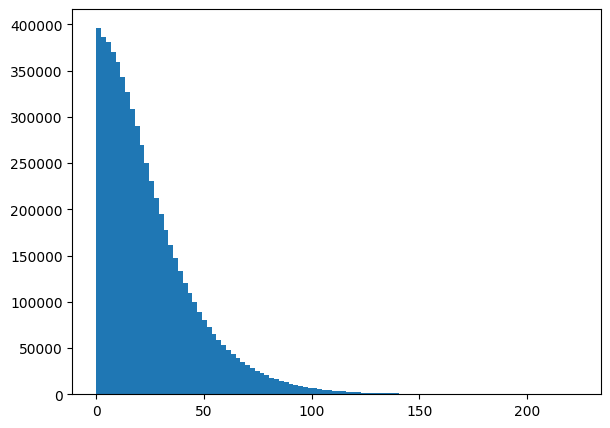

In [43]:
# Plot distribution of errors in cover and secret images.
pixel_histogram(diff_S1, diff_S2, diff_S3, diff_C)

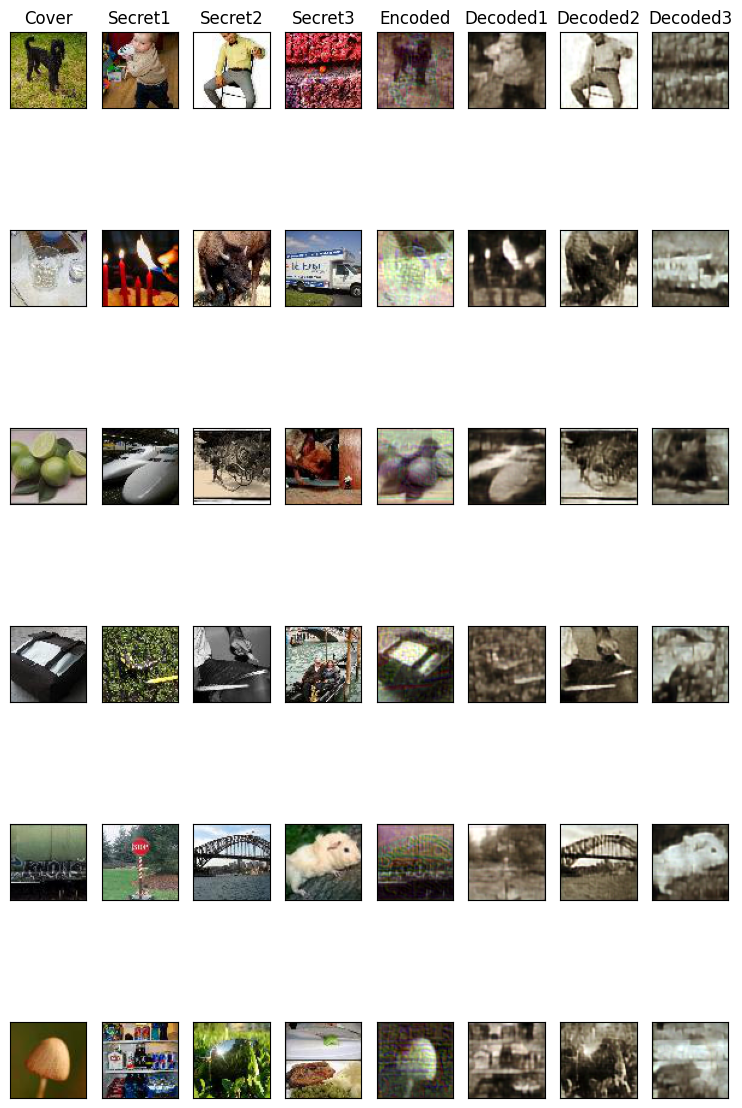

In [44]:
# Configs for results display

# Show images in gray scale
SHOW_GRAY = False
# Show difference bettwen predictions and ground truth.
SHOW_DIFF = True

# Diff enhance magnitude
ENHANCE = 1

# Number of secret and cover pairs to show.
n = 6

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def show_image(img, n_rows, n_col, idx, gray=False, first_row=False, title=None):
    ax = plt.subplot(n_rows, n_col, idx)
    if gray:
        plt.imshow(rgb2gray(img), cmap = plt.get_cmap('gray'))
    else:
        plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if first_row:
        plt.title(title)

plt.figure(figsize=(14, 15))
rand_indx = [random.randint(0, 500) for x in range(n)]
# for i, idx in enumerate(range(0, n)):
for i, idx in enumerate(rand_indx):
    n_col = 12 if SHOW_DIFF else 8
    
    show_image(input_C[idx], n, n_col, i * n_col + 1, gray=SHOW_GRAY, first_row=i==0, title='Cover')

    show_image(input_S1[idx], n, n_col, i * n_col + 2, gray=SHOW_GRAY, first_row=i==0, title='Secret1')

    show_image(input_S2[idx], n, n_col, i * n_col + 3, gray=SHOW_GRAY, first_row=i==0, title='Secret2')

    show_image(input_S3[idx], n, n_col, i * n_col + 4, gray=SHOW_GRAY, first_row=i==0, title='Secret3')
    
    show_image(decoded_C[idx], n, n_col, i * n_col + 5, gray=SHOW_GRAY, first_row=i==0, title='Encoded')
    
    show_image(decoded_S1[idx], n, n_col, i * n_col + 6, gray=SHOW_GRAY, first_row=i==0, title='Decoded1')

    show_image(decoded_S2[idx], n, n_col, i * n_col + 7, gray=SHOW_GRAY, first_row=i==0, title='Decoded2')

    show_image(decoded_S3[idx], n, n_col, i * n_col + 8, gray=SHOW_GRAY, first_row=i==0, title='Decoded3')

    
    # if SHOW_DIFF:
    #     show_image(np.multiply(diff_C[idx], ENHANCE), n, n_col, i * n_col + 9, gray=SHOW_GRAY, first_row=i==0, title='Diff Cover')
        
    #     show_image(np.multiply(diff_S1[idx], ENHANCE), n, n_col, i * n_col + 10, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret1')

    #     show_image(np.multiply(diff_S2[idx], ENHANCE), n, n_col, i * n_col + 11, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret2')

    #     show_image(np.multiply(diff_S3[idx], ENHANCE), n, n_col, i * n_col + 12, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret3')

plt.show()